In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from pylab import xticks

In [2]:
btc = pd.read_csv('Bitcoin_Historical_Data.csv')

%matplotlib inline
btc.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [3]:
# First explore the data, clean the data, set data types, visualize distributions
    # YoY returns, MoM returns
    
# IDEAS TO EXPLORE

# I would assume that volatility declines as the market matures, and so std for price changes decreases by year.
# A historical study of daily returns (fx,are mondays more bearish than wednesdays?)
        # idea being that people are in worse moods on mondays...less likely to buy?
        # are certain times of year more bullish or bearish than others?
    

# explore volatility distributions
# hypothesis is that the market is normally boring, 
   # and that a majority of the price appreciation happens in a small period of time
    

# A study of what time intra day frames make for the best long entries during an uptrend?
    # this dataset won't allow this but worth saving the idea for other exploration
# Testing the phrase ‘never short a dull market’
# Volatility Relationships over time?

In [4]:
#looking at data types and null counts
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3783 non-null   object
 1   Price     3783 non-null   object
 2   Open      3783 non-null   object
 3   High      3783 non-null   object
 4   Low       3783 non-null   object
 5   Vol.      3783 non-null   object
 6   Change %  3783 non-null   object
dtypes: object(7)
memory usage: 207.0+ KB


In [5]:
btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-11-24,"19,030.40","18,394.60","19,416.60","18,074.80",179.85K,3.54%
1,2020-11-23,"18,379.60","18,428.10","18,756.80","18,016.00",127.35K,-0.18%
2,2020-11-22,"18,412.90","18,689.30","18,751.50","17,644.60",121.76K,-1.47%
3,2020-11-21,"18,687.20","18,673.80","18,966.00","18,397.50",108.91K,0.06%
4,2020-11-20,"18,675.20","17,805.50","18,811.00","17,758.40",134.42K,4.90%


In [6]:
btc.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3783,3783,3783,3783,3783,3783,3783
unique,3783,2832,2826,2820,2826,3377,1400
top,2019-10-01,0.1,0.1,0.1,0.1,-,0.00%
freq,1,100,100,97,101,6,426


*Knew the method above wouldn't return useful info because the datatypes were all objects while my columns are definitely numeric + one datetime

*Want to change the name of Vol. Column to Volume, Change % to DoD Change

*Also need to change datatypes to numeric values, date to datetime

In [7]:
btc = btc.rename(columns={'Vol.': 'Volume', 'Change %': 'DoD_Change'})

In [8]:
#btc['Price'] = btc.Price.astype(float) threw an error, even though there are no null values in the 

#Price/Open/High/Low Columns.  Using a lambda func to strip the comma out, should then work


In [9]:
btc['Price'].apply(type).value_counts()

<class 'str'>    3783
Name: Price, dtype: int64

In [10]:
# the commas in the price columns were preventing me from being able to convert the data type from object to float.
# removing commas below and converting dtype

btc['Price'] = btc['Price'].apply(lambda x: x.replace(',', '')).astype('float')
btc['Open'] = btc['Open'].apply(lambda x: x.replace(',', '')).astype('float')
btc['High'] = btc['High'].apply(lambda x: x.replace(',', '')).astype('float')
btc['Low'] = btc['Low'].apply(lambda x: x.replace(',', '')).astype('float')


In [11]:
#btc['Volume'] = btc['Volume'].apply(lambda x: x.replace('K', '').replace('M', '').replace('-', ''))
#i was running into some errors with this one so decided to coerce to numeric
    #and see how many rows actually had data validation issues.  turns out there's only 6 null values that show up
#but then i realized that just dropping the K and M did not make sense, 
    #i actually need that info to appropriately convert the string value to an accurate number.  
    #no idea if volume is *1000 or *1000000
    #seeing that i'm not too interested in studying volume at this time, going to just leave this column and come back to it
    
#btc['Volume'] = pd.to_numeric(btc['Volume'], errors='coerce')   

In [12]:
btc['Date'] = pd.to_datetime(btc['Date'])

In [13]:
#converting DoD change to numeric value
btc['DoD_Change'] = btc['DoD_Change'].apply(lambda x: x.replace('%', '')).astype('float')
btc['DoD_Change'] = btc['DoD_Change'].div(100)

In [14]:
btc.head()

,Date,Price,Open,High,Low,Volume,DoD_Change
0,2020-11-24,19030.4,18394.6,19416.6,18074.8,179.85K,0.0354
1,2020-11-23,18379.6,18428.1,18756.8,18016.0,127.35K,-0.0018
2,2020-11-22,18412.9,18689.3,18751.5,17644.6,121.76K,-0.0147
3,2020-11-21,18687.2,18673.8,18966.0,18397.5,108.91K,0.0006
4,2020-11-20,18675.2,17805.5,18811.0,17758.4,134.42K,0.0490


In [15]:
btc.info()
#looks good, probably don't need to impute values in any rows, will do some quick explorations and visualizations to
#makes sure it's all good to work with.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3783 non-null   datetime64[ns]
 1   Price       3783 non-null   float64       
 2   Open        3783 non-null   float64       
 3   High        3783 non-null   float64       
 4   Low         3783 non-null   float64       
 5   Volume      3783 non-null   object        
 6   DoD_Change  3783 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 207.0+ KB


Thinking about it: should esnure that the DoD_Change values provided are actually accurate and replace them with a calculated value.  The price column is the closing value for the day, so (close - open)/open should give us the percent change for the day.  Also would be helpful to add a column with Z Scores to put into perspective a given day's percent change.


In [16]:
btc['DoD_Change'] = (btc['Price']-btc['Open'])/btc['Open']
btc.head()

,Date,Price,Open,High,Low,Volume,DoD_Change
0,2020-11-24,19030.4,18394.6,19416.6,18074.8,179.85K,0.034564
1,2020-11-23,18379.6,18428.1,18756.8,18016.0,127.35K,-0.002632
2,2020-11-22,18412.9,18689.3,18751.5,17644.6,121.76K,-0.014789
3,2020-11-21,18687.2,18673.8,18966.0,18397.5,108.91K,0.000718
4,2020-11-20,18675.2,17805.5,18811.0,17758.4,134.42K,0.048844


In [17]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3783 non-null   datetime64[ns]
 1   Price       3783 non-null   float64       
 2   Open        3783 non-null   float64       
 3   High        3783 non-null   float64       
 4   Low         3783 non-null   float64       
 5   Volume      3783 non-null   object        
 6   DoD_Change  3783 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 207.0+ KB


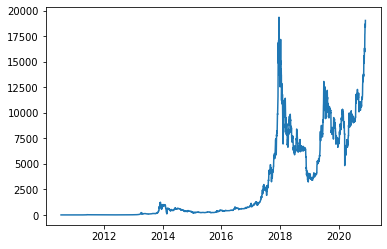

In [18]:
plt.plot(btc['Date'], btc['Price'])

The above chart looks like the btc price chart, so I feel pretty good about the accuracy of our data.  

Also, given the order of maginitude of price increase since 2010, perhaps a log visual of the price chart might be interesting to look at.

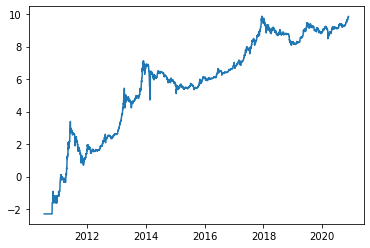

In [19]:
plt.plot(btc['Date'], np.log(btc['Price']))

(array([2498.,  173.,  162.,  309.,  312.,  214.,   50.,   31.,   21.,
          13.]),
 array([1.000000e-01, 1.934640e+03, 3.869180e+03, 5.803720e+03,
        7.738260e+03, 9.672800e+03, 1.160734e+04, 1.354188e+04,
        1.547642e+04, 1.741096e+04, 1.934550e+04]),
 <a list of 10 Patch objects>)

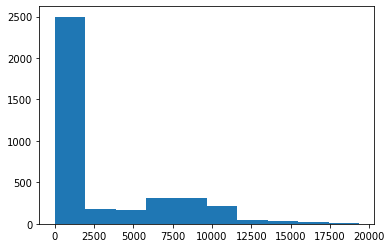

In [20]:
plt.hist(btc['Price'])

I realize plotting a histogram of price isn't conventional, but I do think it's interesting to get a visual for how much time (in terms of days) BTC has spent in each bin.

In [121]:
btc.DoD_Change.describe()

count    3616.000000
mean        0.005256
std         0.081337
min        -0.572084
25%        -0.012711
50%         0.000306
75%         0.019977
max         3.367452
Name: DoD_Change, dtype: float64

Imagine if your stock of choice returned .5% on average everyday (...btc has been the trade of the century!)

(array([0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 9.000e+00, 3.000e+00,
        8.000e+00, 5.000e+00, 2.300e+01, 4.700e+01, 1.460e+02, 4.410e+02,
        2.188e+03, 6.160e+02, 1.410e+02, 7.500e+01, 3.200e+01, 7.000e+00,
        9.000e+00, 5.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        9.000e+00]),
 array([-0.5 , -0.46, -0.42, -0.38, -0.34, -0.3 , -0.26, -0.22, -0.18,
        -0.14, -0.1 , -0.06, -0.02,  0.02,  0.06,  0.1 ,  0.14,  0.18,
         0.22,  0.26,  0.3 ,  0.34,  0.38,  0.42,  0.46,  0.5 ]),
 <a list of 25 Patch objects>)

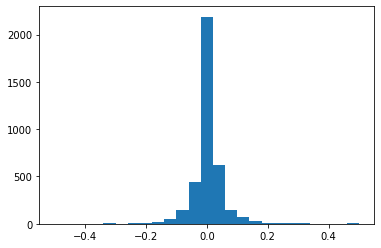

In [22]:
plt.hist(btc['DoD_Change'], range=[-.5,.5], bins = 25)

A comment before we continue:  for financial markets, volatility is defined as the dispersion of returns in daily closing price from one day to the next (thus, in visual form, the histogram above).  In order to explore volatilty, we'll be going in depth on DoD_Change column, and look at how measure of variance change across different slices of time (by weekday, by month, by year).  

Lastly, looking at the DoD change for the whole dataset, a roughly normal distro with positive skew makes sense, given that the asset has appreicated as much as it has in 10 years, but is otherwise fairly balanced across the mean.

In [23]:
#going to look over volatilty on a year by year basis, first want to add a few more columns to my dataframe
btc['Year'] = pd.DatetimeIndex(btc['Date']).year

In [24]:
btc['Month'] = pd.DatetimeIndex(btc['Date']).month

In [25]:
btc['Day'] = pd.DatetimeIndex(btc['Date']).day

In [26]:
btc['Weekday'] = pd.DatetimeIndex(btc['Date']).dayofweek
# monday = 0 and sunday = 7

In [27]:
btc.head()

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday
0,2020-11-24,19030.4,18394.6,19416.6,18074.8,179.85K,0.034564,2020,11,24,1
1,2020-11-23,18379.6,18428.1,18756.8,18016.0,127.35K,-0.002632,2020,11,23,0
2,2020-11-22,18412.9,18689.3,18751.5,17644.6,121.76K,-0.014789,2020,11,22,6
3,2020-11-21,18687.2,18673.8,18966.0,18397.5,108.91K,0.000718,2020,11,21,5
4,2020-11-20,18675.2,17805.5,18811.0,17758.4,134.42K,0.048844,2020,11,20,4


In [28]:
annual_vol = btc.groupby('Year')['DoD_Change'].std()
print(annual_vol)

Year
2010         NaN
2011    0.099272
2012    0.041751
2013    0.075243
2014    0.197856
2015    0.037437
2016    0.025616
2017    0.049666
2018    0.042794
2019    0.036106
2020    0.039345
Name: DoD_Change, dtype: float64


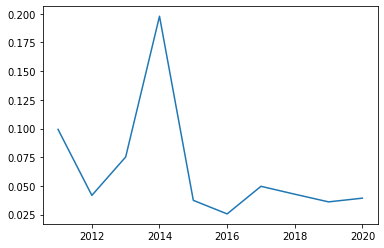

In [29]:
plt.plot(annual_vol)
plt.show()

In [32]:
yearunique = btc.Year.unique()
print(yearunique.dtype)
print(yearunique)

int64
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]


In [33]:
#making a dataframe for each year

btcyear = {elem : pd.DataFrame() for elem in yearunique}
for key in btcyear.keys():
    btcyear[key] = btc[:][btc.Year == key]


In [34]:
#checking that it worked
btcyear[2015].tail()


,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday
2150,2015-01-05,274.8,264.7,278.3,262.9,54.99K,0.038156,2015,1,5,0
2151,2015-01-04,264.7,287.1,289.9,255.9,88.77K,-0.078022,2015,1,4,6
2152,2015-01-03,287.1,315.2,315.8,284.9,47.37K,-0.089150,2015,1,3,5
2153,2015-01-02,315.2,314.9,316.4,313.1,14.73K,0.000953,2015,1,2,4
2154,2015-01-01,314.9,318.2,321.4,313.5,12.82K,-0.010371,2015,1,1,3


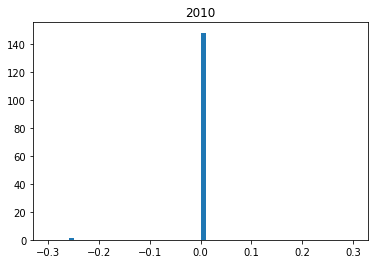

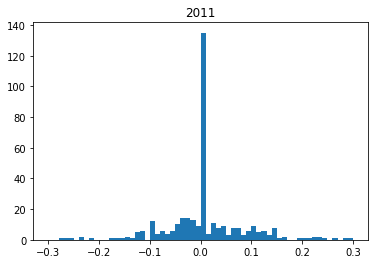

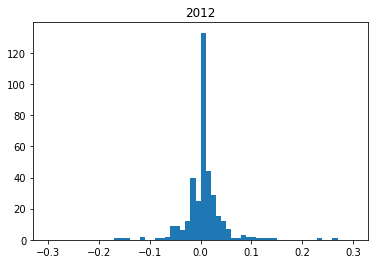

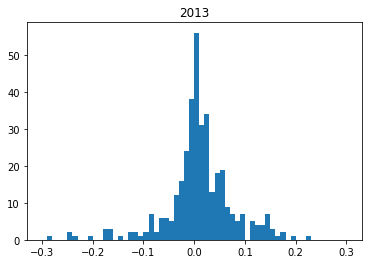

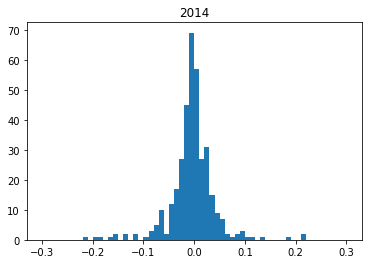

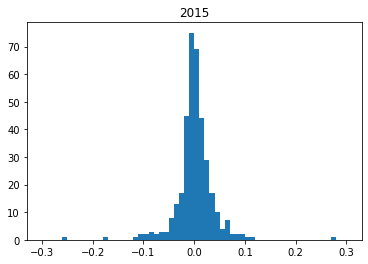

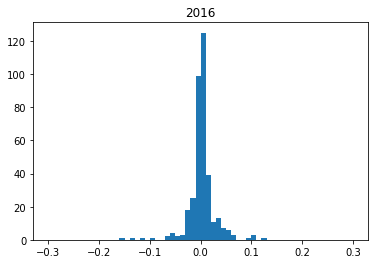

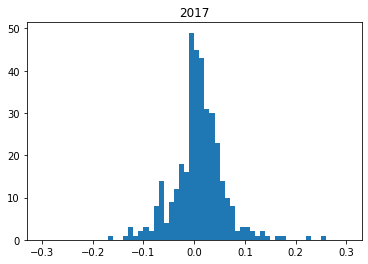

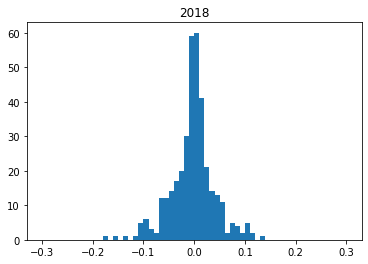

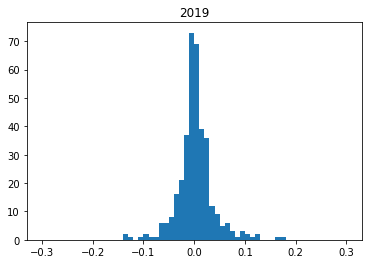

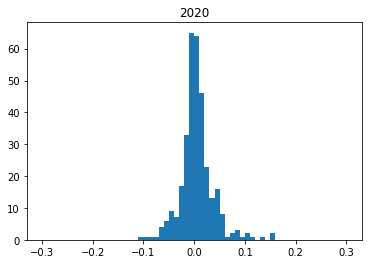

In [35]:
#now let's look at volatilty distributions on a year by year basis


for i in range(2010,2020+1):
    plt.figure()
    plt.hist(btcyear[i]['DoD_Change'], range=[-.3,.3], bins = 60)
    plt.title(i)

First off, the distribution for 2010 is uniform with all data points showing 0% DoD change.  I'll need to go look at that data and see if I should disregard that year's data from remaining calculations & explorations.  The rest appear to be normally distributed, with positive or negative skews according to how price performed that year.

More broadly, it does appear that volatilty has gone down overtime, as evidenced by the volatilty line graph of 'annual vol', and as well as by eyeballing the histograms outputed for each year.  However, I'm aware that is a pretty general conclusion to arrive at.  I'm only looking at 10 years worth of data as sliced per year; zooming into a monthly view on the time series should give a more sensible visualization about volatility's behavior over time. It's worth noting that while the first half of the data (say 2014 and earlier) has a higher stdev value for DoD Change, there also seems to be more significantly more days in that date range with 0% DoD change.  Perhaps it's a small chunk of days from those years disproportionately causing a higher measure of volatilty for that year.

Other takeaways from inspecting the histograms is that the years that were mega bullish like 2013 and 2017 are strongly skewed positive, while years that were mega bearish like 2014 and 2018 are strongly skewed negative, as they all coveivably should be.  Lastly, need to go through and look at the data for 2011 and 2012, similar to 2010 there's many more 0.0% days represented on the histogram.


Let's also look at price charts by year before proceeding

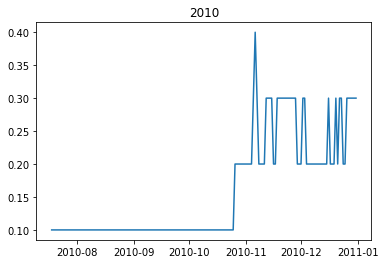

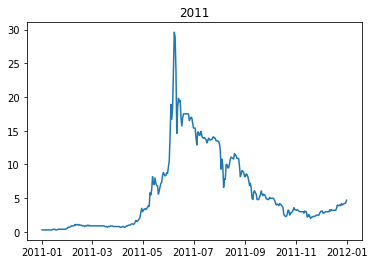

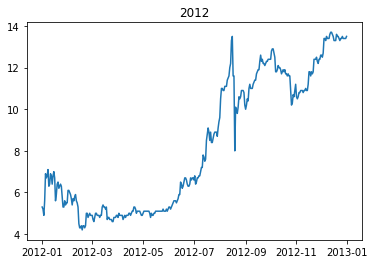

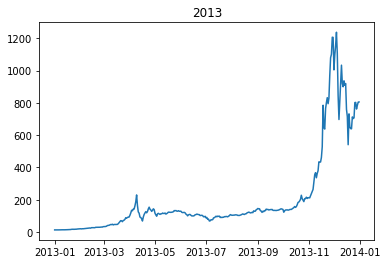

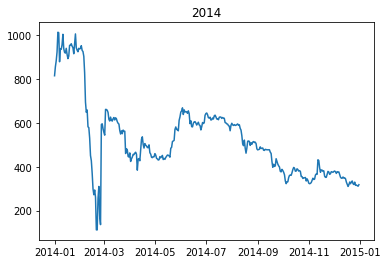

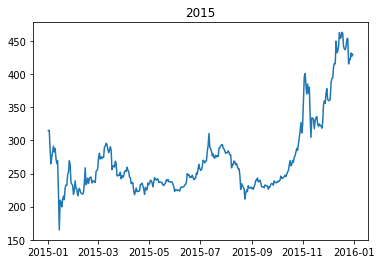

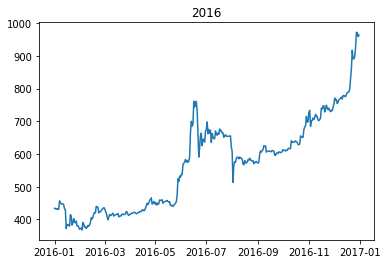

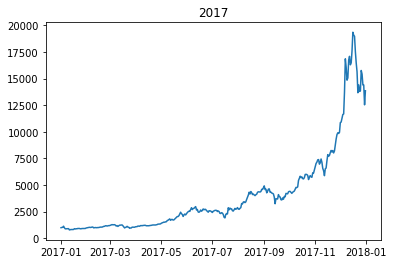

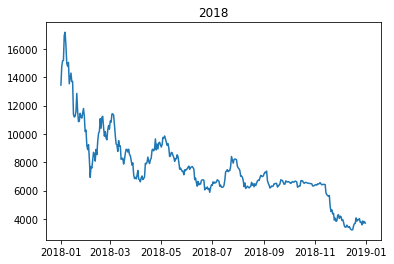

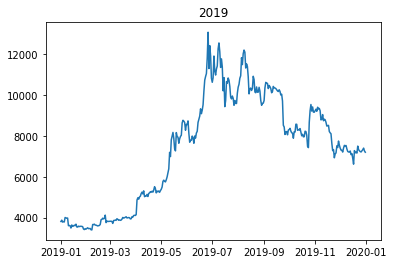

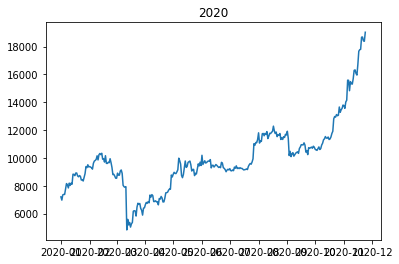

In [36]:
for i in range(2010,2020+1):
    plt.figure()
    plt.plot(btcyear[i]['Date'], btcyear[i]['Price'])
    plt.title(i)

In [37]:
pd.options.display.max_rows = 360

In [38]:
btcyear[2010].iloc[120:]

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday
3736,2010-09-02,0.1,0.1,0.1,0.1,8.15K,0.0,2010,9,2,3
3737,2010-09-01,0.1,0.1,0.1,0.1,7.17K,0.0,2010,9,1,2
3738,2010-08-31,0.1,0.1,0.1,0.1,14.89K,0.0,2010,8,31,1
3739,2010-08-30,0.1,0.1,0.1,0.0,34.19K,0.0,2010,8,30,0
3740,2010-08-29,0.1,0.1,0.1,0.1,3.17K,0.0,2010,8,29,6
3741,2010-08-28,0.1,0.1,0.1,0.1,6.17K,0.0,2010,8,28,5
3742,2010-08-27,0.1,0.1,0.1,0.1,9.01K,0.0,2010,8,27,4
3743,2010-08-26,0.1,0.1,0.1,0.1,3.87K,0.0,2010,8,26,3
3744,2010-08-25,0.1,0.1,0.1,0.1,4.23K,0.0,2010,8,25,2
3745,2010-08-24,0.1,0.1,0.1,0.1,6.71K,0.0,2010,8,24,1


looking at the data for 2010, it's clear that we just don't have enough precision to get an accurate figure for DoD_Change and it is worth dropping this years data from any analysis.  Even the days when the price changes from .2 to .3, the DoD Change column is 0.0000.  

Looks like beginning of Q2_2011 when this pattern finally changes into something interesting.

In [39]:
btcyear[2011].iloc[-180:]

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday
3436,2011-06-29,16.9,17.0,17.2,16.7,21.04K,-0.005882,2011,6,29,2
3437,2011-06-28,17.0,16.8,17.5,16.5,24.40K,0.011905,2011,6,28,1
3438,2011-06-27,16.8,16.5,18.0,15.0,31.45K,0.018182,2011,6,27,0
3439,2011-06-26,16.5,17.5,17.5,14.0,15.05K,-0.057143,2011,6,26,6
3440,2011-06-25,17.5,17.5,17.5,17.5,-,0.000000,2011,6,25,5
3441,2011-06-24,17.5,17.5,17.5,17.5,-,0.000000,2011,6,24,4
3442,2011-06-23,17.5,17.5,17.5,17.5,-,0.000000,2011,6,23,3
3443,2011-06-22,17.5,17.5,17.5,17.5,-,0.000000,2011,6,22,2
3444,2011-06-21,17.5,17.5,17.5,17.5,-,0.000000,2011,6,21,1
3445,2011-06-20,17.5,17.5,17.5,17.5,-,0.000000,2011,6,20,0


In [40]:
#dropping 2010 data
btc = btc.drop(btc[btc['Year'] == 2010].index)
btc.DoD_Change.describe()

count    3616.000000
mean        0.005256
std         0.081337
min        -0.572084
25%        -0.012711
50%         0.000306
75%         0.019977
max         3.367452
Name: DoD_Change, dtype: float64

dropping 2010 from the dataset gives us proper values for the DoD_Change column now

In [41]:
#quick examination of annual returns for bitcoin

btcannual = btc.loc[(btc.Day == 31) & (btc.Month == 12)].copy()
btcannual

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday
329,2019-12-31,7196.4,7261.5,7331.0,7167.4,586.60K,-0.008965,2019,12,31,1
694,2018-12-31,3709.4,3815.1,3819.6,3658.8,545.83K,-0.027706,2018,12,31,0
1059,2017-12-31,13850.4,12532.4,14241.8,12359.4,111.27K,0.105167,2017,12,31,6
1424,2016-12-31,963.4,959.0,965.5,942.4,27.56K,0.004588,2016,12,31,5
1790,2015-12-31,430.0,427.1,433.1,417.1,65.21K,0.006790,2015,12,31,3
2155,2014-12-31,318.2,311.3,319.1,308.9,20.50K,0.022165,2014,12,31,2
2520,2013-12-31,805.9,804.8,813.9,777.0,9.17K,0.001367,2013,12,31,1
2885,2012-12-31,13.5,13.4,13.6,13.4,15.05K,0.007463,2012,12,31,0
3251,2011-12-31,4.7,4.3,5.0,4.2,129.73K,0.093023,2011,12,31,5


In [42]:
btcannual['YoY_Mag_Change'] = btcannual.Price.diff(periods=-1)
btcannual['YoY_Pct_Change'] = btcannual.Price.pct_change(periods=-1)
btcannual

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,YoY_Mag_Change,YoY_Pct_Change
329,2019-12-31,7196.4,7261.5,7331.0,7167.4,586.60K,-0.008965,2019,12,31,1,3487.0,0.940044
694,2018-12-31,3709.4,3815.1,3819.6,3658.8,545.83K,-0.027706,2018,12,31,0,-10141.0,-0.732181
1059,2017-12-31,13850.4,12532.4,14241.8,12359.4,111.27K,0.105167,2017,12,31,6,12887.0,13.376583
1424,2016-12-31,963.4,959.0,965.5,942.4,27.56K,0.004588,2016,12,31,5,533.4,1.240465
1790,2015-12-31,430.0,427.1,433.1,417.1,65.21K,0.006790,2015,12,31,3,111.8,0.351351
2155,2014-12-31,318.2,311.3,319.1,308.9,20.50K,0.022165,2014,12,31,2,-487.7,-0.605162
2520,2013-12-31,805.9,804.8,813.9,777.0,9.17K,0.001367,2013,12,31,1,792.4,58.696296
2885,2012-12-31,13.5,13.4,13.6,13.4,15.05K,0.007463,2012,12,31,0,8.8,1.872340
3251,2011-12-31,4.7,4.3,5.0,4.2,129.73K,0.093023,2011,12,31,5,NaN,NaN


Not going to plot YoY Percent Change as the graph would be absurd:  the price difference between Jan 31 2013 and the open on Jan 1 2013 is 5869% (ie 13.3 times 58.69x return that year).  It is worth noting there have been two years in bitcoins history where it posted a negative annual return:  2018 saw price close 73% lower than the open, 2014 closed 60% lower than the open.  Annualized study of btc isn't terribly interesting to me seeing that there's only 10 years to report on, I think monthly data will be more interesting to explore.

In [43]:
#going to calculate monthly returns.  filtering on Month_End = True and using the difference in closing prices to calculate returns
#the price the month opens with is the same price the prior month closes with, so this calculation should accurately show MoM retuns


btc['Month_End'] = btc['Date'].dt.is_month_end

In [44]:
btcmonth = btc.loc[btc['Month_End']==1].copy()

In [45]:
btcmonth.tail()

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End
3465,2011-05-31,8.7,8.8,9.5,8.1,45.79K,-0.011364,2011,5,31,1,True
3496,2011-04-30,3.5,2.9,4.2,2.8,65.43K,0.206897,2011,4,30,5,True
3526,2011-03-31,0.8,0.8,0.8,0.8,6.88K,0.000000,2011,3,31,3,True
3557,2011-02-28,0.9,0.9,0.9,0.8,4.65K,0.000000,2011,2,28,0,True
3585,2011-01-31,0.5,0.5,0.9,0.5,63.52K,0.000000,2011,1,31,0,True


In [46]:
btcmonth['MoM_Mag_Change'] = btcmonth.Price.diff(periods=-1)

In [47]:
btcmonth.head()

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,MoM_Mag_Change
24,2020-10-31,13797.3,13560.2,14065.4,13441.7,102.75K,0.017485,2020,10,31,5,True,3021.2
55,2020-09-30,10776.1,10843.4,10847.7,10667.6,55.55K,-0.006207,2020,9,30,2,True,-868.1
85,2020-08-31,11644.2,11701.1,11760.2,11563.8,496.14K,-0.004863,2020,8,31,0,True,310.8
116,2020-07-31,11333.4,11096.5,11434.8,10964.6,530.95K,0.021349,2020,7,31,4,True,2198.0
147,2020-06-30,9135.4,9186.0,9199.8,9075.3,381.73K,-0.005508,2020,6,30,1,True,-319.4


In [48]:
btcmonth['MoM_%_Change'] = btcmonth.Price.pct_change(periods=-1)

In [49]:
btcmonth.sort_values(['MoM_%_Change'], ascending=False)

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,MoM_Mag_Change,MoM_%_Change
2551,2013-11-30,1205.7,1206.9,1232.9,1150.2,15.10K,-0.000994,2013,11,30,5,True,994.5,4.708807
3496,2011-04-30,3.5,2.9,4.2,2.8,65.43K,0.206897,2011,4,30,5,True,2.7,3.375000
2795,2013-03-31,93.0,92.2,93.8,91.0,21.13K,0.008677,2013,3,31,6,True,59.6,1.784431
3465,2011-05-31,8.7,8.8,9.5,8.1,45.79K,-0.011364,2011,5,31,1,True,5.2,1.485714
3435,2011-06-30,16.1,16.9,17.0,15.7,34.96K,-0.047337,2011,6,30,3,True,7.4,0.850575
3557,2011-02-28,0.9,0.9,0.9,0.8,4.65K,0.000000,2011,2,28,0,True,0.4,0.800000
1273,2017-05-31,2303.3,2192.6,2330.6,2168.4,117.75K,0.050488,2017,5,31,2,True,951.4,0.703750
1181,2017-08-31,4735.1,4583.0,4765.1,4580.1,72.29K,0.033188,2017,8,31,3,True,1851.8,0.642250
2826,2013-02-28,33.4,30.9,34.5,30.9,126.52K,0.080906,2013,2,28,3,True,13.0,0.637255
543,2019-05-31,8558.3,8271.4,8578.8,8135.0,858.41K,0.034686,2019,5,31,4,True,3237.5,0.608461


Going to plot the monthly returns but set a y-max of 200% so that looking at the rest of the months is a bit more visually comparative and not catering to a couple outliers (ie don't want the scale adjustment for the two months of april 2011 and november 2013 to make it impossible to compare other months amongst each other).

A note on unites, the MoM % Change is in decimal units, as is DoD_Change.  ie 4.7 for MoM Change on Nov 2013 is 470%.

<BarContainer object of 118 artists>

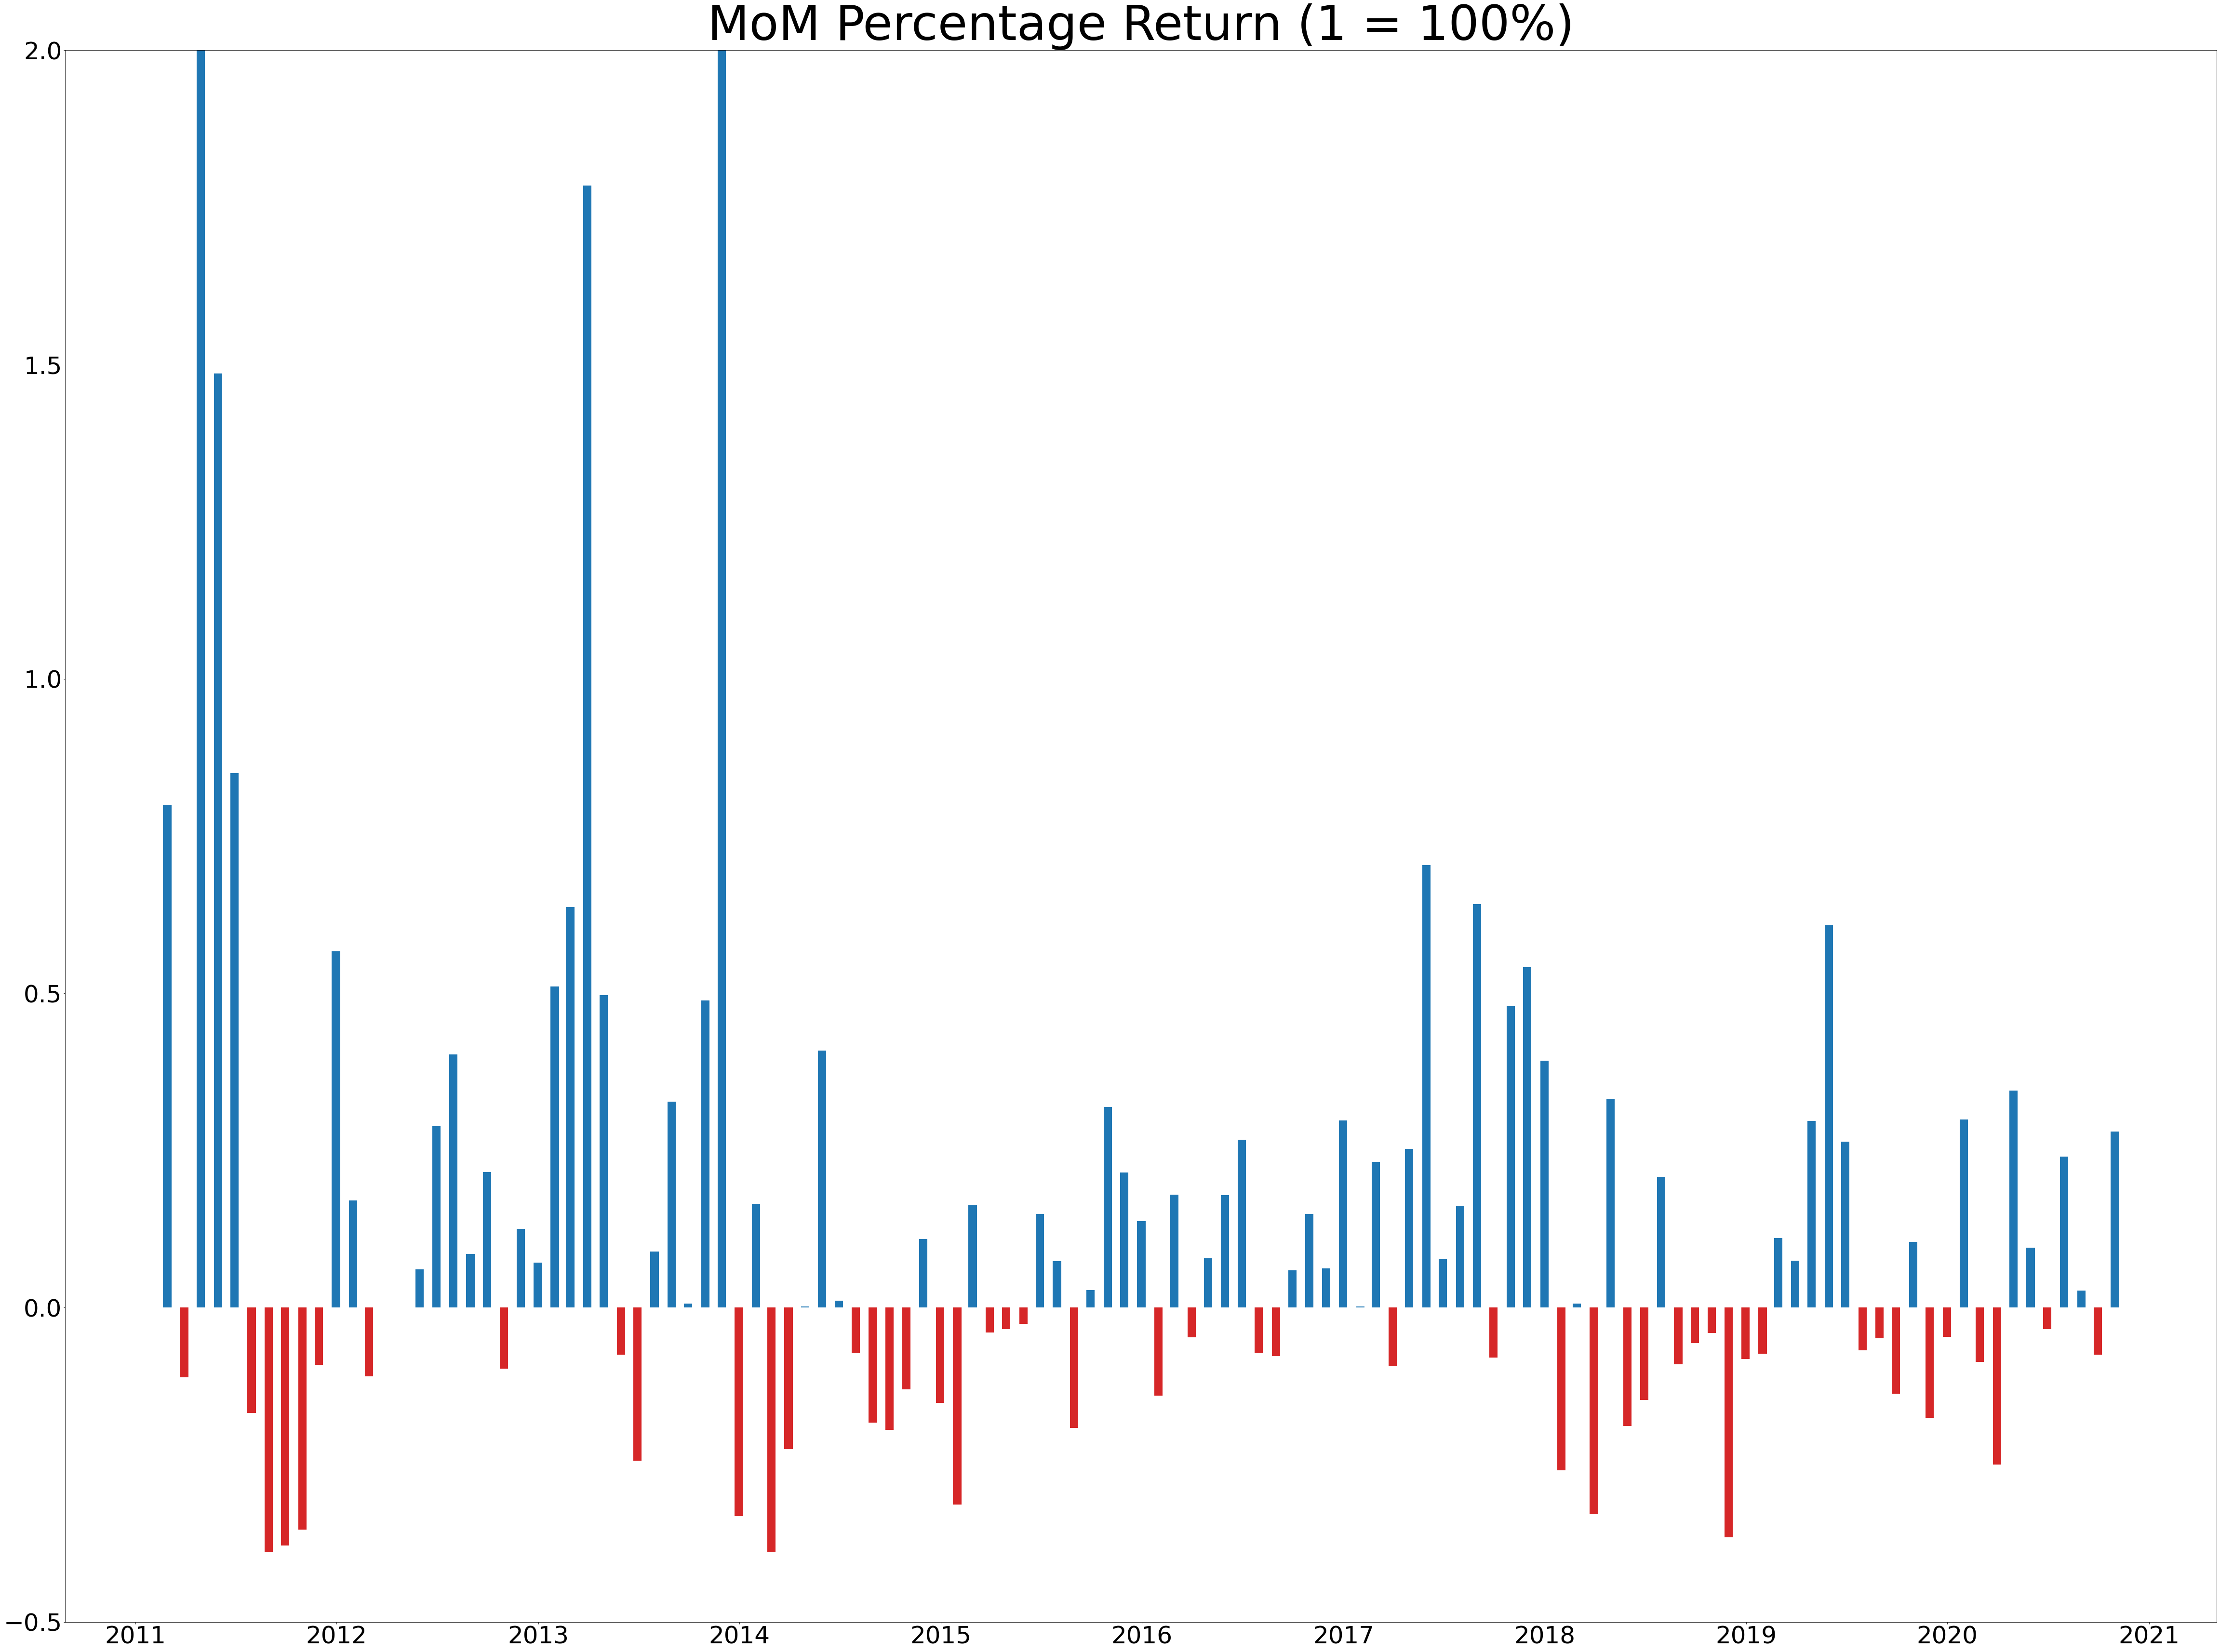

In [50]:
plt.figure(figsize=(80,60))
plt.title('MoM Percentage Return (1 = 100%)', size = 100)
plt.xticks(size =50)
plt.yticks(size = 50)
plt.ylim(-0.5,2)
plt.bar(btcmonth['Date'], btcmonth['MoM_%_Change'], width = 15, color=(btcmonth['MoM_%_Change']>0).map({True: 'tab:blue', False: 'tab:red'}))


Looking at the above chart, it makes a little more sense why the volatilty is higher for years 2014 and earlier.  Price tended to bubble and then crash.  The crashes are harder to see here, as you can't crash more than 100%, but you can certainly appreciate more than 100%, as the chart makes evident. Instead of breaking out the data by year and looking at monthly percent returns, I think it would be more interesting to look at magnitude of change Month over Month.  

Lastly, the 400%+ return in 2013 was the eye watering bubble where btc went from 100USD to over 1000USD in less than 60 days, one of it's best runs ever, followed by a crash and alsmost two years of negative to flat returns.  You can see from the chart the next bull ran began at the end of 2015 and going into 2016, and ending with the start of 2018, which posted more negative months than positive.

<ipython-input-51-de3ad8cdcd1e>:4: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  im = ax.imshow(btc_month_change, cmap= 'RdBu', norm=DivergingNorm(0), interpolation='none')


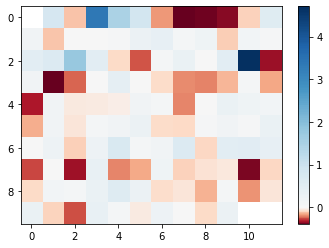

In [51]:
from matplotlib.colors import DivergingNorm
btc_month_change = pd.pivot_table(btcmonth, index=['Year'], columns=['Month'], values=['MoM_%_Change'])
fig, ax = plt.subplots()
im = ax.imshow(btc_month_change, cmap= 'RdBu', norm=DivergingNorm(0), interpolation='none')
fig.colorbar(im)
plt.show()

This heatmap is a little silly as the y-axis and x-axis aren't properly labeled (I kept getting errors trying to fix it, figured i'd come back to it later or just remove all together as I was spending entirely too much time trying to get it right...believe it has to do with my choice to use Axes Image to show different gradient).  Top of the Y axis is 2011 and bottom is 2020, left most of x axis is january and right most is december.  Wanted to visualize MoM returns using a two scaled color gradient.

In [52]:
#making a dataframe for each year so we can look at the returns a little more granularly

btcmonths = {elem : pd.DataFrame() for elem in yearunique}
for key in btcmonths.keys():
    btcmonths[key] = btcmonth[:][btcmonth.Year == key]

In [53]:
btcmonths[2014].tail(12)

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,MoM_Mag_Change,MoM_%_Change
2155,2014-12-31,318.2,311.3,319.1,308.9,20.50K,0.022165,2014,12,31,2,True,-56.7,-0.151240
2186,2014-11-30,374.9,376.3,381.1,372.6,11.29K,-0.003720,2014,11,30,6,True,37.0,0.109500
2216,2014-10-31,337.9,344.9,348.0,336.1,14.00K,-0.020296,2014,10,31,4,True,-50.3,-0.129572
2247,2014-09-30,388.2,376.8,395.2,374.7,16.92K,0.030255,2014,9,30,1,True,-93.6,-0.194271
2277,2014-08-31,481.8,506.0,508.3,478.3,6.10K,-0.047826,2014,8,31,6,True,-107.7,-0.182697
2308,2014-07-31,589.5,564.6,593.7,564.0,3.52K,0.044102,2014,7,31,3,True,-45.6,-0.071800
2339,2014-06-30,635.1,601.1,637.3,596.5,3.83K,0.056563,2014,6,30,0,True,7.2,0.011467
2369,2014-05-31,627.9,612.3,629.0,604.7,4.41K,0.025478,2014,5,31,5,True,182.3,0.409111
2400,2014-04-30,445.6,446.1,452.6,430.9,4.08K,-0.001121,2014,4,30,2,True,0.9,0.002024
2430,2014-03-31,444.7,446.9,473.4,422.5,4.15K,-0.004923,2014,3,31,0,True,-129.2,-0.225126


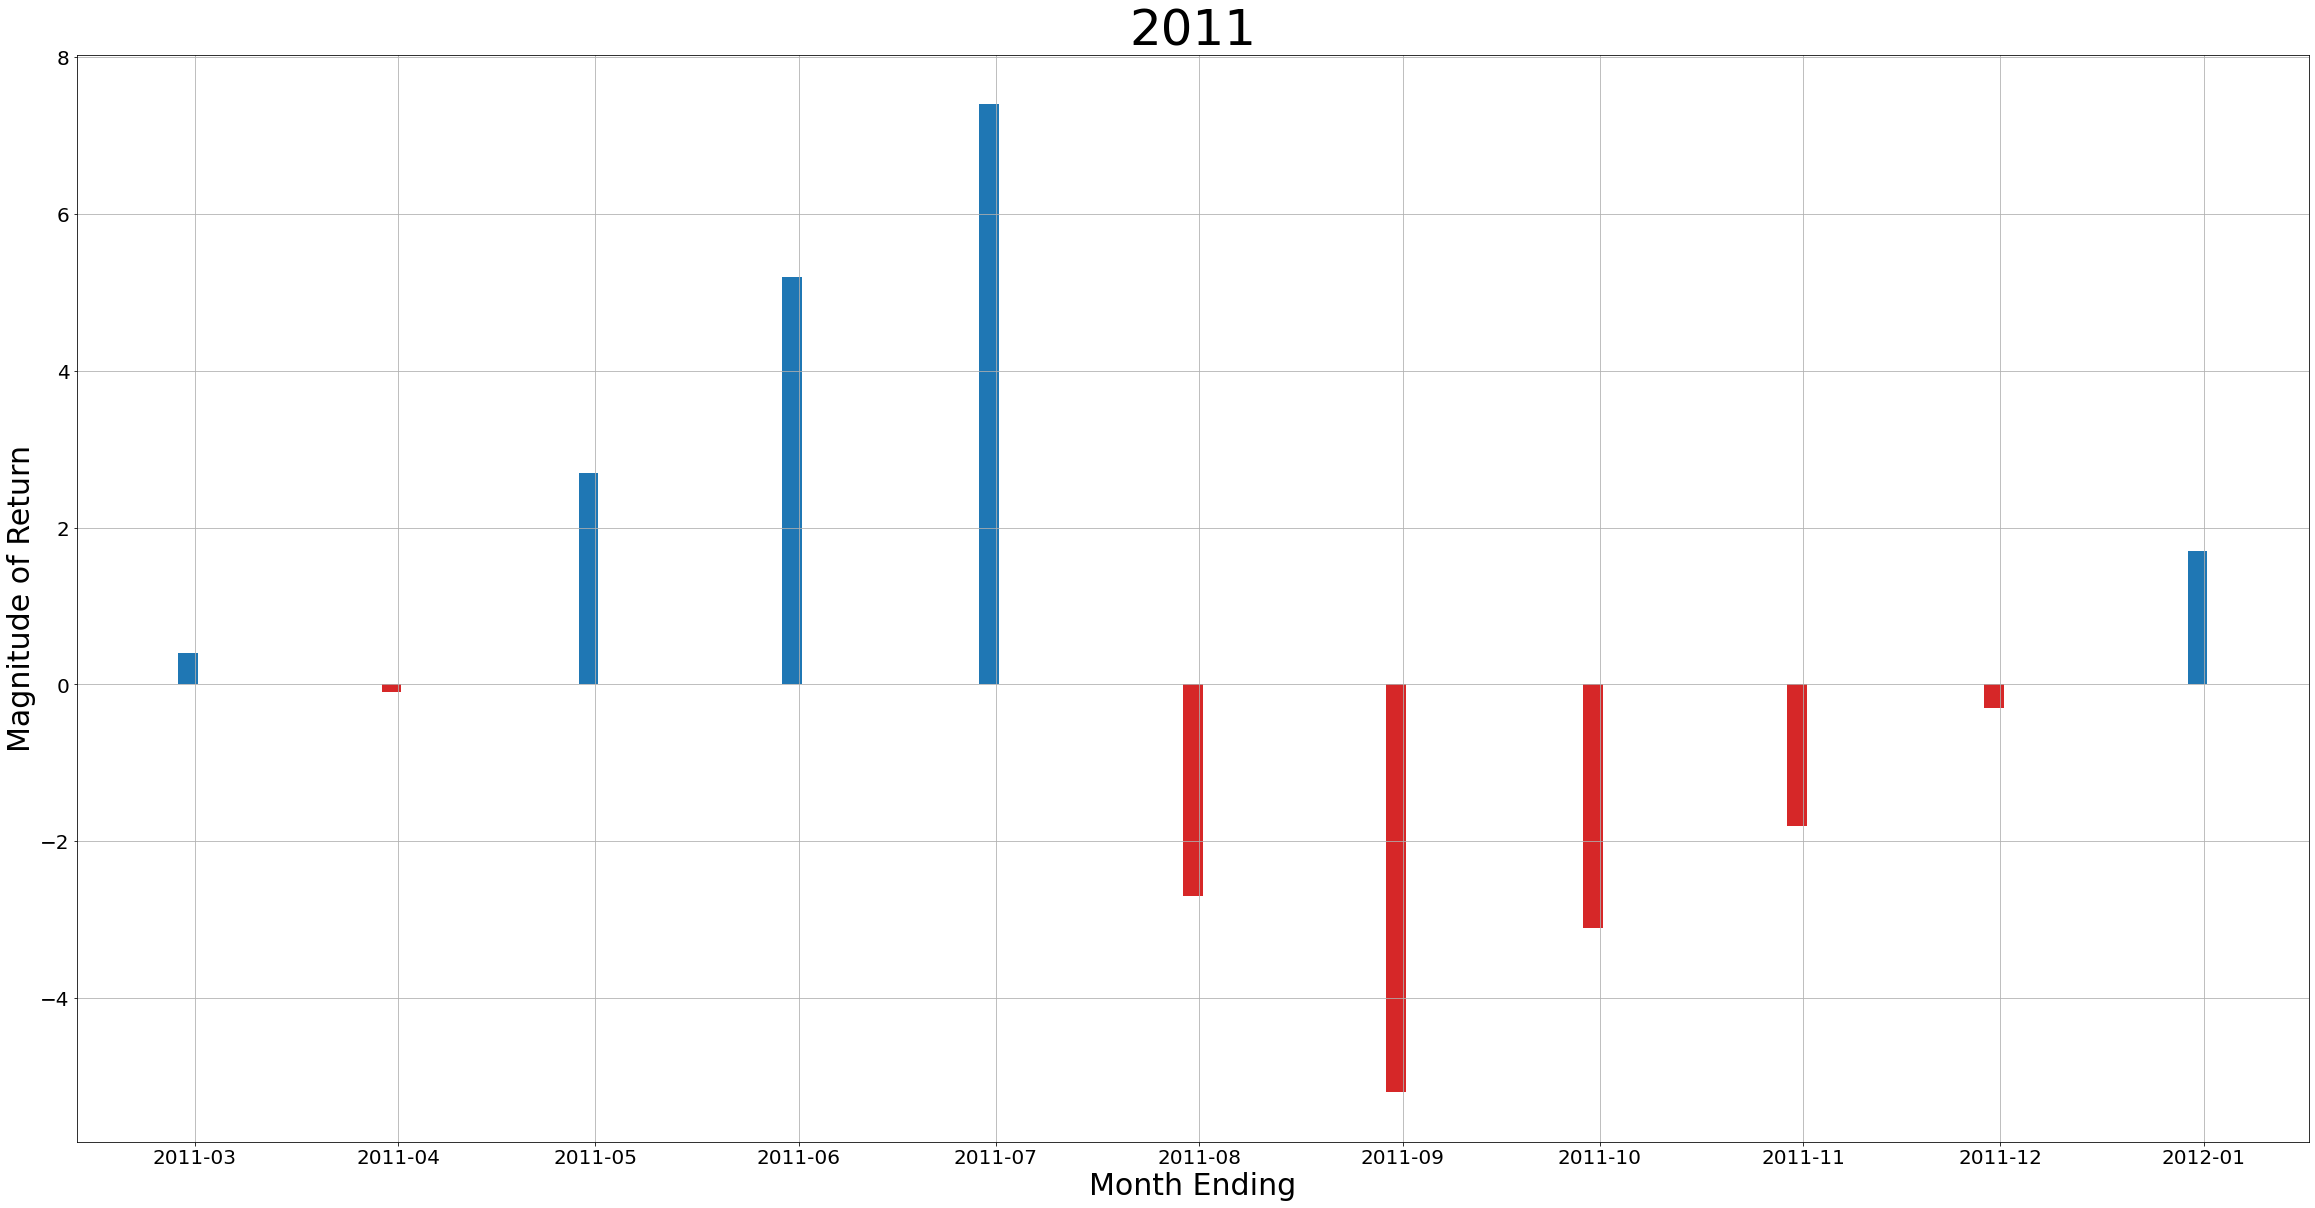

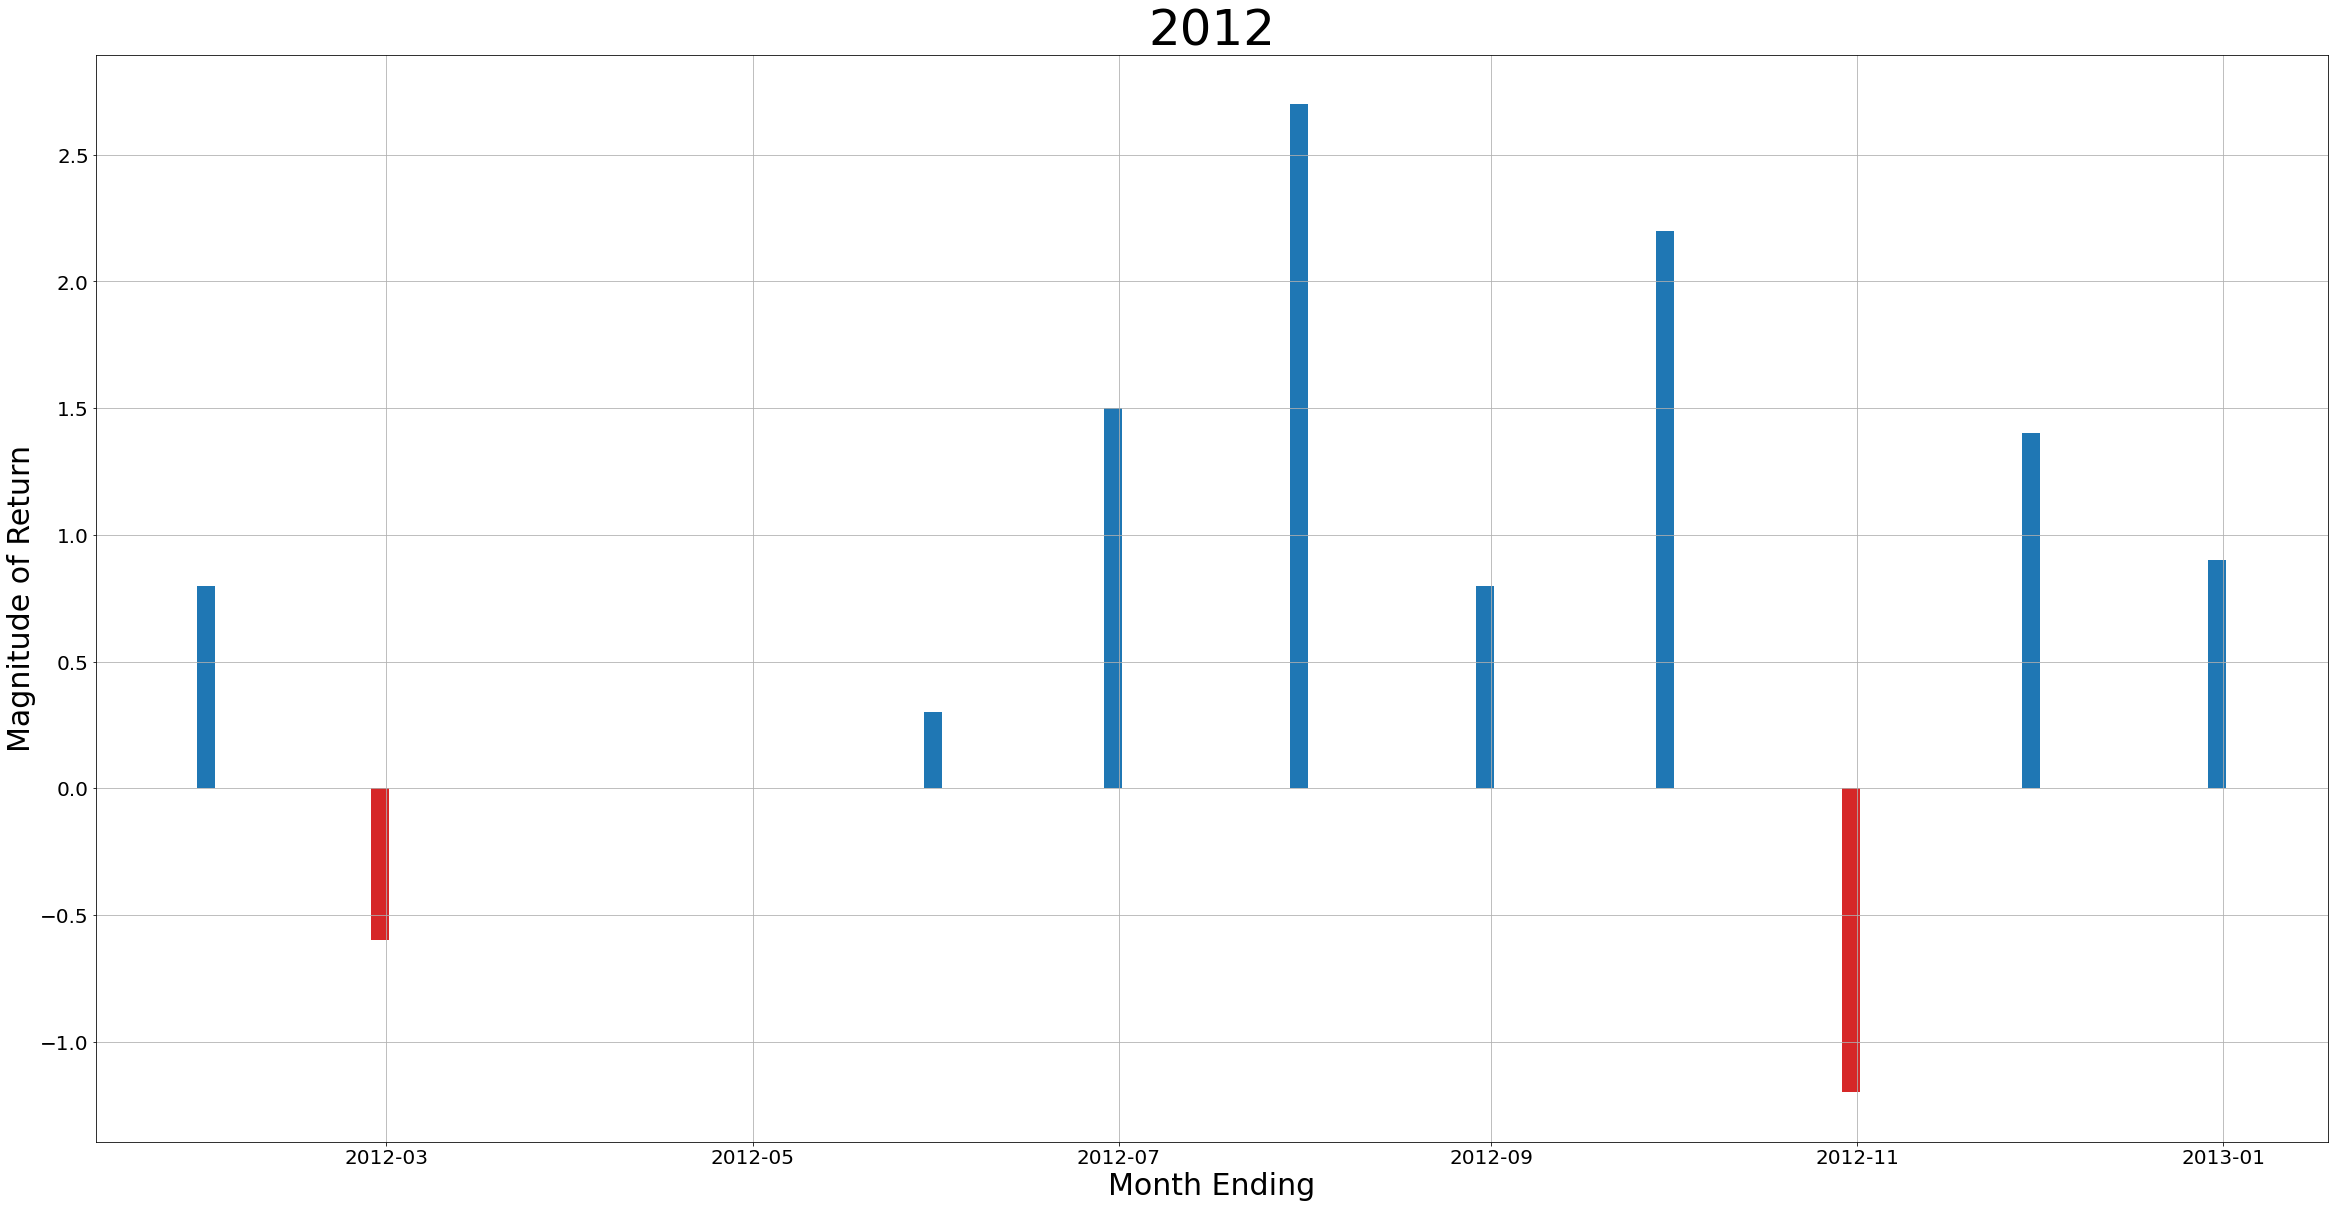

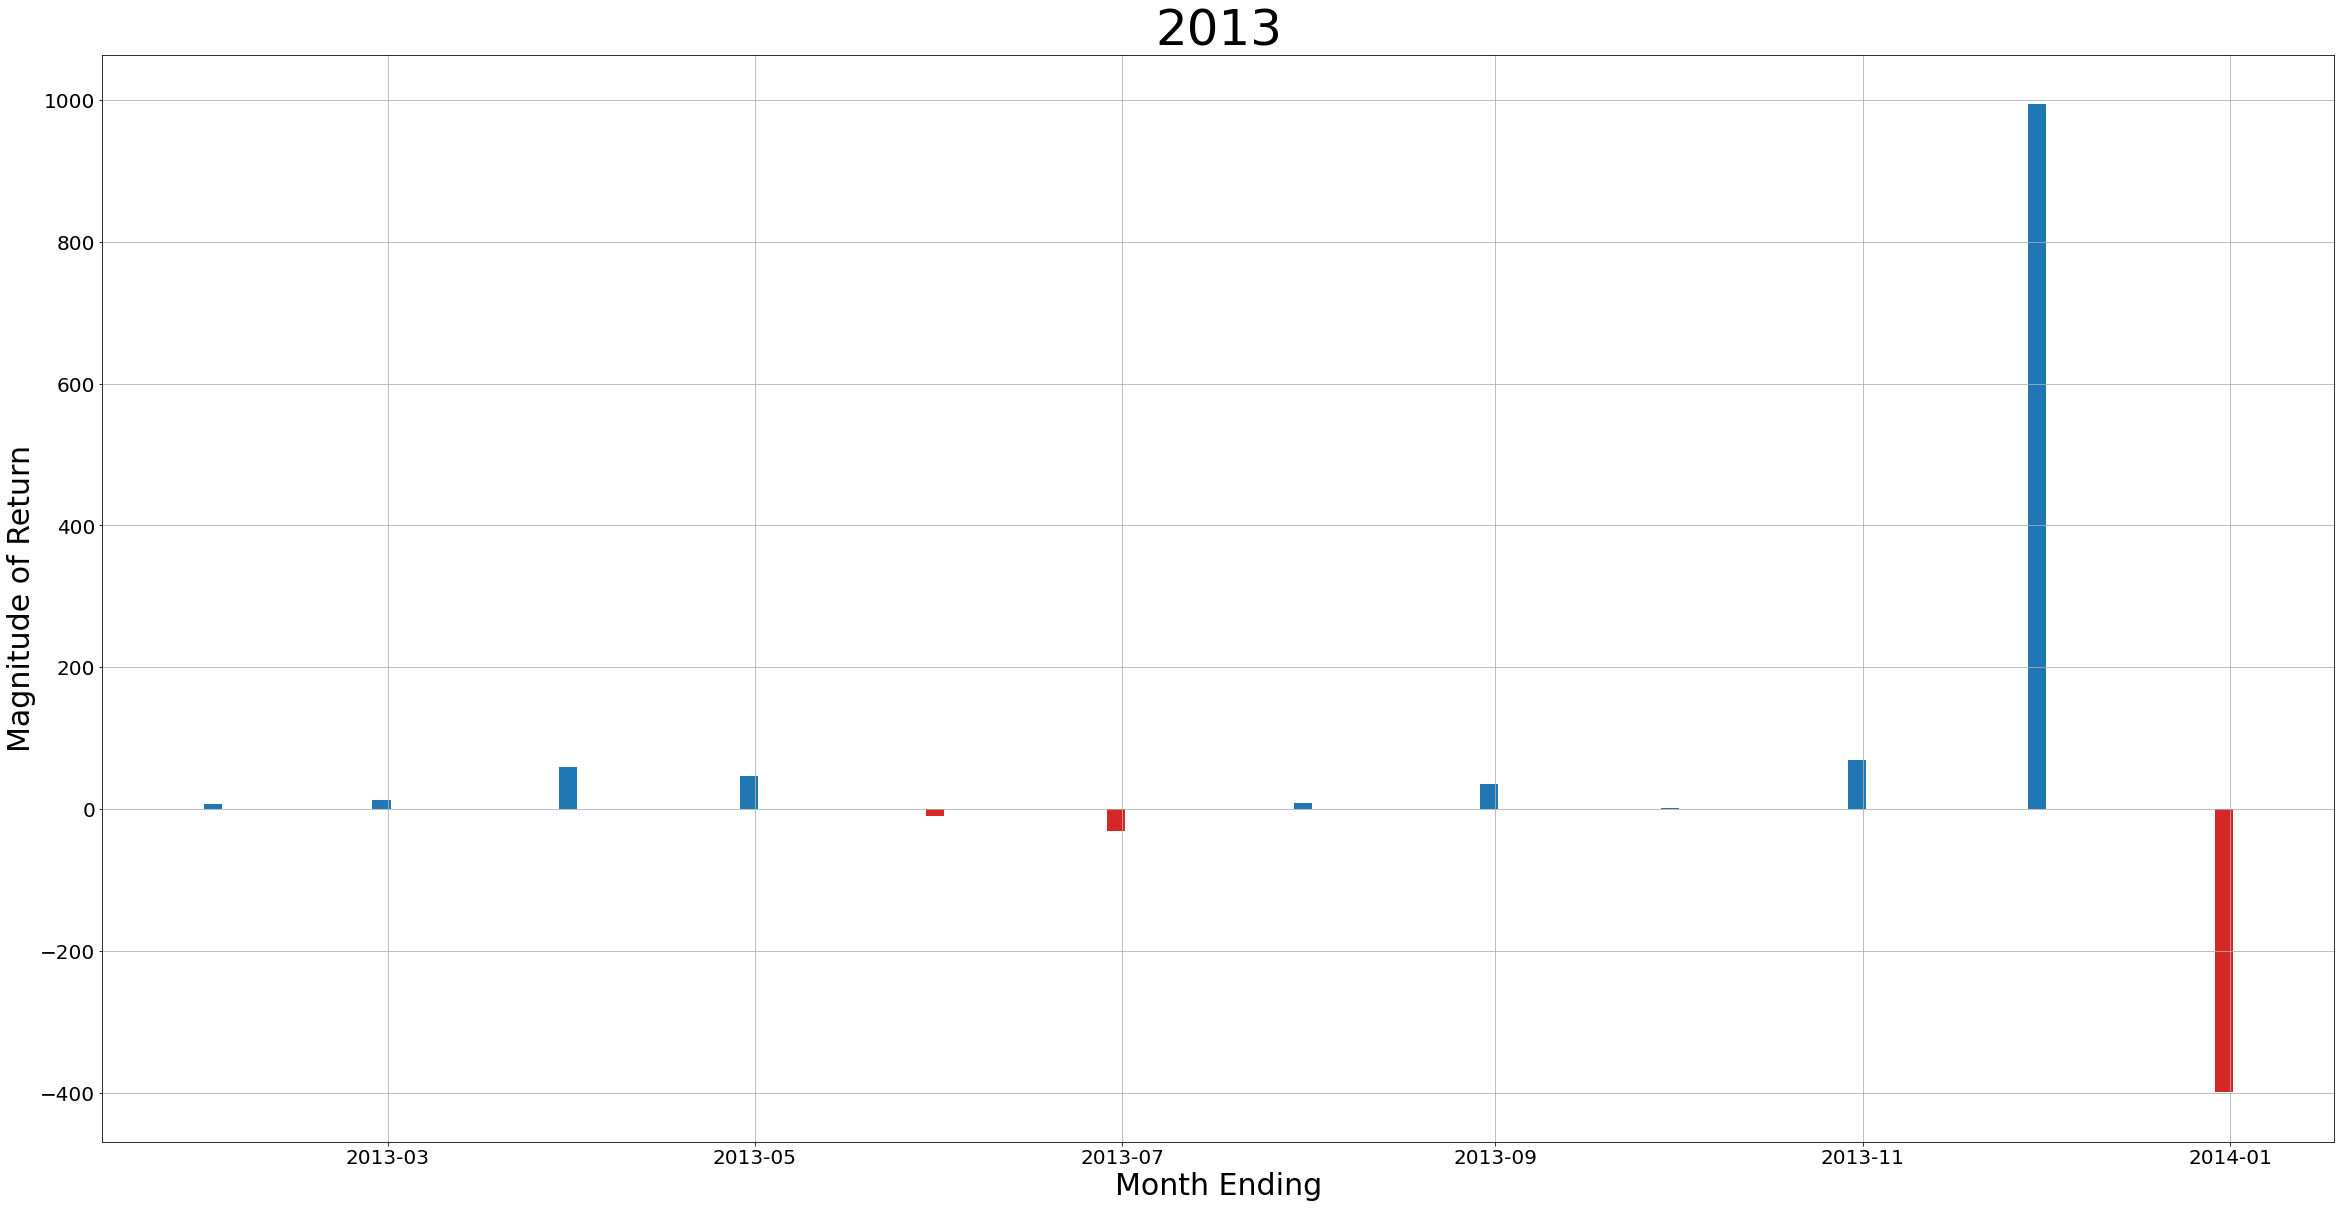

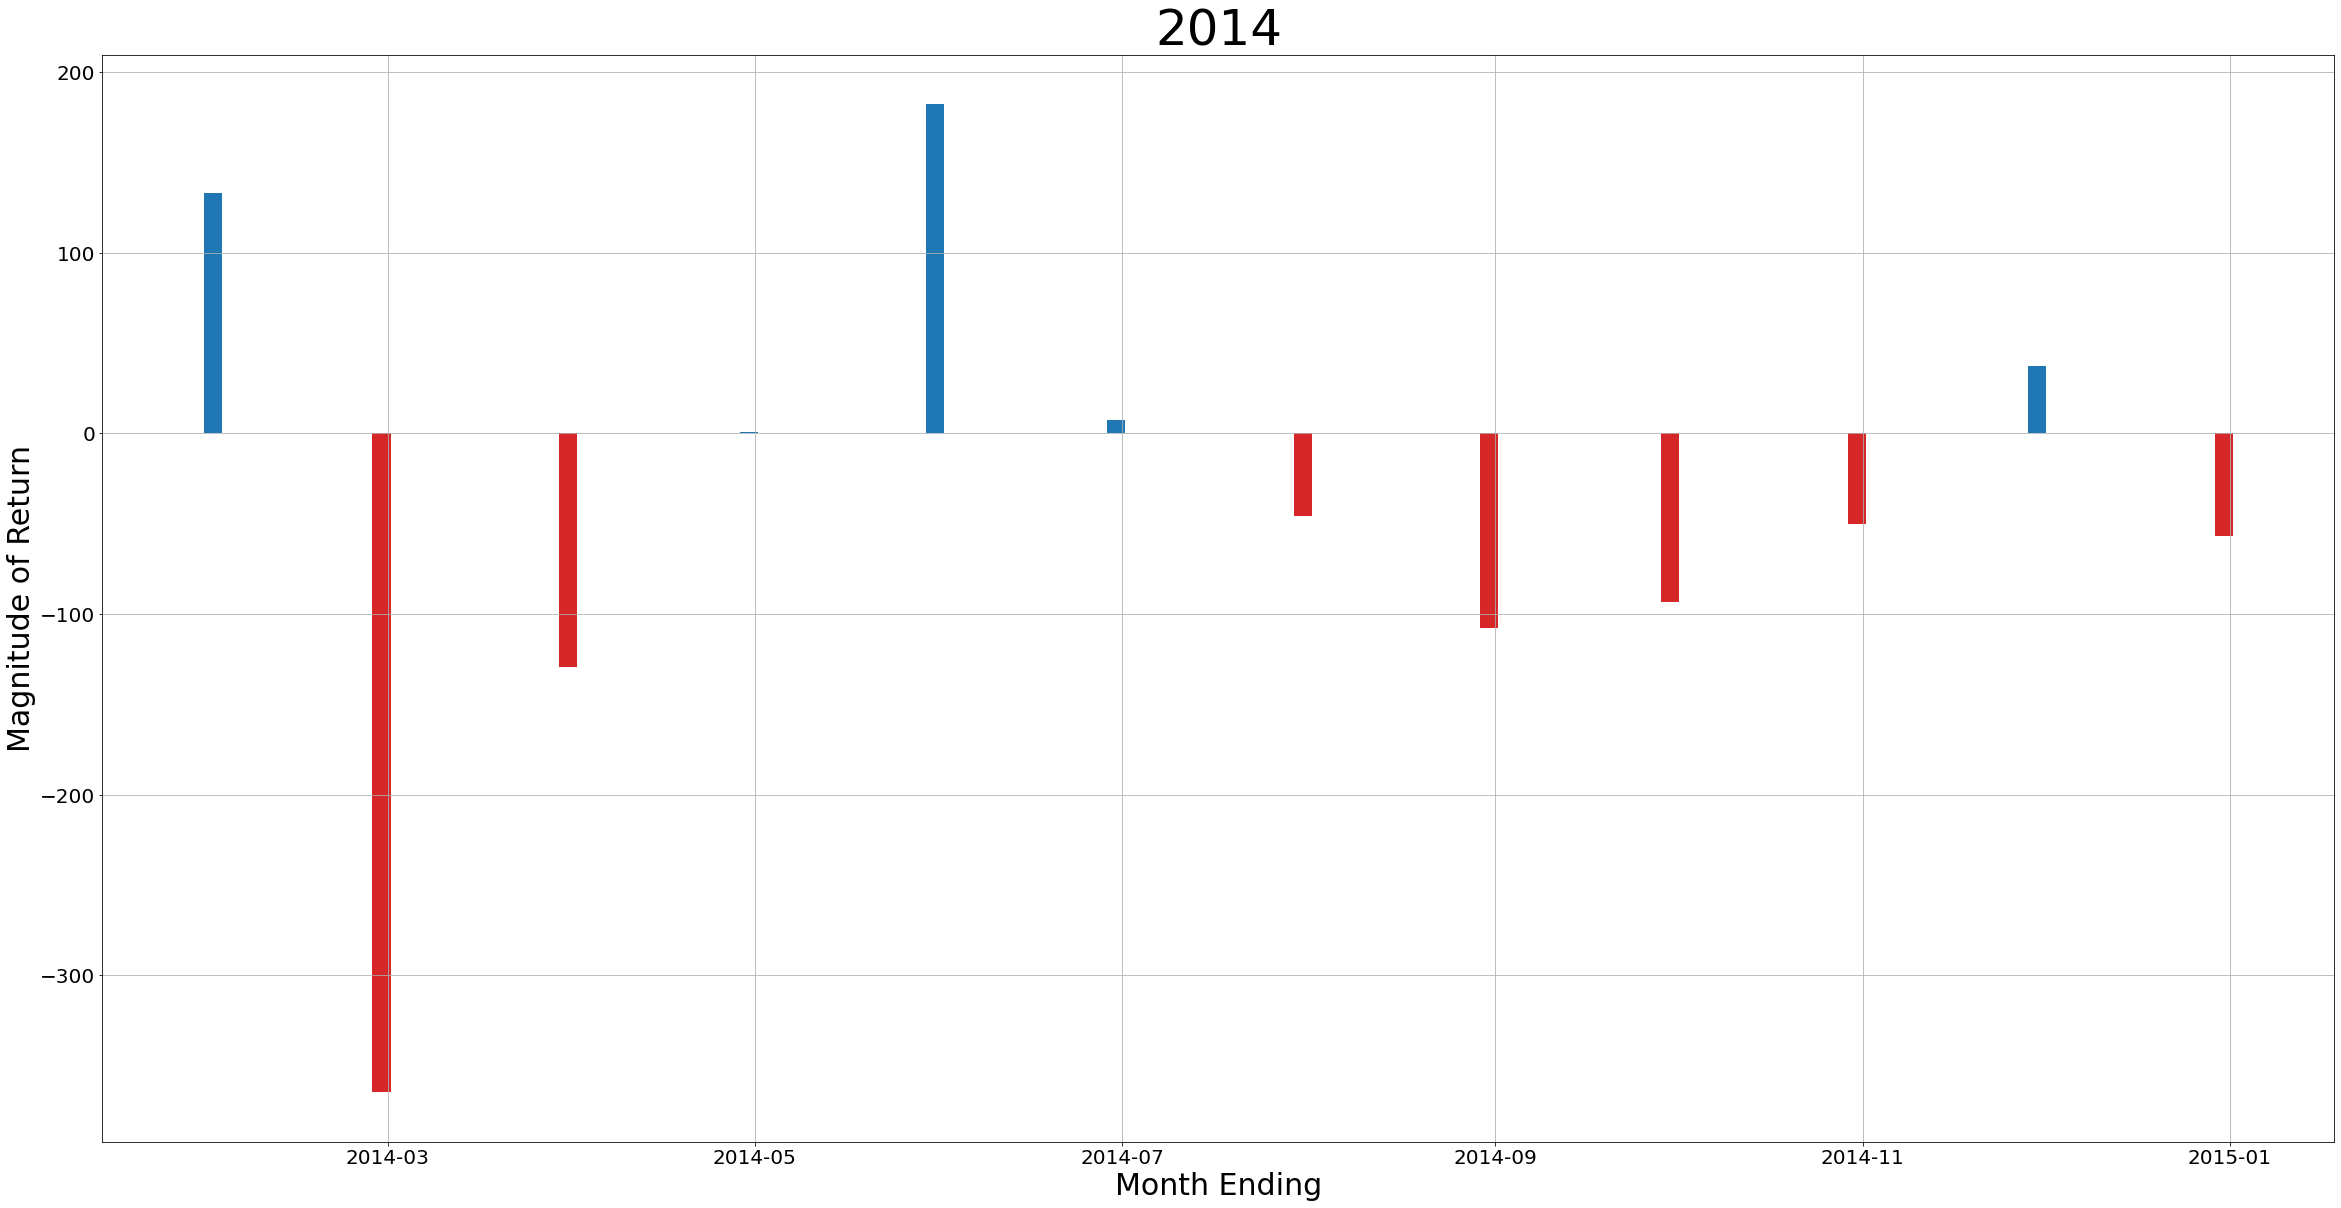

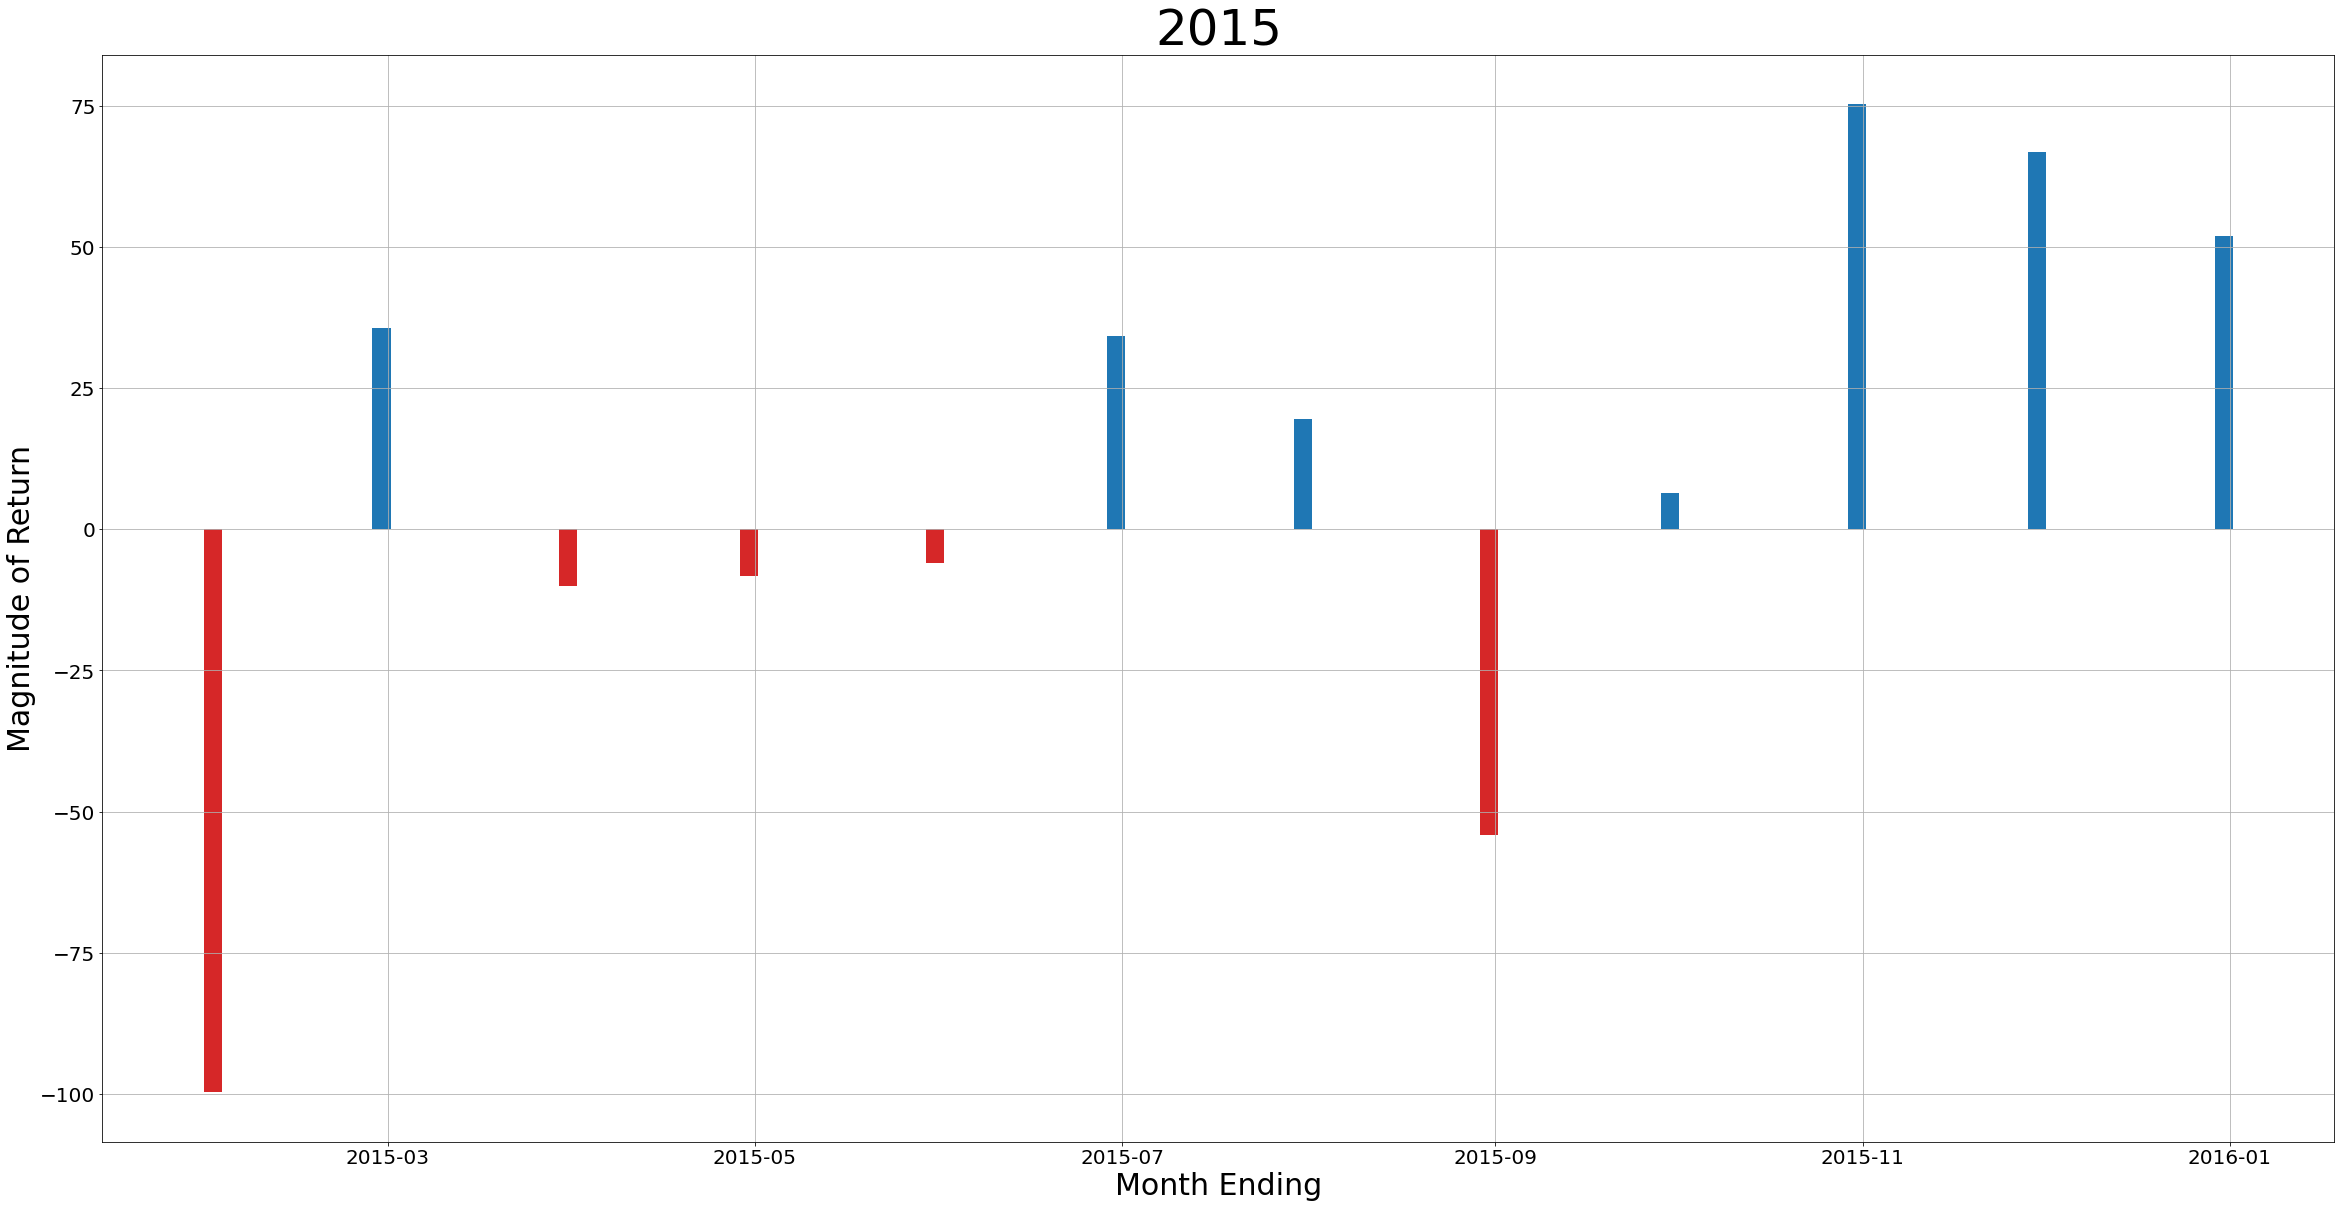

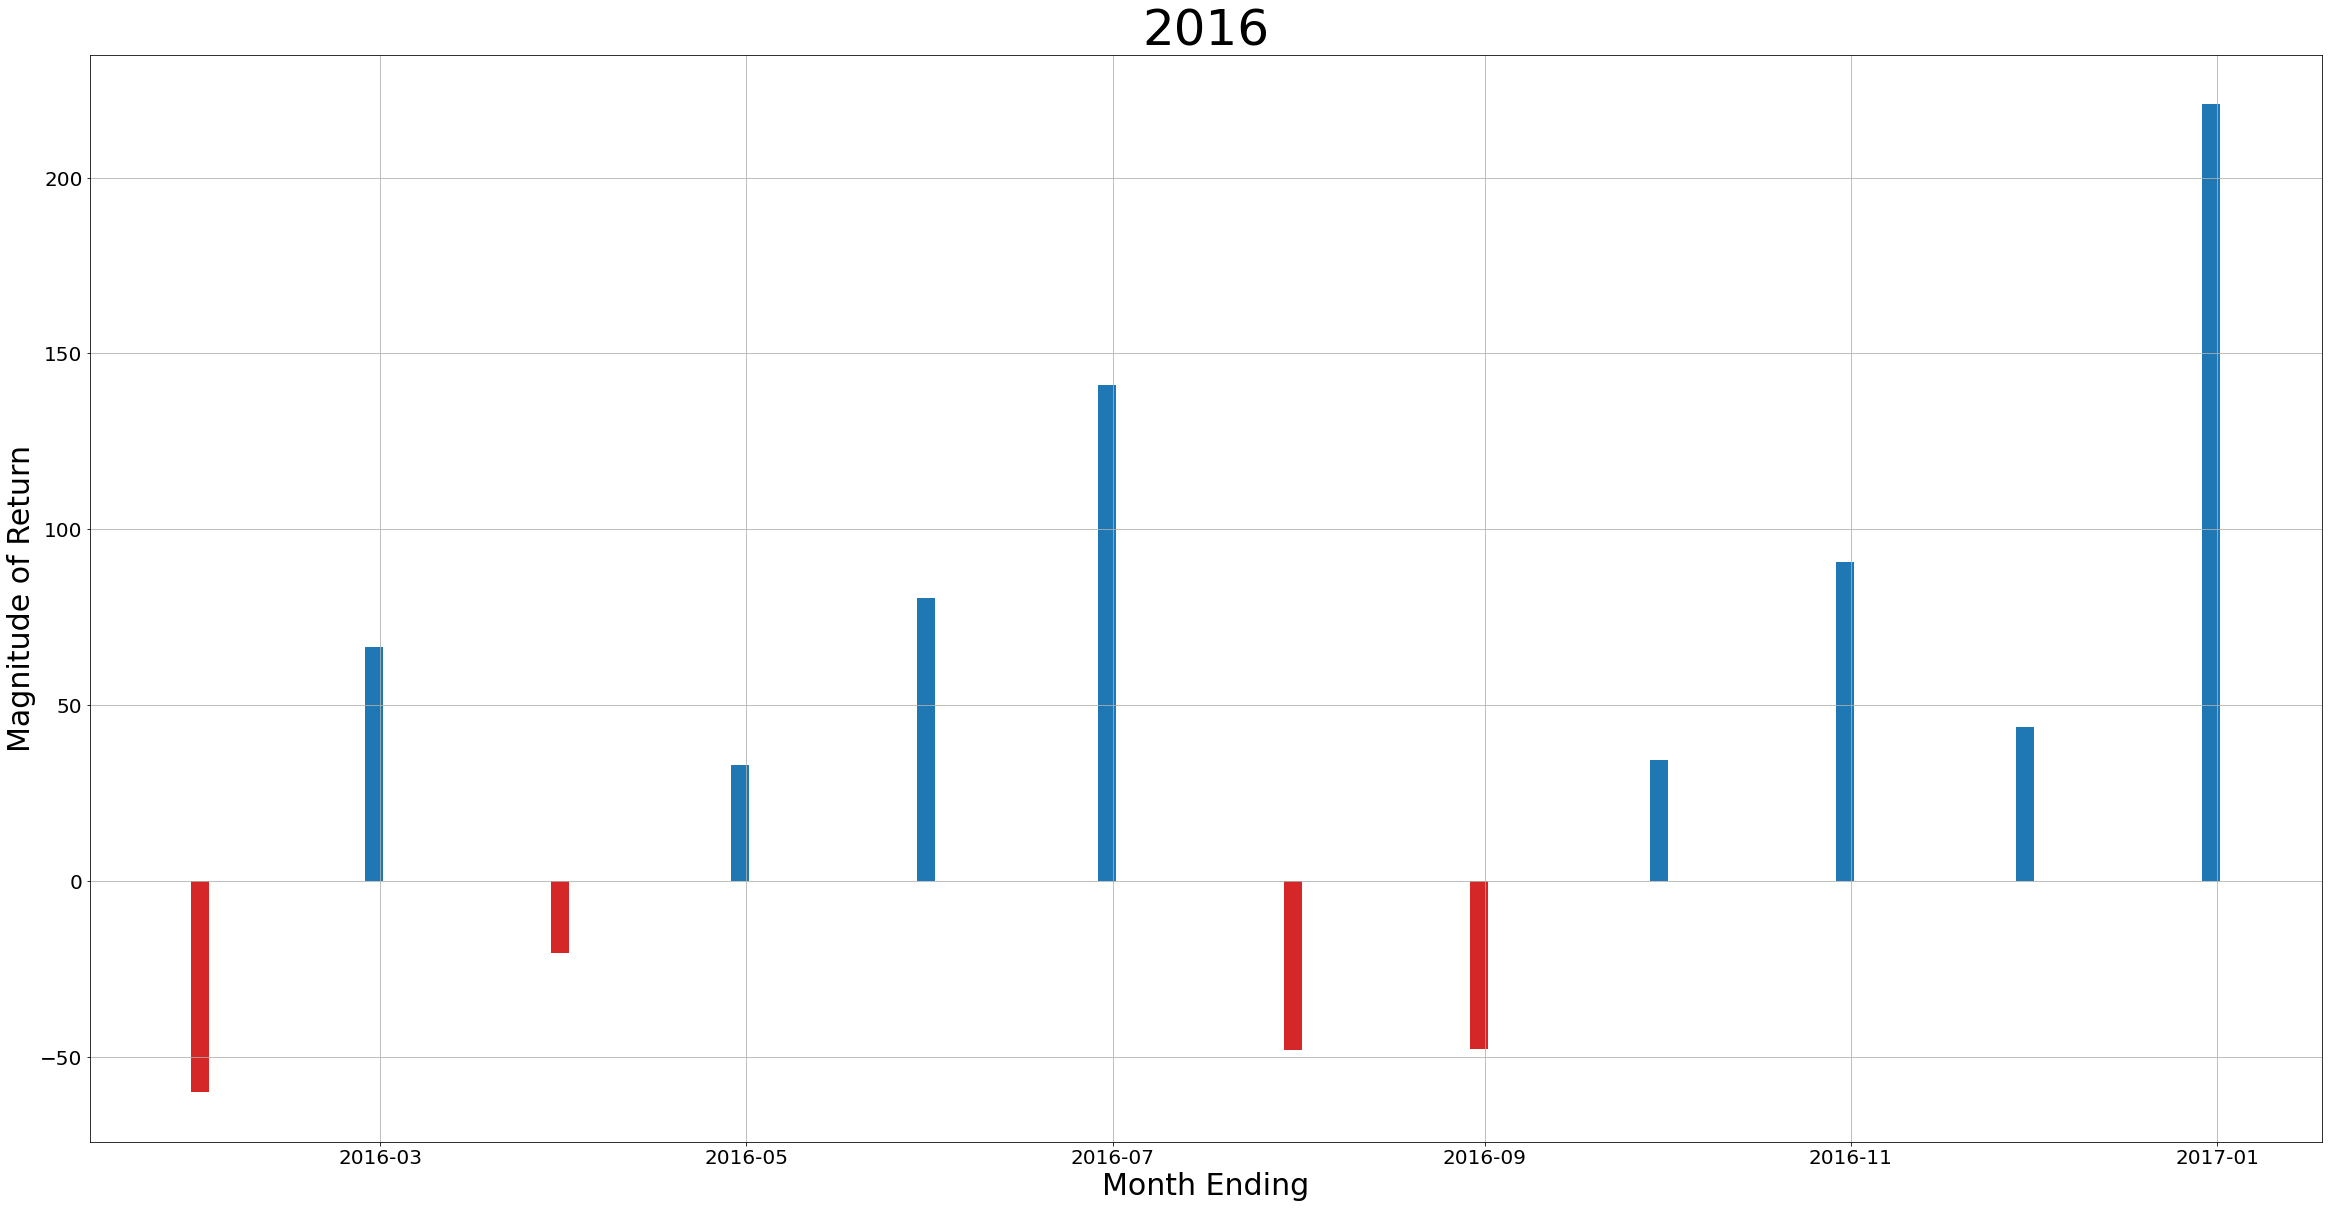

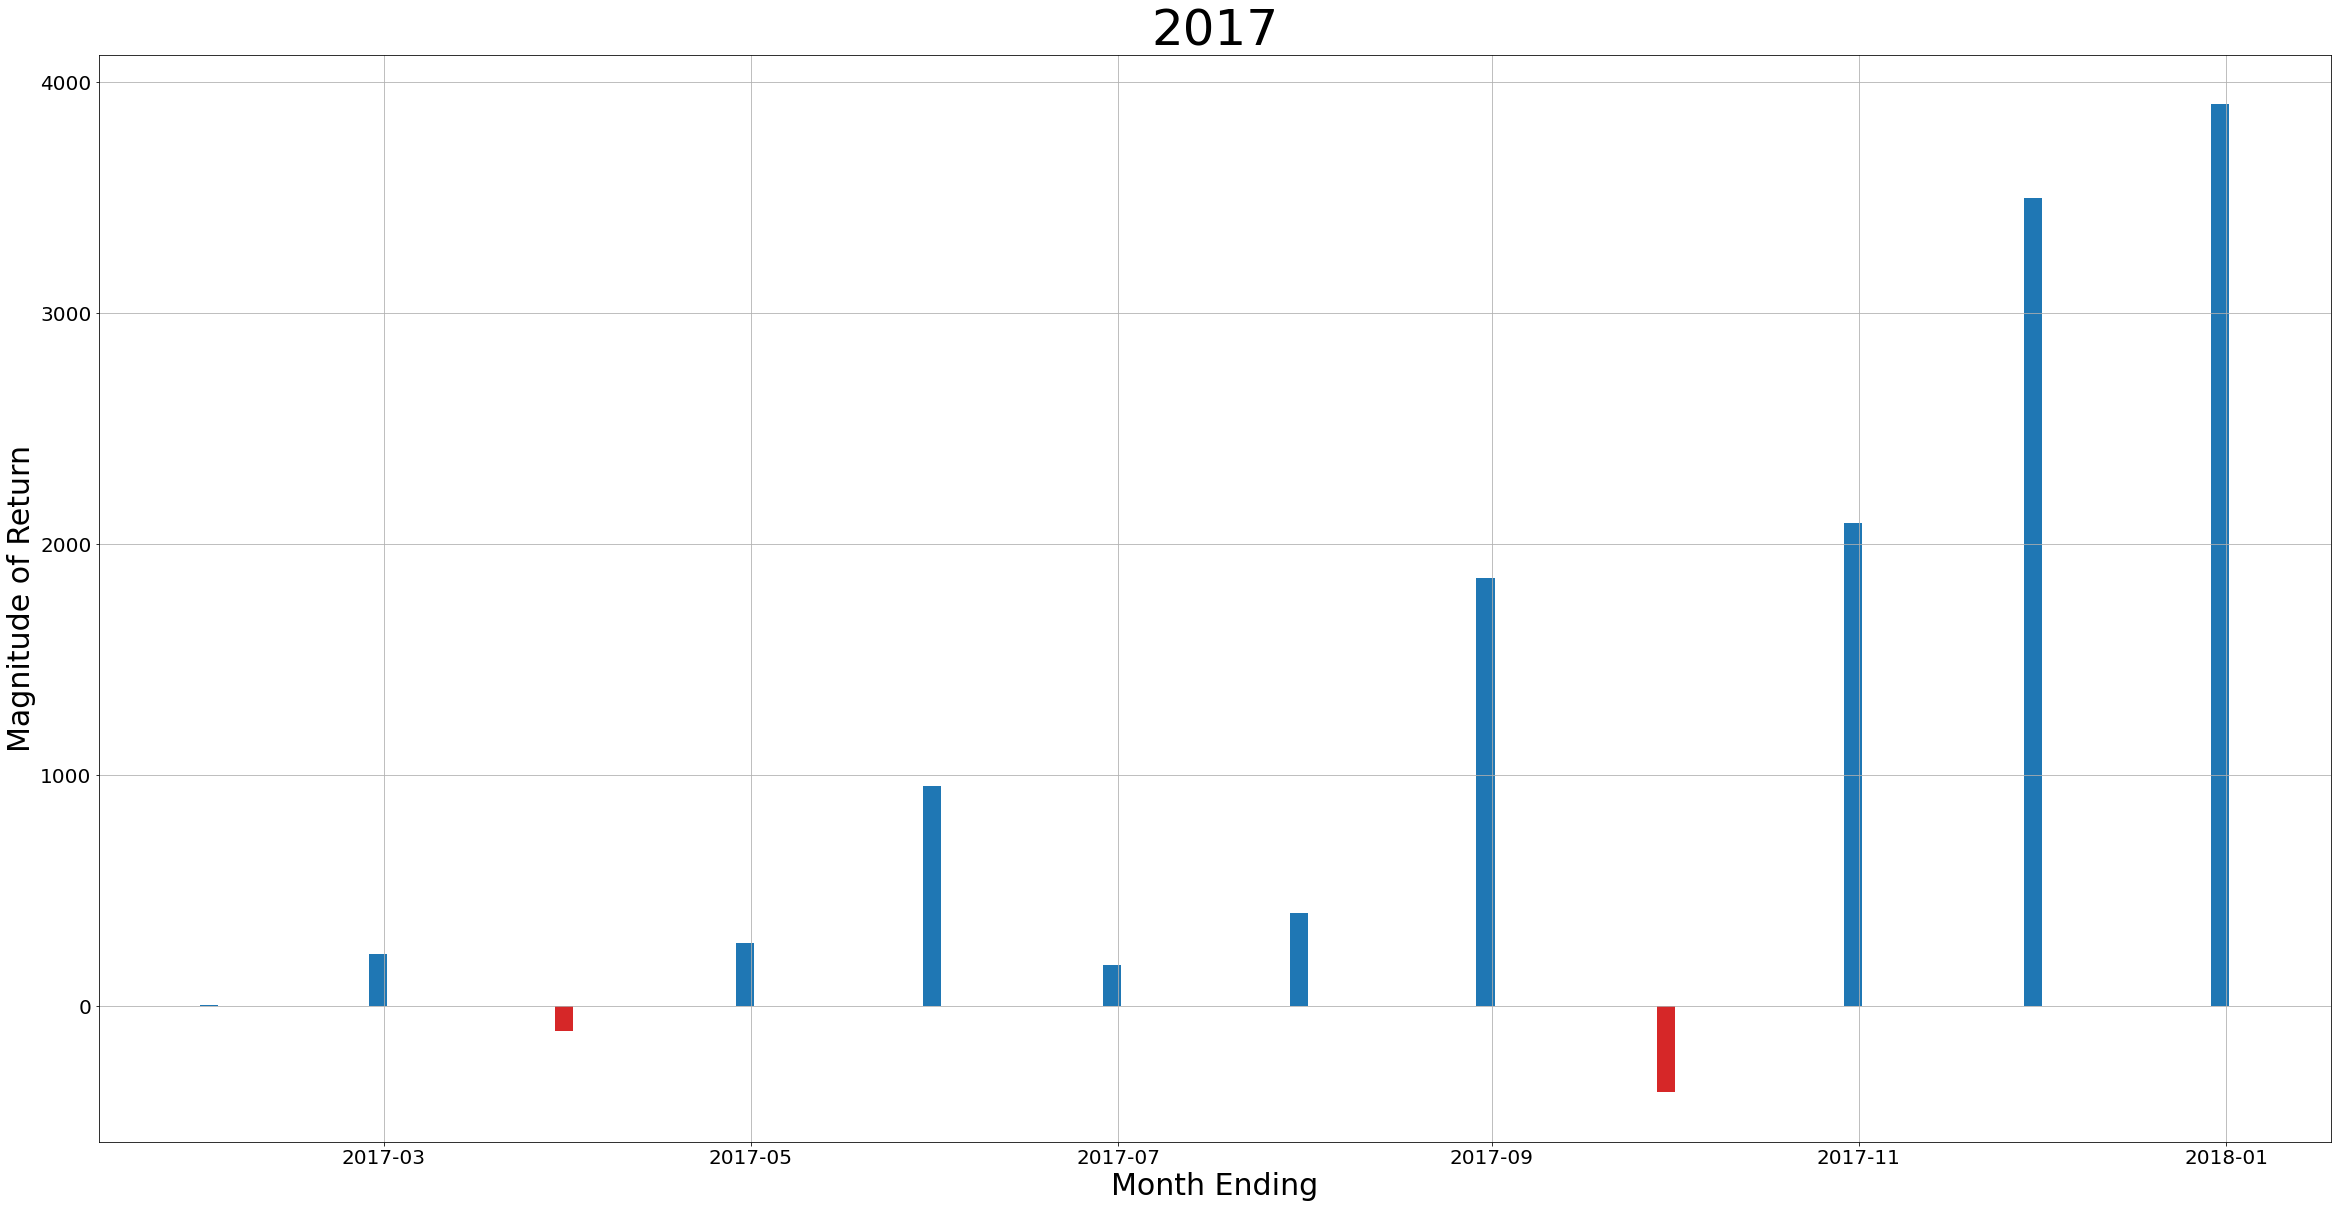

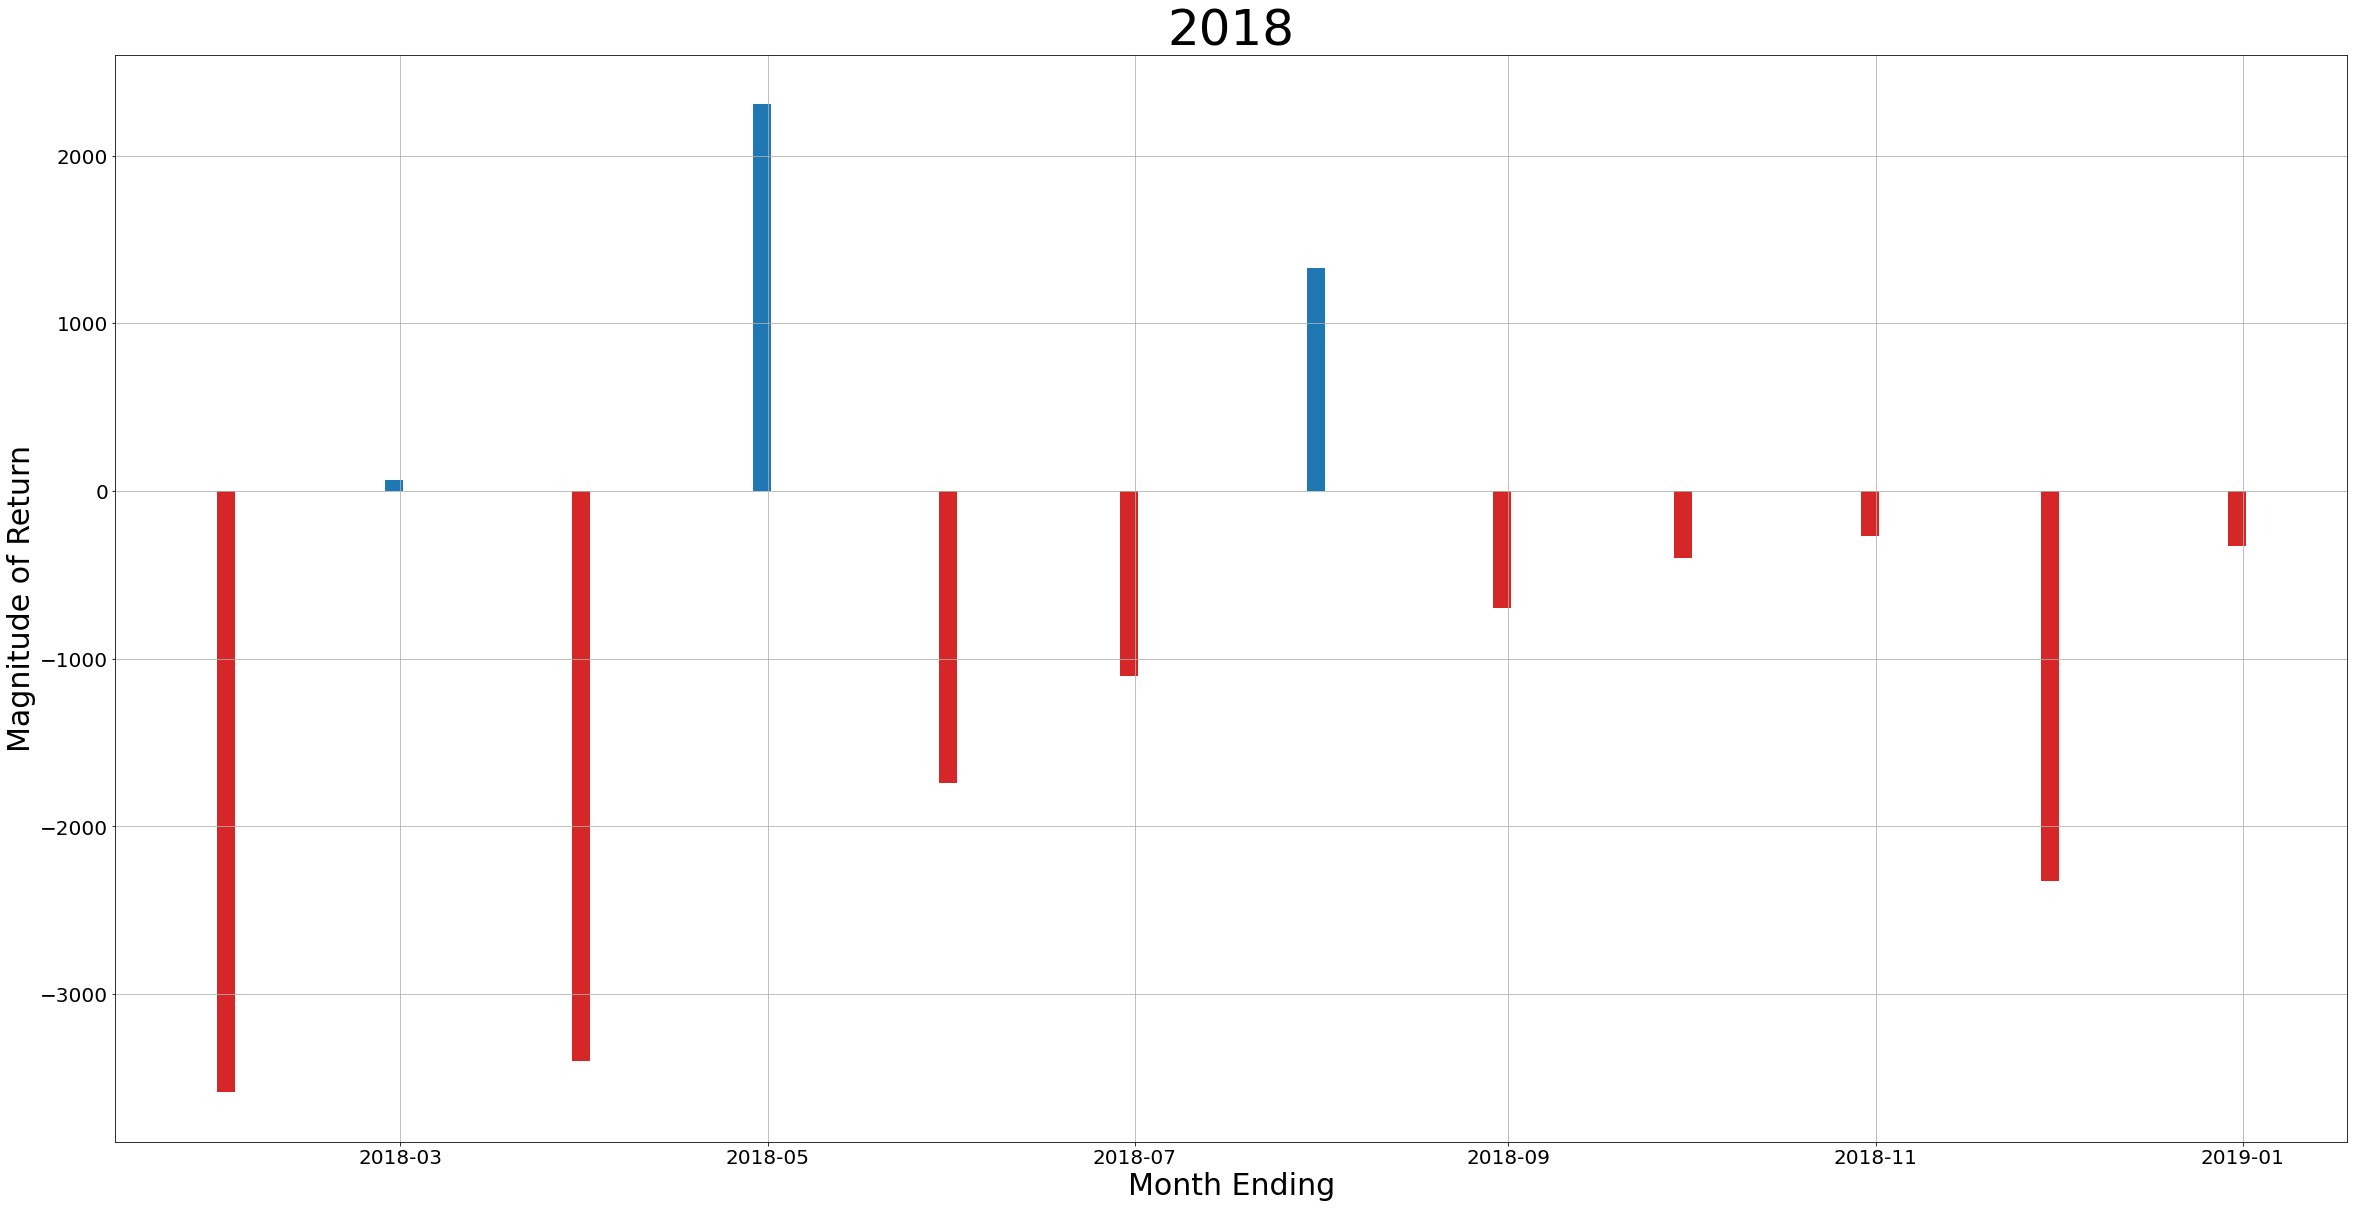

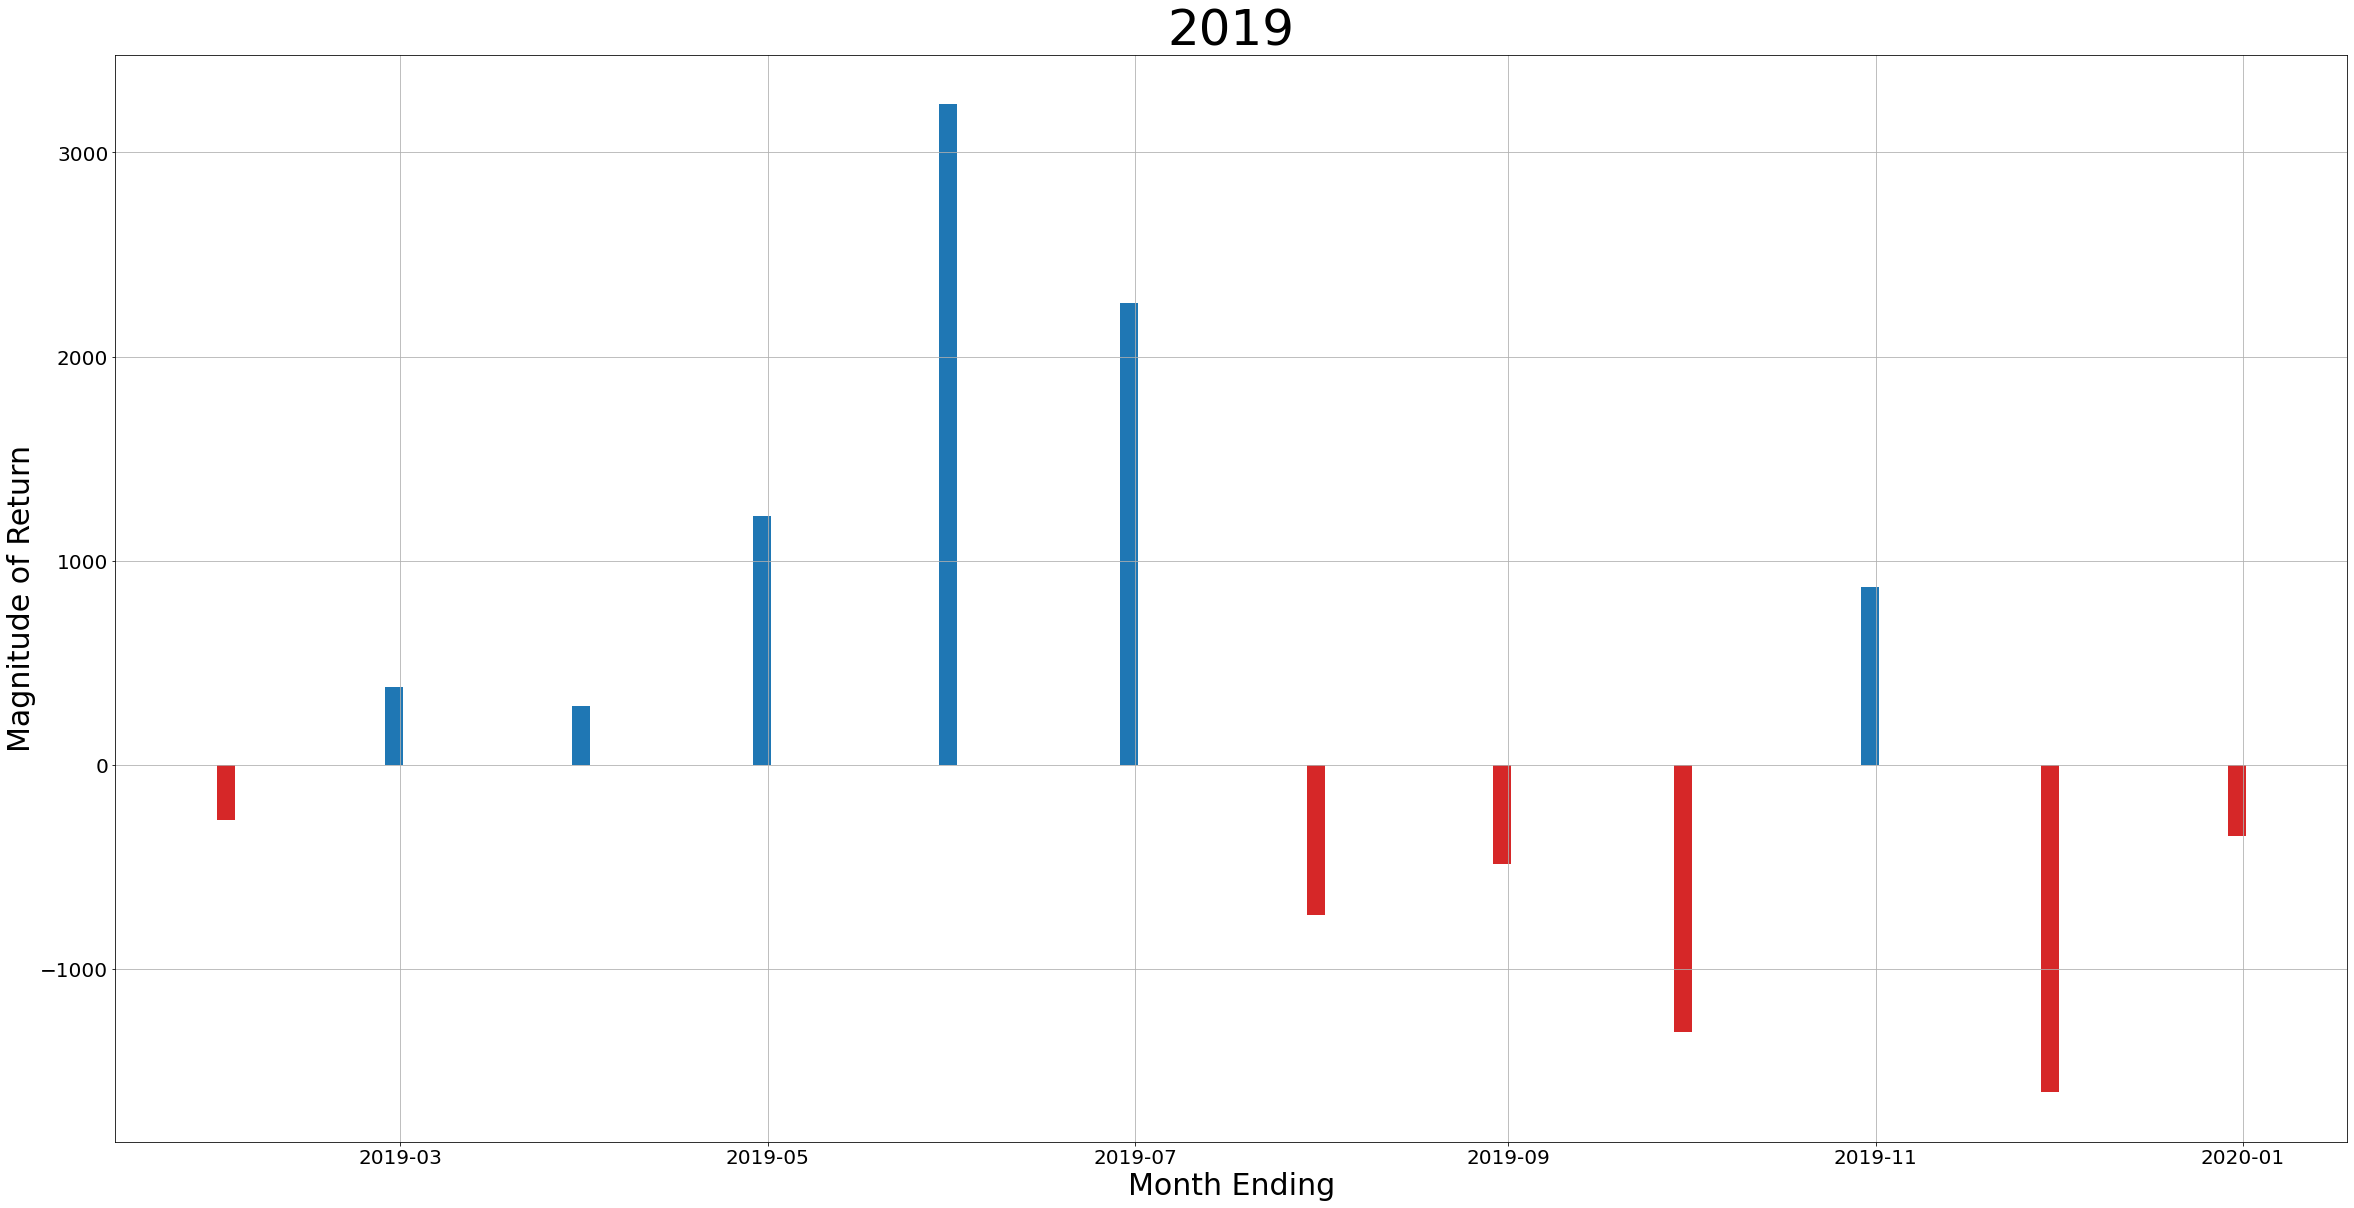

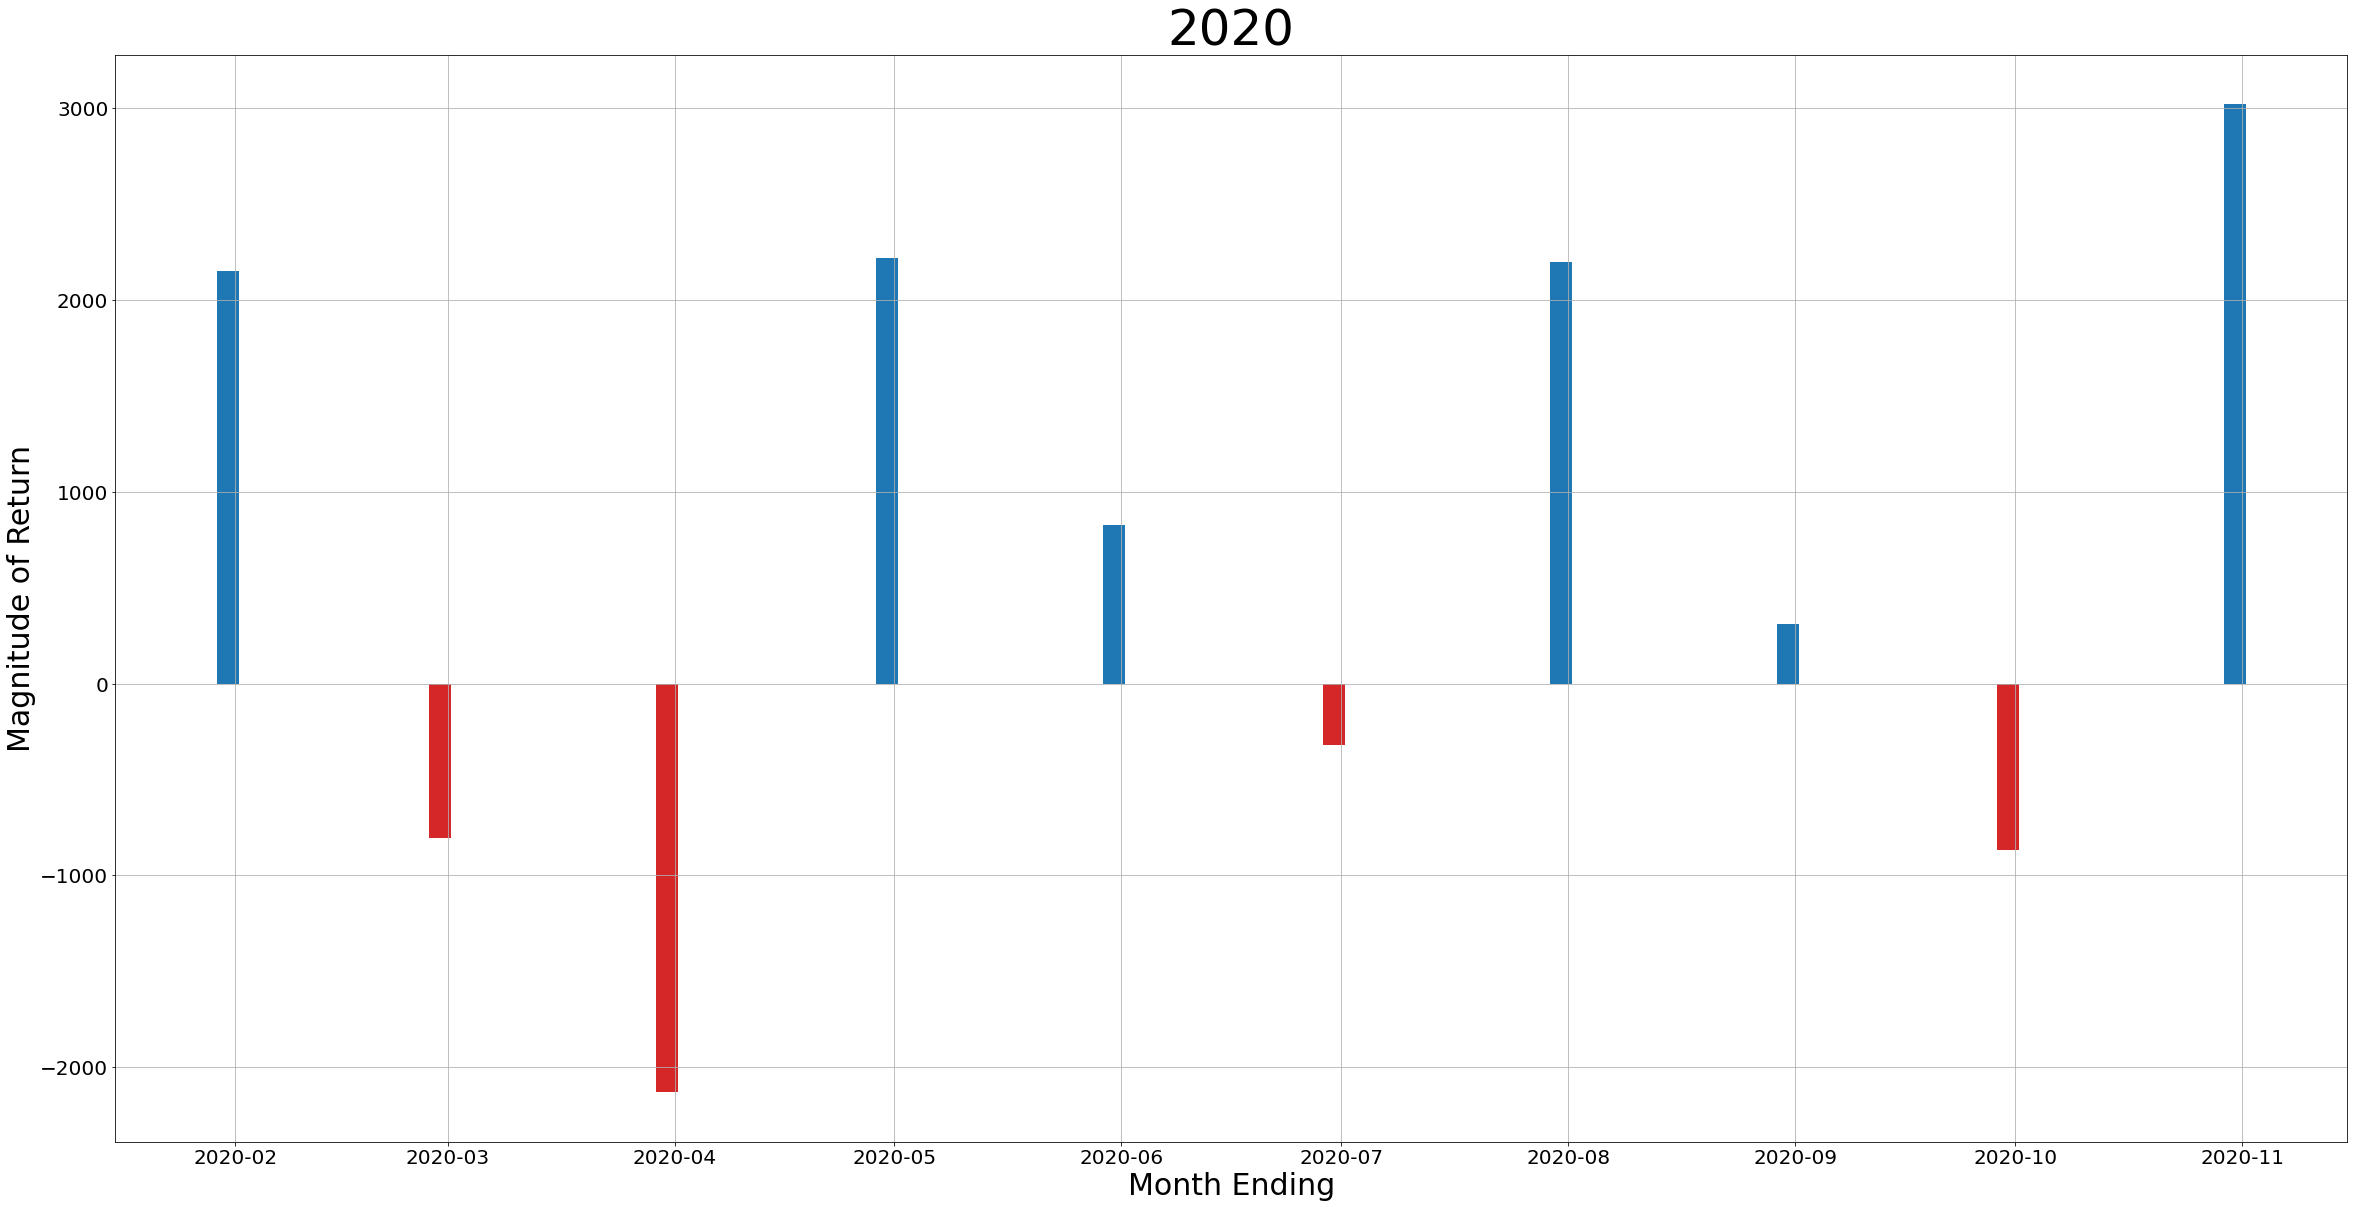

In [54]:
for i in range (2011,2020+1):
    plt.figure(figsize=(40,20))
    plt.title(i, size = 50)
    plt.xticks(size =20)
    plt.yticks(size = 20)
    plt.ylabel('Magnitude of Return', size =30)
    plt.xlabel('Month Ending', size =30)
    plt.grid(True)
    plt.bar(btcmonths[i]['Date'], btcmonths[i]['MoM_Mag_Change'], width = 3, color=(btcmonths[i]['MoM_Mag_Change']>0).map({True: 'tab:blue', False: 'tab:red'}))
    plt.show()

Looking at the magnitude of return makes me wonder if we don't have data for april and may 2012.  Also the above charts are a little wonky as they are plotting the last day of the month, so it almost looks like they are being plotted on the next month.  this is not production ready by any means, just doing a bit of exploration and visualization but worth calling out in case it confuses the reader. to fix, need to do a little digging into date offsets i believe, or make a new column with a more readable date value to plot off of (same MoM value though).

In [55]:
btcmonths[2012].tail()

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,MoM_Mag_Change,MoM_%_Change
3099,2012-05-31,5.2,5.1,5.2,5.1,39.48K,0.019608,2012,5,31,3,True,0.3,0.061224
3130,2012-04-30,4.9,4.9,5.0,4.9,55.77K,0.000000,2012,4,30,0,True,0.0,0.000000
3160,2012-03-31,4.9,4.9,4.9,4.8,35.53K,0.000000,2012,3,31,5,True,0.0,0.000000
3191,2012-02-29,4.9,4.9,4.9,4.8,26.54K,0.000000,2012,2,29,2,True,-0.6,-0.109091
3220,2012-01-31,5.5,5.5,5.7,5.4,48.30K,0.000000,2012,1,31,1,True,0.8,0.170213


Turns out we do have data, price just didn't move at all in that period of time.

Let's continue digging into volatility at more granular levels.  Looking at monthly vol per year, volalitily per weekday, and see if we can't discover some insights.

In [56]:
weekday_vol = btc.groupby('Weekday')['DoD_Change'].std()
weekday_vol

Weekday
0    0.058208
1    0.057575
2    0.157329
3    0.065046
4    0.053744
5    0.074619
6    0.047050
Name: DoD_Change, dtype: float64

I'm guessing Wedensday is a standout in terms of DoD_Change because a couple super massive days (up or down) in btc's history have occured on that day, not because that day should be more volatile than the rest.  Going to keep playing with the whole data set before filtering on 2016 and later.

In [57]:
mean_change_per_weekday = btc.groupby('Weekday')['DoD_Change'].mean()
mean_change_per_weekday


Weekday
0    0.006708
1    0.007512
2    0.010206
3    0.002429
4    0.003818
5    0.004055
6    0.002066
Name: DoD_Change, dtype: float64

In [58]:
btc.DoD_Change.describe()

count    3616.000000
mean        0.005256
std         0.081337
min        -0.572084
25%        -0.012711
50%         0.000306
75%         0.019977
max         3.367452
Name: DoD_Change, dtype: float64

I'll remove outliers a little later, but it is interesting that on the dataset as it is, wednesday has an average return of 1%. The Z score is just .06 though using population mean and std given for DoD_Change.  Thus, that difference in return shouldn't be statistically significant, assuming I can use that equation like that.  
(x-(mean)/std)

# Edward: 
I have a question about Z scores here that I'd like to discuss with you.  Specifically wondering how they work on grouped data (am i allowed to just subtract DoD_Change from Weekday mean and divide by the population stdev to arrive at a Z score for the speicific weekday's average change. Therefore getting a p value for a weekday's percent change being different than the population.

In [59]:
monthly_vol = pd.pivot_table(btc,index=['Year'], columns=['Month'], values=['DoD_Change'], aggfunc=np.std)
monthly_vol


DoD_Change                                                              \
Month         1         2         3         4         5         6         7    
Year                                                                           
2011    0.105338  0.114276  0.050381  0.102880  0.131505  0.152930  0.039681   
2012    0.078175  0.052609  0.032432  0.020465  0.015830  0.026296  0.036840   
2013    0.021842  0.035987  0.055353  0.141629  0.052384  0.033477  0.059629   
2014    0.044191  0.709125  0.056924  0.056879  0.032796  0.027309  0.015681   
2015    0.087253  0.039684  0.032139  0.024627  0.013468  0.016807  0.025159   
2016    0.036884  0.020502  0.012743  0.011478  0.023604  0.048592  0.022790   
2017    0.049009  0.021822  0.048229  0.016310  0.041541  0.044839  0.068936   
2018    0.062854  0.071600  0.046412  0.045488  0.028706  0.036375  0.032917   
2019    0.025964  0.027848  0.012545  0.036693  0.045586  0.052607  0.051680   
2020    0.029987  0.026472  0.092971  0.037885  0.035762  0.025789  0.022603   

                                                         
Month        8         9         10        11        12  
Year                                                     
2011   0.113057  0.083071  0.096039  0.078236  0.049577  
2012   0.084544  0.017216  0.023824  0.019632  0.012947  
2013   0.026643  0.031433  0.051562  0.112454  0.126762  
2014   0.031141  0.029390  0.029849  0.044639  0.023064  
2015   0.028892  0.013747  0.019473  0.051185  0.031891  
2016   0.035656  0.011876  0.014919  0.019445  0.019327  
2017   0.038797  0.061598  0.035678  0.046538  0.083641  
2018   0.027762  0.025096  0.016763  0.046674  0.044650  
2019   0.035027  0.030202  0.040453  0.026531  0.025677  
2020   0.023739  0.029537  0.019061  0.031859       NaN

Text(0.5, 15.0, 'Month')

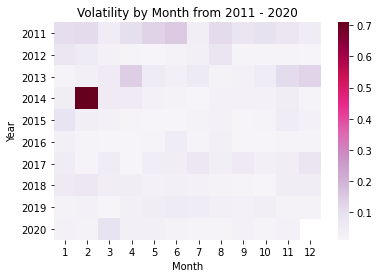

In [60]:
ax = sns.heatmap(monthly_vol, xticklabels=[1,2,3,4,5,6,7,8,9,10,11,12], cmap='PuRd')
plt.title('Volatility by Month from 2011 - 2020')
plt.xlabel('Month')


Using the heatmap to visualize volaity per month per year, the mount gox collapse of Feb 2014 really really stands out.

Text(0.5, 1.0, 'Volatilty by Weekday')

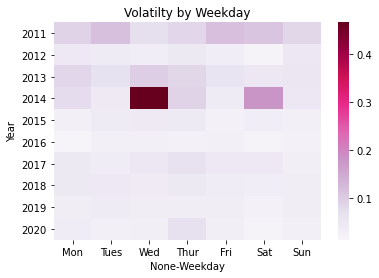

In [61]:
weekday_vol = pd.pivot_table(btc, index=['Year'], columns=['Weekday'], values=['DoD_Change'], aggfunc=np.std)
sns.heatmap(weekday_vol, xticklabels=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],cmap='PuRd')
plt.title('Volatilty by Weekday')

The higher volatilty of 2014 and earlier is a bit more visible when breaking it down by weekday.  Want to look at how those relationships have changed from 2016 till now though.  Was running into some indexing errors using a the standard mask argument for seaborn heatmaps so will make a slice of the main dataframe first and then will look at volatility by month and weekday there. 

In [62]:
btc_recent = btc.loc[btc['Year']>=2016]

In [63]:
# March 12 2020 btc crash almost 50% in a day, a black swan event for the space.  
# I'd like to look at the data with that date and without
filt = (btc_recent['Date'] != "2020-03-12")
btc_no_march_12 = btc_recent.loc[filt]

In [64]:
#checking the filter works
btc_recent.tail()

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End
1785,2016-01-05,431.2,433.3,435.3,428.9,45.03K,-0.004847,2016,1,5,1,False
1786,2016-01-04,433.3,430.7,435.3,428.6,53.01K,0.006037,2016,1,4,0,False
1787,2016-01-03,430.7,433.7,434.1,423.1,54.83K,-0.006917,2016,1,3,6,False
1788,2016-01-02,433.7,434.0,437.4,430.7,33.57K,-0.000691,2016,1,2,5,False
1789,2016-01-01,434.0,430.0,438.0,425.9,46.97K,0.009302,2016,1,1,4,False


In [65]:
recent_monthly_vol = pd.pivot_table(btc_recent,index=['Year'], columns=['Month'], values=['DoD_Change'], aggfunc=np.std)
recent_monthly_vol


DoD_Change                                                              \
Month         1         2         3         4         5         6         7    
Year                                                                           
2016    0.036884  0.020502  0.012743  0.011478  0.023604  0.048592  0.022790   
2017    0.049009  0.021822  0.048229  0.016310  0.041541  0.044839  0.068936   
2018    0.062854  0.071600  0.046412  0.045488  0.028706  0.036375  0.032917   
2019    0.025964  0.027848  0.012545  0.036693  0.045586  0.052607  0.051680   
2020    0.029987  0.026472  0.092971  0.037885  0.035762  0.025789  0.022603   

                                                         
Month        8         9         10        11        12  
Year                                                     
2016   0.035656  0.011876  0.014919  0.019445  0.019327  
2017   0.038797  0.061598  0.035678  0.046538  0.083641  
2018   0.027762  0.025096  0.016763  0.046674  0.044650  
2019   0.035027  0.030202  0.040453  0.026531  0.025677  
2020   0.023739  0.029537  0.019061  0.031859       NaN

In [66]:
#excluding march 12th 2020
monthly_vol_exc_mar12 = pd.pivot_table(btc_no_march_12,index=['Year'], columns=['Month'], values=['DoD_Change'], aggfunc=np.std)
monthly_vol_exc_mar12

DoD_Change                                                              \
Month         1         2         3         4         5         6         7    
Year                                                                           
2016    0.036884  0.020502  0.012743  0.011478  0.023604  0.048592  0.022790   
2017    0.049009  0.021822  0.048229  0.016310  0.041541  0.044839  0.068936   
2018    0.062854  0.071600  0.046412  0.045488  0.028706  0.036375  0.032917   
2019    0.025964  0.027848  0.012545  0.036693  0.045586  0.052607  0.051680   
2020    0.029987  0.026472  0.059889  0.037885  0.035762  0.025789  0.022603   

                                                         
Month        8         9         10        11        12  
Year                                                     
2016   0.035656  0.011876  0.014919  0.019445  0.019327  
2017   0.038797  0.061598  0.035678  0.046538  0.083641  
2018   0.027762  0.025096  0.016763  0.046674  0.044650  
2019   0.035027  0.030202  0.040453  0.026531  0.025677  
2020   0.023739  0.029537  0.019061  0.031859       NaN

Removing March 12 from the data drops the monthly variance by 35% (from a stdev of .092 for march2020 down to .06).  Printing some heatmaps below to visually compare.

Text(0.5, 15.0, 'Month')

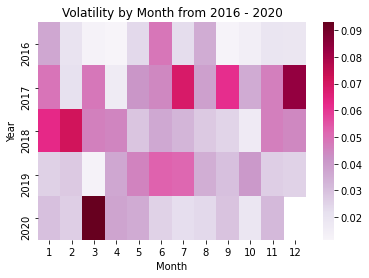

In [67]:
ax = sns.heatmap(recent_monthly_vol, xticklabels=[1,2,3,4,5,6,7,8,9,10,11,12], cmap='PuRd')
plt.title('Volatility by Month from 2016 - 2020')
plt.xlabel('Month')

Text(0.5, 15.0, 'Month')

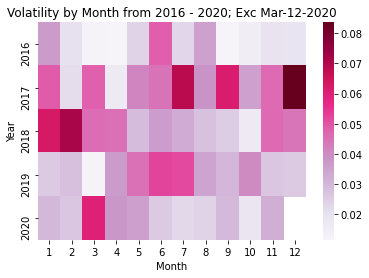

In [68]:
ax = sns.heatmap(monthly_vol_exc_mar12, xticklabels=[1,2,3,4,5,6,7,8,9,10,11,12], cmap='PuRd')
plt.title('Volatility by Month from 2016 - 2020; Exc Mar-12-2020')
plt.xlabel('Month')

Going to look at the numeric volatilty scores for weekdays from 2016 till now, both with and without March 12th 2020

In [69]:
recent_weekday_vol = pd.pivot_table(btc_recent, index=['Year'], columns=['Weekday'], values=['DoD_Change'], aggfunc=np.std)
recent_weekday_vol

DoD_Change                                                            
Weekday          0         1         2         3         4         5         6
Year                                                                          
2016      0.014061  0.029179  0.030036  0.026540  0.028538  0.022010  0.025807
2017      0.048081  0.040419  0.051901  0.067298  0.051014  0.049562  0.031953
2018      0.048363  0.049363  0.042957  0.048394  0.038339  0.034955  0.035543
2019      0.036290  0.041076  0.035918  0.035308  0.036696  0.027654  0.036876
2020      0.036995  0.029695  0.032769  0.071836  0.031990  0.020821  0.029781

In [70]:
vol_excluding_march_12 = pd.pivot_table(btc_no_march_12, index=['Year'], columns=['Weekday'], values=['DoD_Change'], aggfunc=np.std)
vol_excluding_march_12

DoD_Change                                                            
Weekday          0         1         2         3         4         5         6
Year                                                                          
2016      0.014061  0.029179  0.030036  0.026540  0.028538  0.022010  0.025807
2017      0.048081  0.040419  0.051901  0.067298  0.051014  0.049562  0.031953
2018      0.048363  0.049363  0.042957  0.048394  0.038339  0.034955  0.035543
2019      0.036290  0.041076  0.035918  0.035308  0.036696  0.027654  0.036876
2020      0.036995  0.029695  0.032769  0.042103  0.031990  0.020821  0.029781

Again, pretty large impact to data by having March 12th included. Going to go dig into DoD % change and see if there are other outliers we should account for.

<BarContainer object of 3616 artists>

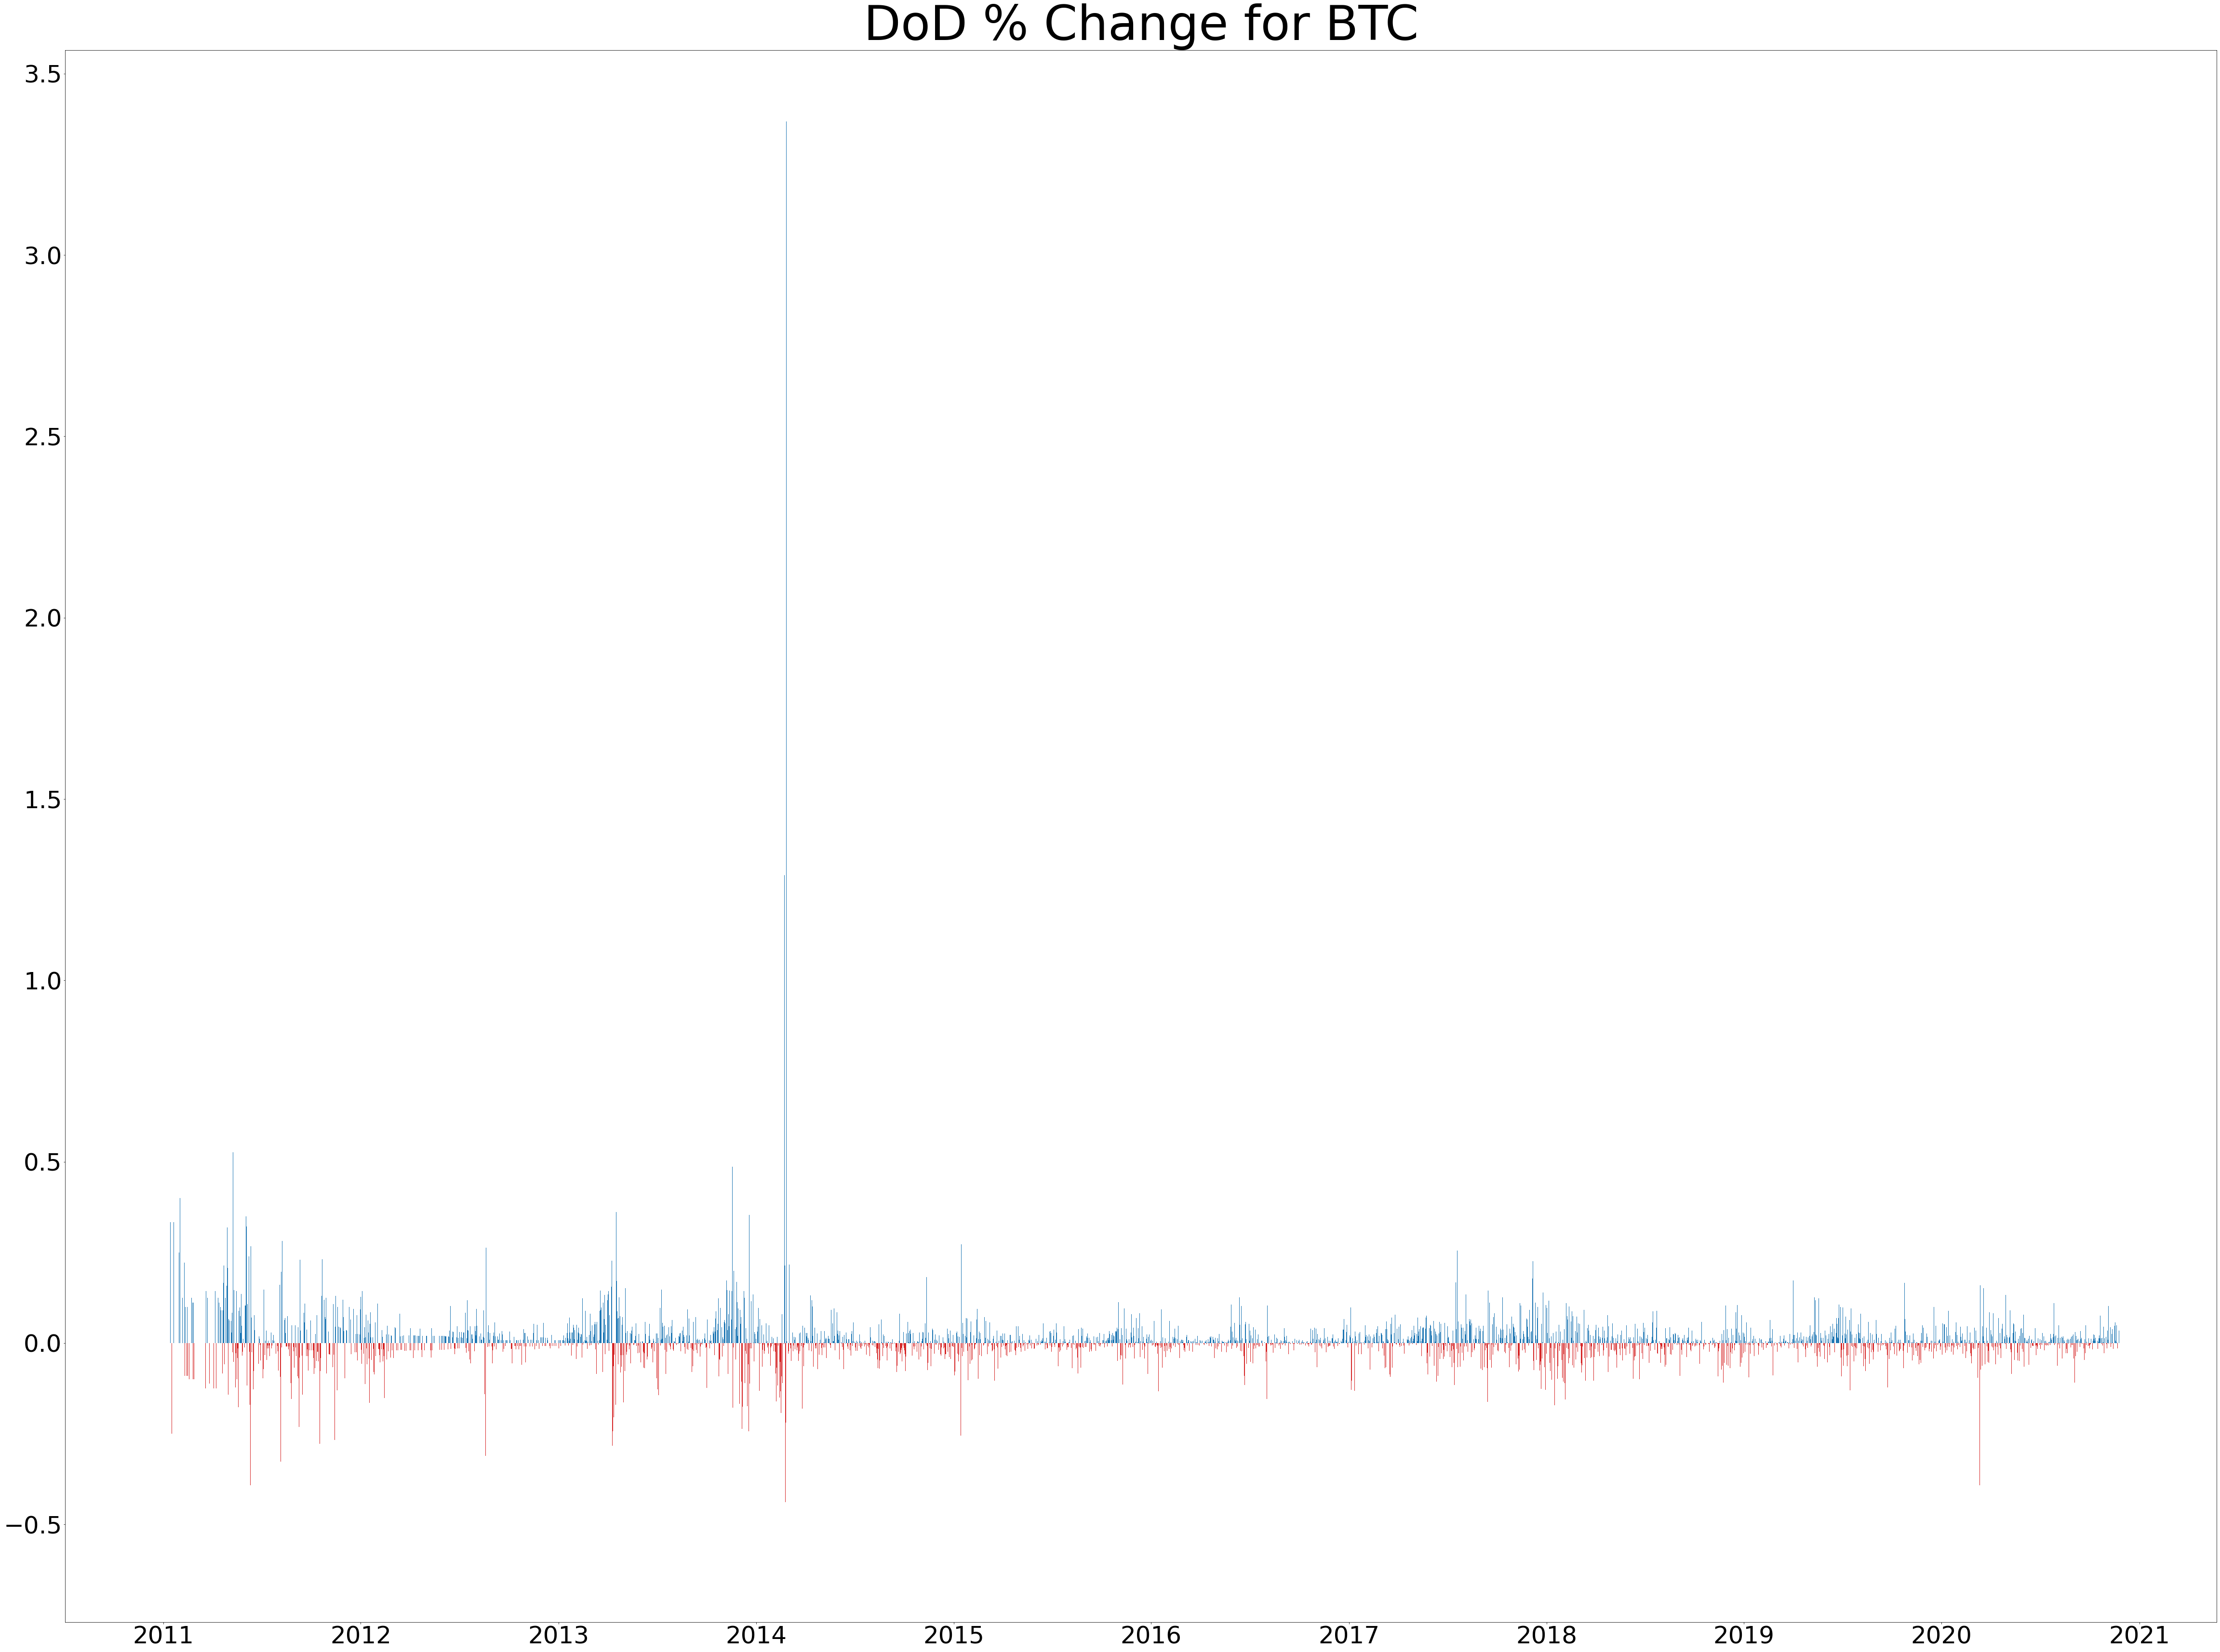

In [71]:
plt.figure(figsize=(80,60))
plt.title('DoD % Change for BTC', size = 100)
plt.xticks(size =50)
plt.yticks(size = 50)
plt.bar(btc['Date'], btc['DoD_Change'], color=(btc['DoD_Change']>0).map({True: 'tab:blue', False: 'tab:red'}))

The large positive values for DoD_Change really throw off the scaling of the chart.  Obviously there are also some mega outliers in there, on both the negative and positive side.  Going to look at normalized DoD_Change values ie Z scores to give a more fair scaling to the negative days in comparison to the positive days.

In [72]:
btc['DoD_Z_Score'] = (btc['DoD_Change']- btc['DoD_Change'].mean())/(btc['DoD_Change'].std())
btc.head()

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,DoD_Z_Score
0,2020-11-24,19030.4,18394.6,19416.6,18074.8,179.85K,0.034564,2020,11,24,1,False,0.360332
1,2020-11-23,18379.6,18428.1,18756.8,18016.0,127.35K,-0.002632,2020,11,23,0,False,-0.096982
2,2020-11-22,18412.9,18689.3,18751.5,17644.6,121.76K,-0.014789,2020,11,22,6,False,-0.246451
3,2020-11-21,18687.2,18673.8,18966.0,18397.5,108.91K,0.000718,2020,11,21,5,False,-0.055802
4,2020-11-20,18675.2,17805.5,18811.0,17758.4,134.42K,0.048844,2020,11,20,4,False,0.535898


<BarContainer object of 3616 artists>

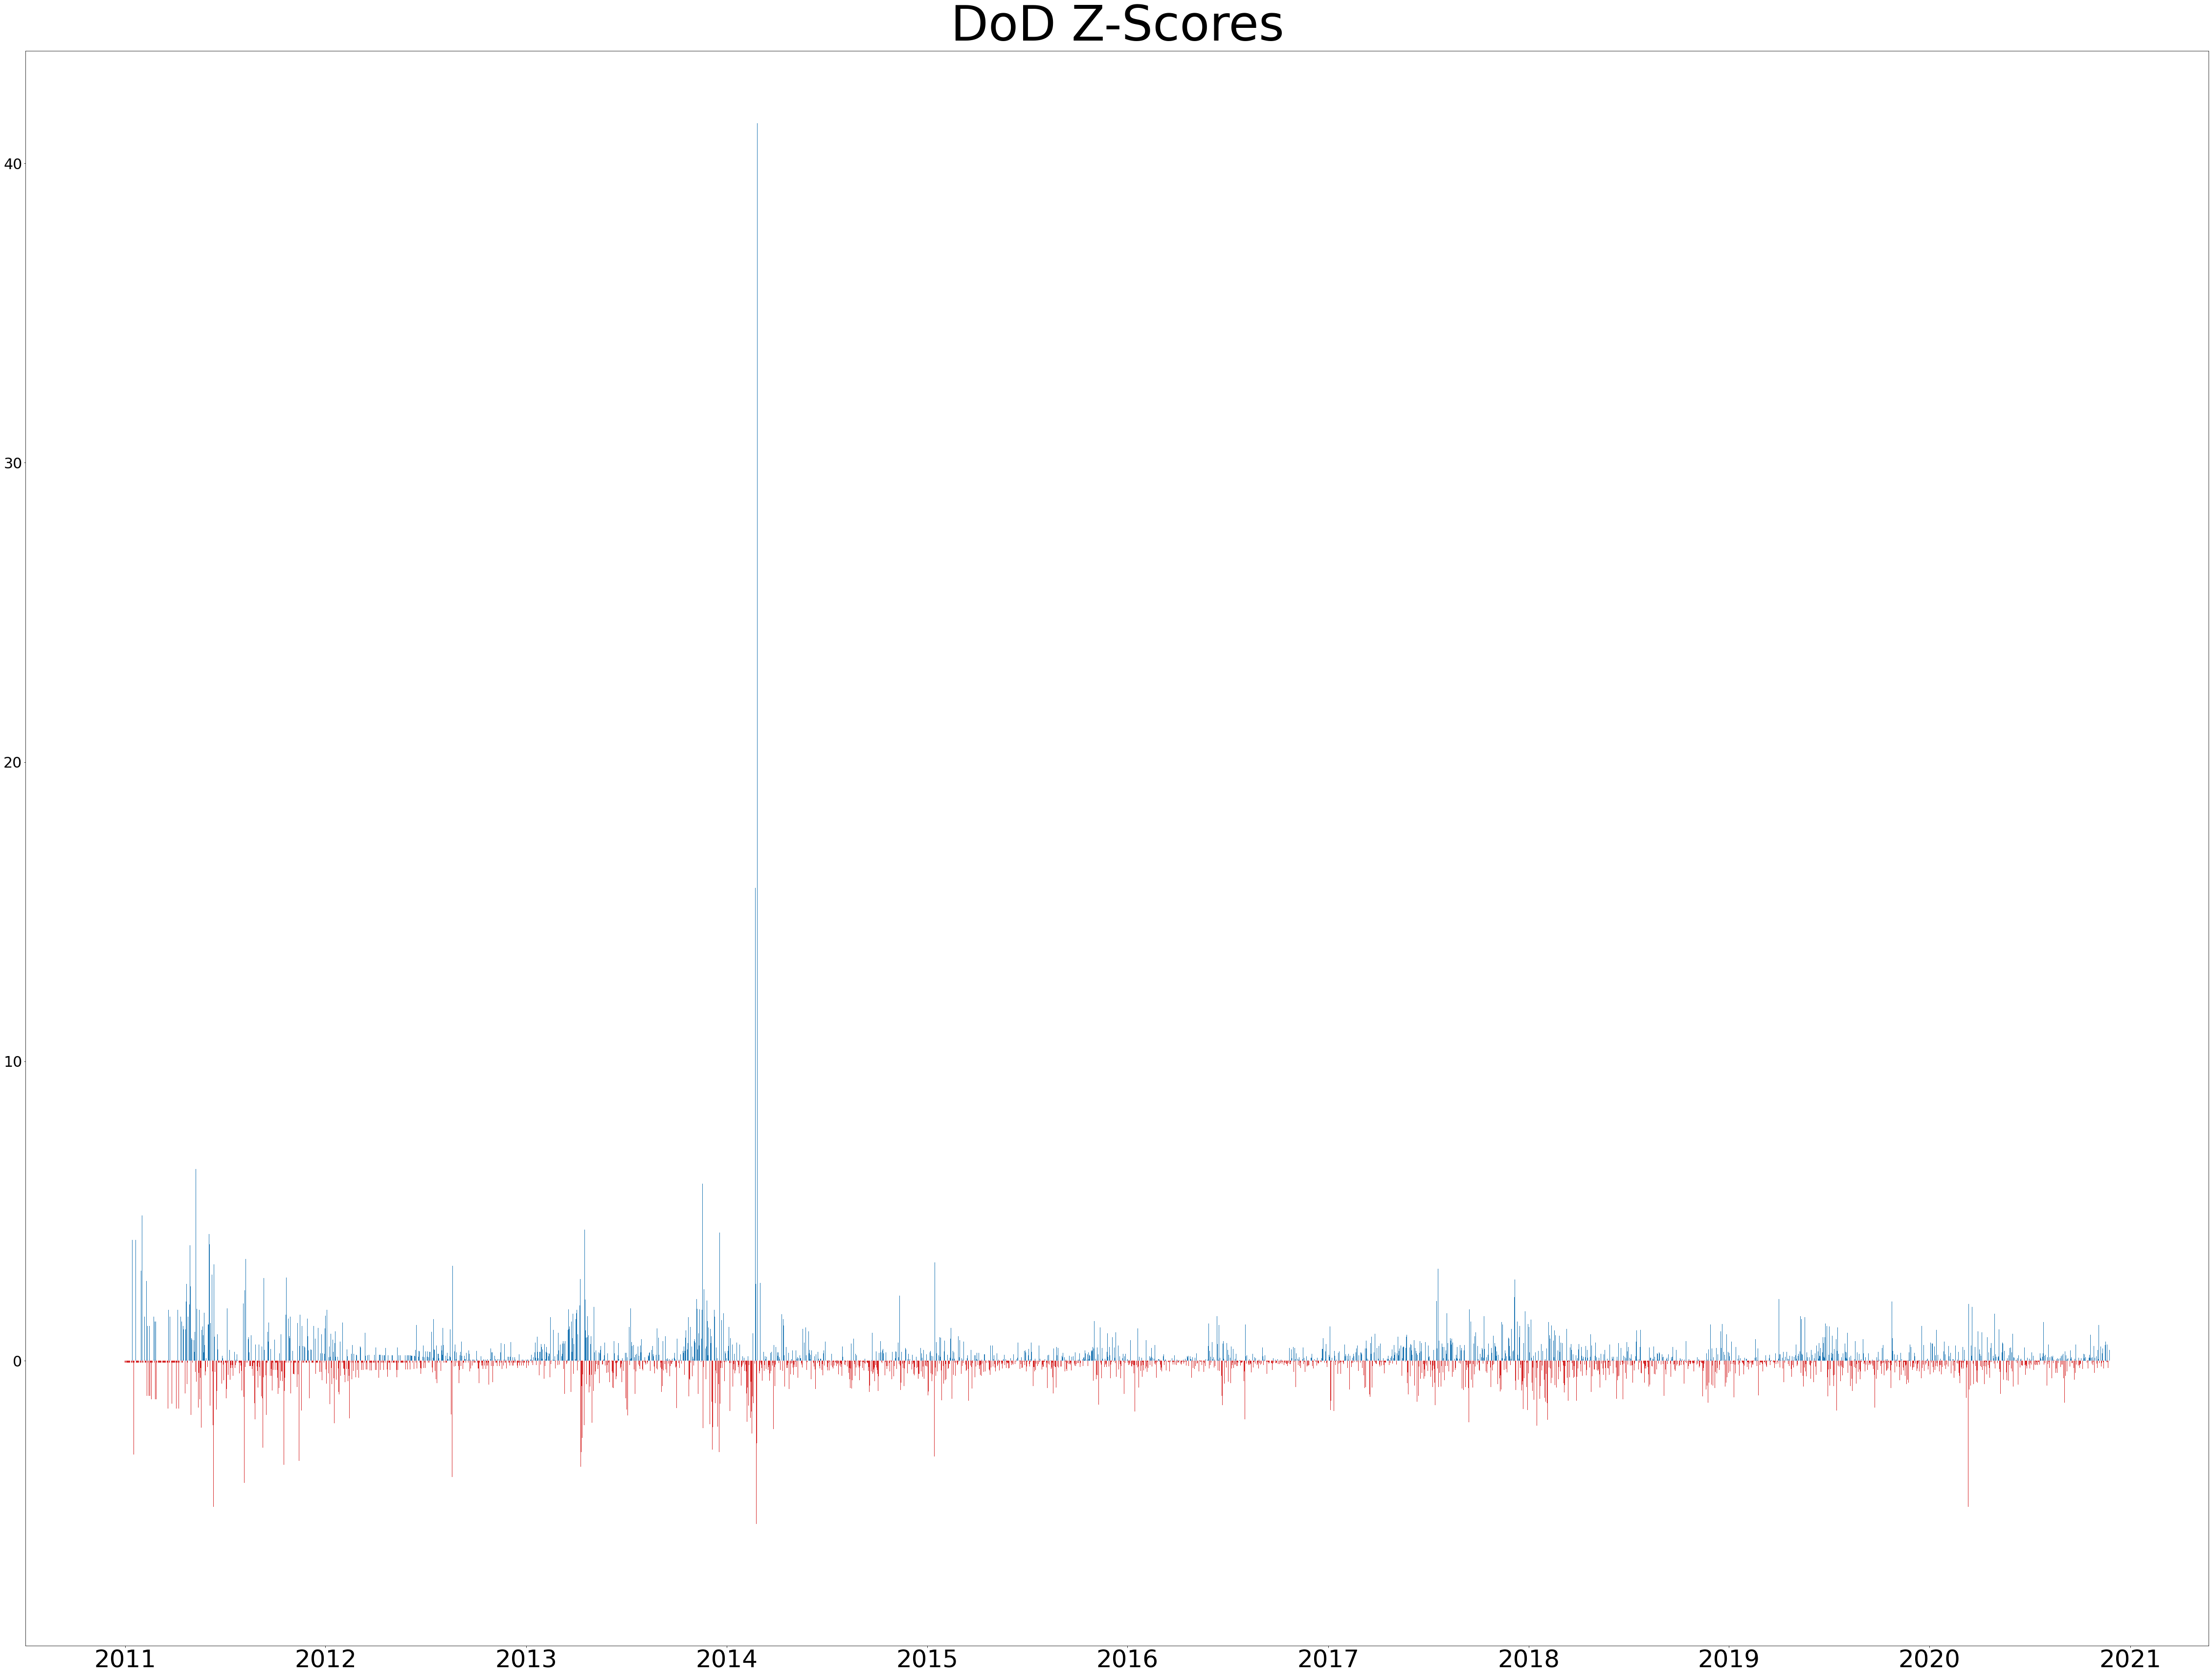

In [73]:
plt.figure(figsize=(80,60))
plt.title('DoD Z-Scores', size = 100)
plt.xticks(size =50)
plt.yticks(size = 30)
plt.bar(btc['Date'], btc['DoD_Z_Score'], color=(btc['DoD_Z_Score']>0).map({True: 'tab:blue', False: 'tab:red'}))

I personally took a big hit on march 12th 2020, so it's interesting to see that it was in fact the third most devastating day ever in bitcoins history, with an eye gouging ~5 sigma day, and only the Mt Gox meltdowns coming ahead of it.  Furthermore, looking at the best days below, interesting the best days ever were a bounce off the lows made by the Mt. Gox meltdown.



In [74]:
btc_worst_days_ever = btc.sort_values(['DoD_Z_Score'])
btc_worst_days_ever[:50]

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,DoD_Z_Score
2469,2014-02-20,111.9,261.5,271.6,109.2,102.18K,-0.572084,2014,2,20,3,False,-7.098158
2465,2014-02-24,174.0,310.2,316.9,131.9,95.12K,-0.439072,2014,2,24,0,False,-5.462824
257,2020-03-12,4826.0,7935.2,7963.1,4546.6,3.22M,-0.391824,2020,3,12,3,False,-4.881933
3454,2011-06-11,14.6,24.0,24.0,13.0,121.87K,-0.391667,2011,6,11,5,False,-4.880001
3398,2011-08-06,6.6,9.8,9.9,5.7,102.41K,-0.326531,2011,8,6,5,False,-4.079181
3019,2012-08-19,8.0,11.6,11.6,7.6,238.86K,-0.310345,2012,8,19,6,False,-3.880183
2785,2013-04-10,165.0,230.0,266.0,105.0,190.18K,-0.282609,2013,4,10,2,False,-3.539179
3326,2011-10-17,2.6,3.6,3.7,2.3,207.43K,-0.277778,2011,10,17,0,False,-3.479785
3298,2011-11-14,2.2,3.0,3.0,2.1,382.19K,-0.266667,2011,11,14,0,False,-3.343179
2141,2015-01-14,164.9,221.3,230.9,157.3,170.68K,-0.254858,2015,1,14,2,False,-3.197992


In [75]:
btc_best_days_ever = btc.sort_values(['DoD_Z_Score'], ascending=False)
btc_best_days_ever[:50]

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,DoD_Z_Score
2463,2014-02-26,593.1,135.8,650.0,522.8,0.60K,3.367452,2014,2,26,2,False,41.336783
2467,2014-02-22,255.6,111.6,290.6,96.7,72.17K,1.290323,2014,2,22,5,False,15.799349
3486,2011-05-10,5.8,3.8,6.0,3.8,56.22K,0.526316,2011,5,10,1,False,6.406207
2563,2013-11-18,785.4,528.3,787.9,522.0,72.07K,0.486655,2013,11,18,0,False,5.918598
3584,2011-02-01,0.7,0.5,0.9,0.5,31.56K,0.400000,2011,2,1,1,False,4.853207
2778,2013-04-17,93.1,68.4,98.8,63.3,327.63K,0.361111,2013,4,17,2,False,4.375085
2532,2013-12-19,732.0,541.0,746.0,522.4,45.76K,0.353050,2013,12,19,3,False,4.275976
3462,2011-06-03,14.3,10.6,14.5,10.6,72.98K,0.349057,2011,6,3,4,False,4.226880
3602,2011-01-14,0.4,0.3,0.4,0.3,27.13K,0.333333,2011,1,14,4,False,4.033569
3596,2011-01-20,0.4,0.3,0.4,0.3,19.88K,0.333333,2011,1,20,3,False,4.033569


In [76]:
# for i in range(2010,2020+1):
#     btcyear[i]['DoD_T_Score'] = (btcyear[i]['DoD_Change']- btcyear[i]['DoD_Change'].mean())/(btcyear[i]['DoD_Change'].std())

# don't have any use for this   

In [77]:
# Looking at best 30 days per year

for i in range(2011,2020+1):
    print(btcyear[i].sort_values(['DoD_Change'], ascending=False)[:30])


           Date  Price  Open  High   Low   Volume  DoD_Change  Year  Month  \
3486 2011-05-10    5.8   3.8   6.0   3.8   56.22K    0.526316  2011      5   
3584 2011-02-01    0.7   0.5   0.9   0.5   31.56K    0.400000  2011      2   
3462 2011-06-03   14.3  10.6  14.5  10.6   72.98K    0.349057  2011      6   
3596 2011-01-20    0.4   0.3   0.4   0.3   19.88K    0.333333  2011      1   
3602 2011-01-14    0.4   0.3   0.4   0.3   27.13K    0.333333  2011      1   
3461 2011-06-04   18.9  14.3  18.9  14.0   44.48K    0.321678  2011      6   
3497 2011-04-29    2.9   2.2   3.0   2.2   57.58K    0.318182  2011      4   
3483 2011-05-13    8.2   6.3   8.4   6.3   64.00K    0.301587  2011      5   
3458 2011-06-07   23.9  18.5  24.3  18.3   53.72K    0.291892  2011      6   
3395 2011-08-09   10.0   7.8  12.1   7.7  114.47K    0.282051  2011      8   
3453 2011-06-12   18.5  14.6  25.0  10.3  151.19K    0.267123  2011      6   
3586 2011-01-30    0.5   0.4   0.5   0.4   10.38K    0.250000  2

One thing i find *incredibly* interesting about the above tables, 2020 has been a very good year performance wise for btc and yet it's put up a smaller amount of really expansive days than even the bear market of 2018.  Just means the market is maturing?  Less large draw down and less aggressive expansions up.  Perhaps the market is on it's way to being more efficient and less lucrative to trade.

Note, I went and looked at the chart for btc2020 from November 24th till present, and there's only been one additional 5%+ day.

Anyways, continuing below with the volality study, but removing 4 sigma (negative or positive) days to see if they have an outsized effect on the data.

In [78]:
btc_outliers_removed = btc.loc[(btc['DoD_Z_Score']<4) & (btc['DoD_Z_Score']>-4)]

Text(0.5, 15.0, 'Weekday')

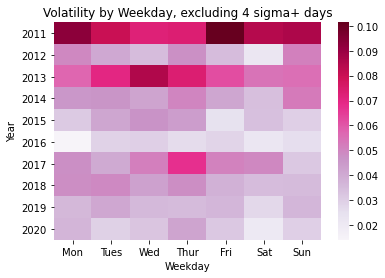

In [79]:
vol_excluding_outliers = pd.pivot_table(btc_outliers_removed, index=['Year'], columns=['Weekday'], values=['DoD_Change'], aggfunc=np.std)
sns.heatmap(vol_excluding_outliers, xticklabels=["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"], cmap='PuRd')
plt.title('Volatility by Weekday, excluding 4 sigma+ days')
plt.xlabel('Weekday')

In [80]:
vol_excluding_outliers

DoD_Change                                                            
Weekday          0         1         2         3         4         5         6
Year                                                                          
2011      0.092994  0.080460  0.072526  0.073550  0.101409  0.084387  0.086299
2012      0.049557  0.040986  0.034939  0.047824  0.034999  0.022166  0.051362
2013      0.057432  0.070327  0.085495  0.073804  0.062092  0.054546  0.055404
2014      0.045994  0.046476  0.042238  0.050294  0.041451  0.034213  0.052723
2015      0.031204  0.041485  0.047037  0.044219  0.024704  0.033925  0.029907
2016      0.014061  0.029179  0.030036  0.026540  0.028538  0.022010  0.025807
2017      0.048081  0.040419  0.051901  0.067298  0.051014  0.049562  0.031953
2018      0.048363  0.049363  0.042957  0.048394  0.038339  0.034955  0.035543
2019      0.036290  0.041076  0.035918  0.035308  0.036696  0.027654  0.036876
2020      0.036995  0.029695  0.032769  0.042103  0.031990  0.020821  0.029781

In [81]:
btc_recent_no_outliers = btc_outliers_removed.loc[btc_outliers_removed['Year']>=2016]

Text(0.5, 15.0, 'Weekday')

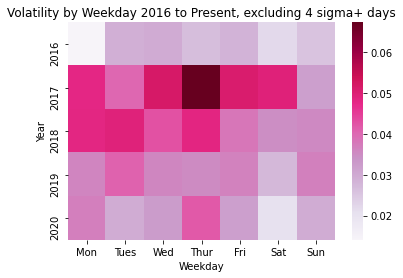

In [82]:
recent_vol_excluding_outliers = pd.pivot_table(btc_recent_no_outliers, index=['Year'], columns=['Weekday'], values=['DoD_Change'], aggfunc=np.std)
sns.heatmap(recent_vol_excluding_outliers, xticklabels=["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"], cmap='PuRd')
plt.title('Volatility by Weekday 2016 to Present, excluding 4 sigma+ days')
plt.xlabel('Weekday')

In [83]:
recent_vol_excluding_outliers

DoD_Change                                                            
Weekday          0         1         2         3         4         5         6
Year                                                                          
2016      0.014061  0.029179  0.030036  0.026540  0.028538  0.022010  0.025807
2017      0.048081  0.040419  0.051901  0.067298  0.051014  0.049562  0.031953
2018      0.048363  0.049363  0.042957  0.048394  0.038339  0.034955  0.035543
2019      0.036290  0.041076  0.035918  0.035308  0.036696  0.027654  0.036876
2020      0.036995  0.029695  0.032769  0.042103  0.031990  0.020821  0.029781

In [84]:
btc_outliers_removed.DoD_Change.describe()

count    3601.000000
mean        0.003701
std         0.049315
min        -0.310345
25%        -0.012658
50%         0.000257
75%         0.019720
max         0.321678
Name: DoD_Change, dtype: float64

In [85]:
btc.DoD_Change.describe()

count    3616.000000
mean        0.005256
std         0.081337
min        -0.572084
25%        -0.012711
50%         0.000306
75%         0.019977
max         3.367452
Name: DoD_Change, dtype: float64

In [86]:
btc_recent_no_outliers.DoD_Change.describe()

count    1789.000000
mean        0.003142
std         0.038525
min        -0.170923
25%        -0.010851
50%         0.002102
75%         0.017794
max         0.255586
Name: DoD_Change, dtype: float64

In [87]:
btc_recent.DoD_Change.describe()

count    1790.000000
mean        0.002921
std         0.039630
min        -0.391824
25%        -0.010920
50%         0.002098
75%         0.017792
max         0.255586
Name: DoD_Change, dtype: float64

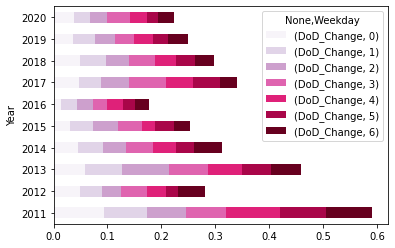

In [88]:
vol_excluding_outliers.plot.barh(stacked=True, cmap='PuRd')

So, once again revisting the volatilty debate:  while ten years of price history is not a *ton*, it would a appear that volatility is decreasing year over year (with the dead market of 2015 and 2016 being a low volatility exception, of course). There's only been a single 4+ sigma day since 2016, while there were 15 such days between 2011 - 2014 (5 negative days, 10 positive 'outliers').  Kind of noteworthy as well, 3 of those 5 negative days were too Mt. Gox hacks (2 in close succession in 2014, 1 hack in June 2011).

In [89]:
mean_change_per_weekday_no_outliers = pd.pivot_table(btc_outliers_removed, index=['Year'], columns=['Weekday'], values=['DoD_Change'], aggfunc=np.mean)
mean_change_per_weekday_no_outliers

DoD_Change                                                            
Weekday          0         1         2         3         4         5         6
Year                                                                          
2011     -0.008247  0.020191  0.010072  0.002934  0.004354  0.022566  0.012529
2012      0.008224  0.002921  0.015714  0.009660  0.000206 -0.005002 -0.005222
2013      0.023666  0.025610  0.004631  0.007453  0.002366 -0.000796  0.012613
2014      0.000269  0.000671 -0.003468 -0.016609 -0.005015 -0.004077  0.000383
2015      0.008876 -0.001074 -0.012720  0.011462  0.008253 -0.003127 -0.001110
2016      0.002025 -0.002314  0.004227  0.004119  0.003199  0.006247  0.000170
2017      0.020341  0.010385  0.005582  0.013725 -0.003501  0.006074  0.007238
2018     -0.006525 -0.003140 -0.007568 -0.004077  0.000383  0.004654 -0.002351
2019      0.006353 -0.003012  0.006265 -0.007939  0.011272  0.004233  0.000151
2020      0.012417  0.007721  0.007666  0.009470  0.003710 -0.001350 -0.004311

Text(0.5, 15.0, 'Weekday')

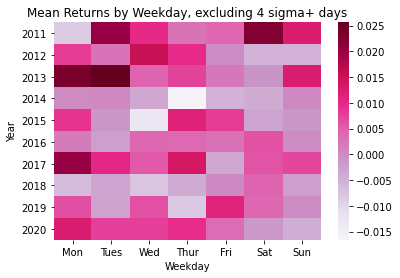

In [90]:
sns.heatmap(mean_change_per_weekday_no_outliers, xticklabels=["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"], cmap='PuRd')
plt.title('Mean Returns by Weekday, excluding 4 sigma+ days')
plt.xlabel('Weekday')

IMO -- the real takeaways here are that during bullish years (2013, 2017, and now 2020), it realy does pay to be long on Monday - Thurs.  Furthermore, the weekends are indeed lower in volatilty.  It didn't use to be the way, but in 2020 certainly has become the case.  If you are a trader, make sure to take Satuday's off and come back by Sunday night.

In [91]:
monthly_vol_outliers_removed = pd.pivot_table(btc_outliers_removed,index=['Year'], columns=['Month'], values=['DoD_Change'], aggfunc=np.std)

Text(0.5, 15.0, 'Month')

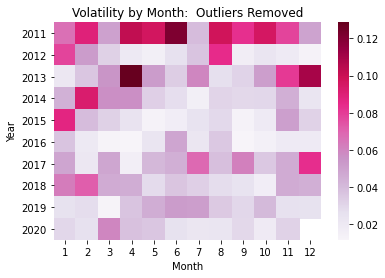

In [92]:
ax = sns.heatmap(monthly_vol_outliers_removed, xticklabels=[1,2,3,4,5,6,7,8,9,10,11,12], cmap='PuRd')
plt.title('Volatility by Month:  Outliers Removed')
plt.xlabel('Month')

Nothing really noteworthy IMO looking at volatility per month with outliers removed, not that there should have been any relationship per se.  

In [93]:
Five_Percent_Up_Days = btc_recent.loc[btc_recent['DoD_Change']>0.05]

In [122]:
Five_Percent_Down_Days = btc_recent.loc[btc_recent['DoD_Change']< -0.05]

In [94]:
Two_Percent_Up_Days = btc_recent.loc[btc_recent['DoD_Change']>0.02]

In [123]:
Two_Percent_Down_Days = btc_recent.loc[btc_recent['DoD_Change'] < -0.02]

In [95]:
Five_Percent_Up_Days['DoD_Change'].describe()

count    142.000000
mean       0.083750
std        0.035182
min        0.050119
25%        0.057621
50%        0.072842
75%        0.101785
max        0.255586
Name: DoD_Change, dtype: float64

In [96]:
Two_Percent_Up_Days['DoD_Change'].describe()

count    414.000000
mean       0.050179
std        0.032585
min        0.020222
25%        0.028123
50%        0.040177
75%        0.057906
max        0.255586
Name: DoD_Change, dtype: float64

Fooking at the above tables, it helps put in perspective how infrequent a 5%+ day actually is for bitcoin.  Certainly felt like they were more common than they are.  Only 142 out of the 1790 days since Jan 1 2016 gained more than 5% in a day (~8% of the time).  Also interesting that a 2%+ day only happens ~23% of the time. Will take note of this as I look at intraday price movements soon.  Feel like I've explored much of what interests me with respect to bitcoin price history, MoM returns, volatility by day and month, with and without outliers.  

Only thing left to dig into is identifying trending markets.  Maybe some combination of rolling average studies (if rolling average is increasing -> trending up, if decreasing -> trending down) and week over week returns. 

Instead, what would be helpful is seeing if there's anything in the intraday price behavior that correlates with that day ending up in the top 70 percentile days.

In [124]:
Two_Percent_Down_Days['DoD_Change'].describe()

count    319.000000
mean      -0.051779
std        0.035044
min       -0.391824
25%       -0.064647
50%       -0.041779
75%       -0.028189
max       -0.020019
Name: DoD_Change, dtype: float64

In [125]:
Five_Percent_Down_Days['DoD_Change'].describe()

count    128.000000
mean      -0.081597
std        0.038396
min       -0.391824
25%       -0.093767
50%       -0.068375
75%       -0.059973
max       -0.050099
Name: DoD_Change, dtype: float64

In [97]:
btc['WoW_Change'] = btc.loc[btc['Weekday']==0].Price.diff(periods=-1)
btc['WoW_Pct_Change'] = btc.loc[btc['Weekday']==0].Price.pct_change(periods=-1)
btc_weeks = btc.loc[(btc['Weekday']==0)]


In [98]:
btc_recent.sort_index(ascending=False, inplace=True)
btc_recent['Rolling_50_day'] = btc_recent.Price.rolling(50).mean()
btc_recent['Rolling_100_day'] = btc_recent.Price.rolling(100).mean()
btc_recent['Rolling_200_day'] = btc_recent.Price.rolling(200).mean()
btc_recent.tail(150)

<ipython-input-98-6269b488ce2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_recent.sort_index(ascending=False, inplace=True)
<ipython-input-98-6269b488ce2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_recent['Rolling_50_day'] = btc_recent.Price.rolling(50).mean()
<ipython-input-98-6269b488ce2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,Rolling_50_day,Rolling_100_day,Rolling_200_day
149,2020-06-28,9124.0,9008.4,9185.5,8950.2,329.01K,0.012832,2020,6,28,6,False,9399.074,8392.525,8326.1500
148,2020-06-29,9185.4,9122.8,9229.1,9033.6,401.12K,0.006862,2020,6,29,0,False,9408.006,8422.517,8336.0370
147,2020-06-30,9135.4,9186.0,9199.8,9075.3,381.73K,-0.005508,2020,6,30,1,True,9419.118,8455.650,8345.4380
146,2020-07-01,9229.9,9135.9,9289.0,9101.1,366.78K,0.010289,2020,7,1,2,False,9427.440,8483.260,8356.1835
145,2020-07-02,9085.1,9229.9,9259.7,8962.1,483.10K,-0.015688,2020,7,2,3,False,9423.168,8506.665,8365.9665
144,2020-07-03,9067.1,9085.0,9120.4,9050.9,333.88K,-0.001970,2020,7,3,4,False,9408.942,8530.547,8376.7845
143,2020-07-04,9134.4,9067.1,9182.3,9049.6,261.25K,0.007422,2020,7,4,5,False,9405.270,8554.640,8389.3900
142,2020-07-05,9081.0,9134.3,9149.6,8932.1,314.10K,-0.005835,2020,7,5,6,False,9399.300,8581.716,8398.4150
141,2020-07-06,9339.0,9080.4,9363.0,9063.2,510.27K,0.028479,2020,7,6,0,False,9392.526,8612.769,8409.2825
140,2020-07-07,9256.0,9338.8,9371.2,9209.3,420.55K,-0.008866,2020,7,7,1,False,9383.032,8646.425,8419.5805


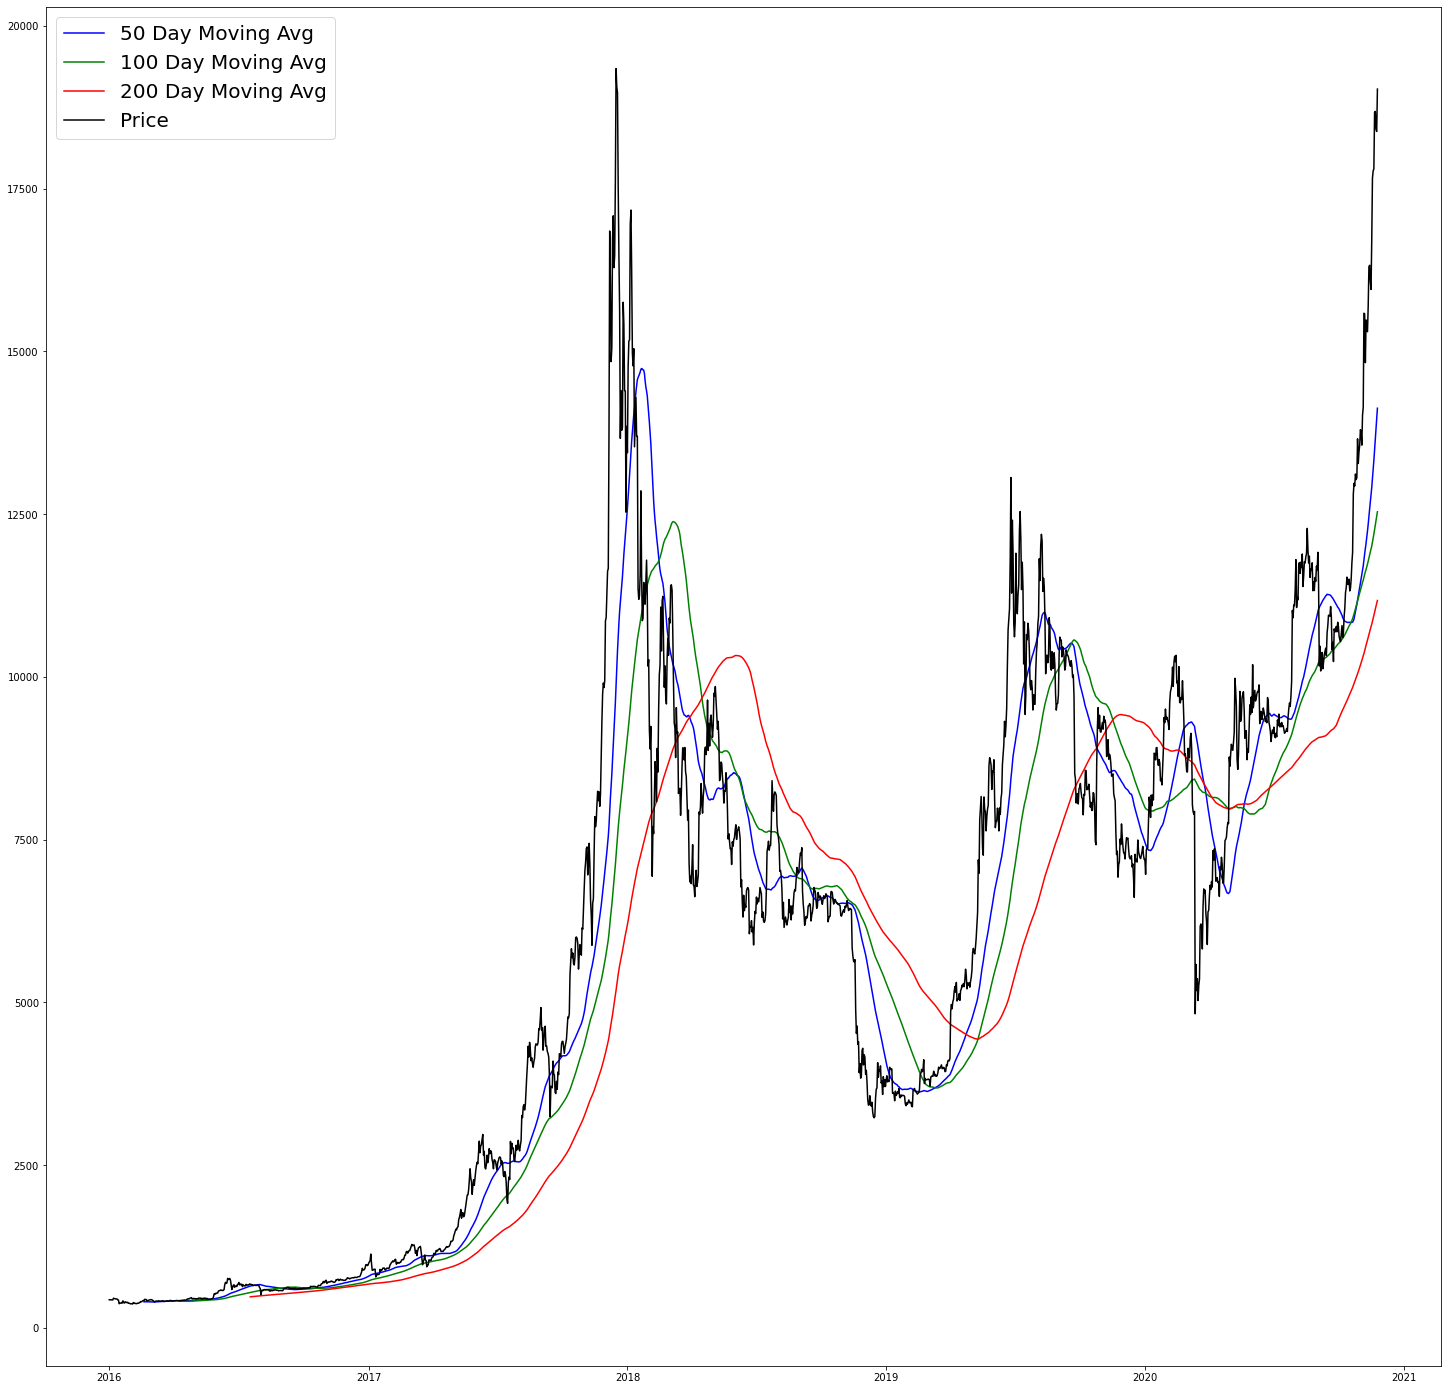

In [99]:
fig, ax = plt.subplots(figsize=(25,25))
Rolling_50 = btc_recent['Rolling_50_day']
Rolling_100 = btc_recent['Rolling_100_day']
Rolling_200 = btc_recent['Rolling_200_day']
ax.plot(btc_recent['Date'], Rolling_50, color='blue')
ax.plot(btc_recent['Date'], Rolling_100, color='green')
ax.plot(btc_recent['Date'], Rolling_200, color='red')
ax.plot(btc_recent['Date'],btc_recent['Price'], color='black')
ax.legend(['50 Day Moving Avg', '100 Day Moving Avg', '200 Day Moving Avg', 'Price'], loc=2, prop={'size': 20})
plt.show()


Using moving averages to identify trend is a pretty common and effective trading strategy.  The most common of these in the stock market is known as the Dow Theory and uses cross overs of the 50 and 200 day moving average to go long or short on a stock.  Looking at the moving averages above, the 200 day lags pretty hard, given how volatile btc's price is compared to stocks, perhaps might be a bit too conservative to use with respect to entry or exits on btc.  But that with standing, the slope of the 200 day moving average does make for a decent trend signal.  Eyeballing it, and for use in later analysis, I think ill probably use the 100 day moving average *derivative* as my trend signal of choice.  It seems to give the least amount of false positives, compared to the 50, and catches more of the moves than the 200. 

Need to calculate 100 day moving average daily rate of change and make a boolean column that is 1 for positive and 0 for negative.  These will be my bull and bear market identifiers.

In [100]:
# plt.figure(figsize=(80,60))
# plt.title('WoW Change', size = 100)
# plt.xticks(size =50)
# plt.yticks(size = 50)
# plt.bar(btc_weeks['Date'], btc_weeks['WoW_Pct_Change'], width=2, color=(btc_weeks['WoW_Pct_Change']>0).map({True: 'tab:blue', False: 'tab:red'}))

<BarContainer object of 308 artists>

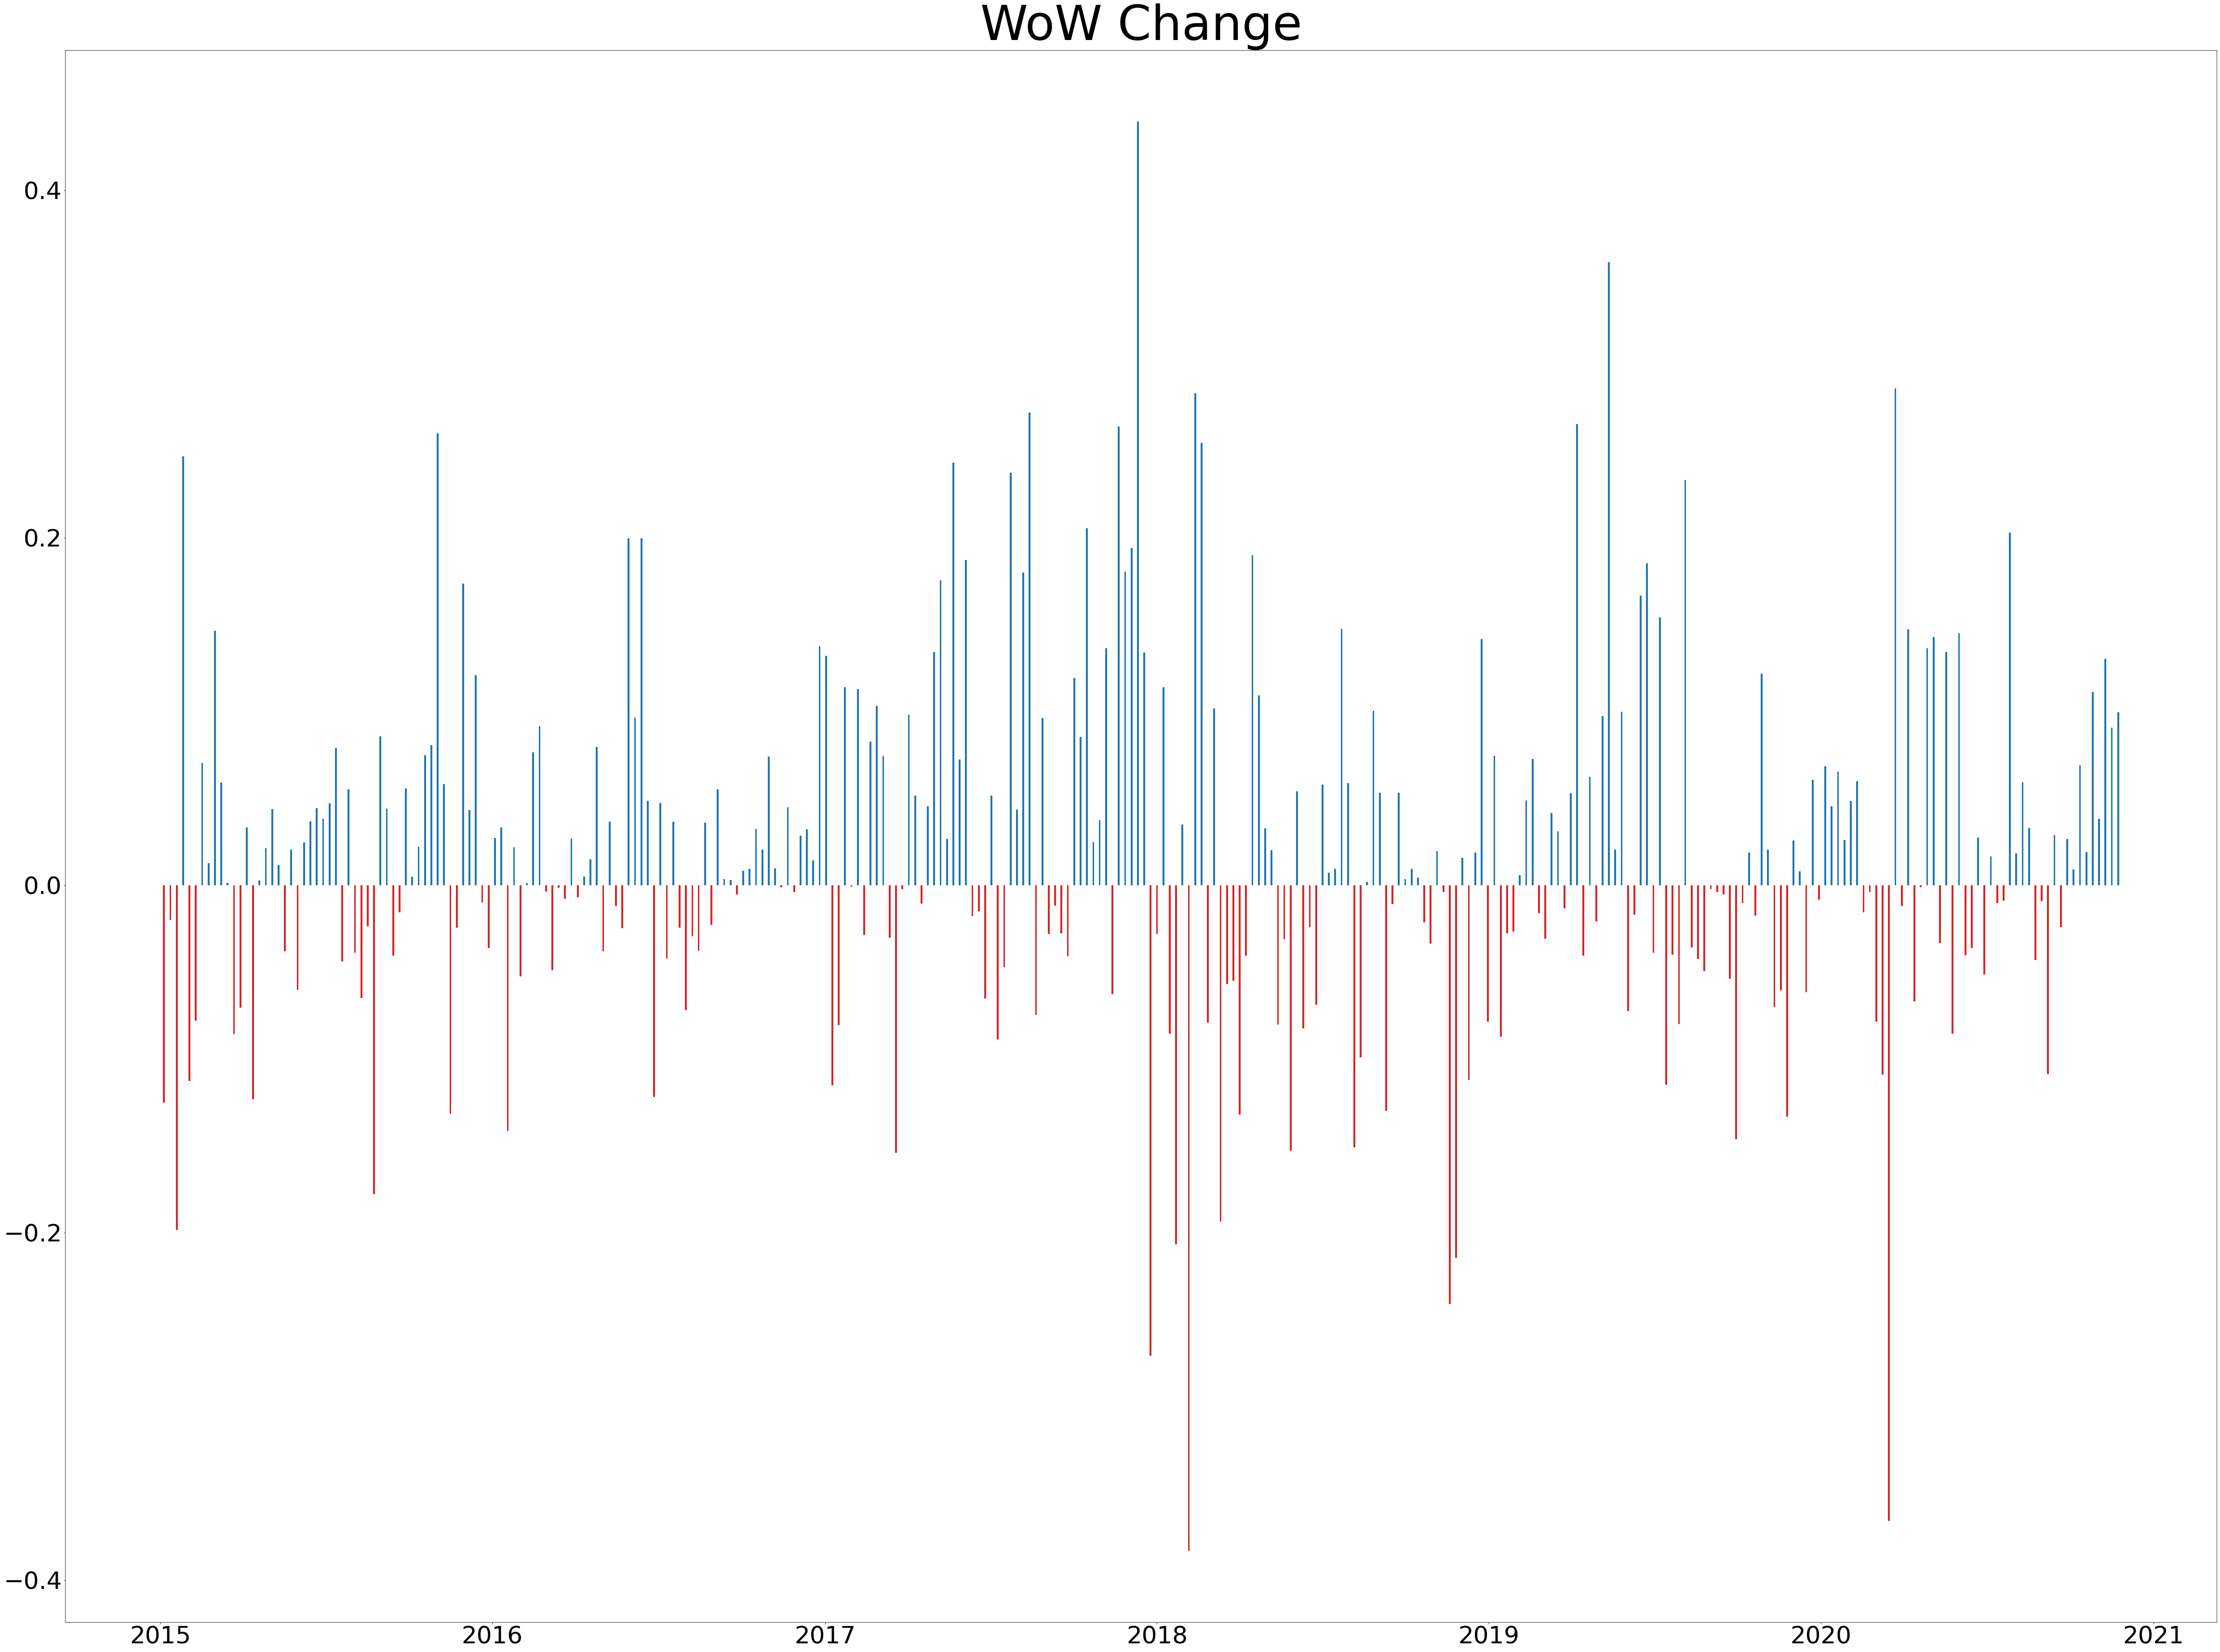

In [101]:
#quickly want to sketch out WoW Change before looking at the 100 day moving average derivative.

btc_weeks_since_2015 = btc_weeks.loc[(btc_weeks['Year']>=2015)]

plt.figure(figsize=(80,60))
plt.title('WoW Change', size = 100)
plt.xticks(size =50)
plt.yticks(size = 50)
plt.bar(btc_weeks_since_2015['Date'], btc_weeks_since_2015['WoW_Pct_Change'], width=2, color=(btc_weeks_since_2015['WoW_Pct_Change']>0).map({True: 'tab:blue', False: 'tab:red'}))

One thing about looking at week over week returns and using your eyes to identify trending points in time -- btc really doesn't manage to stay boring for that long.  Also, big moves to one direction generally seem to strongly mean revert back in the opposite direction, which makes sense, given the boom and bust nature of speculative markets.

In [102]:
btc_weeks_since_2015 = btc_weeks_since_2015.copy()
btc_weeks_since_2015.sort_index(ascending=False, inplace=True)
btc_weeks_since_2015['Rolling_7_Week']= btc_weeks_since_2015.WoW_Change.rolling(7).mean()

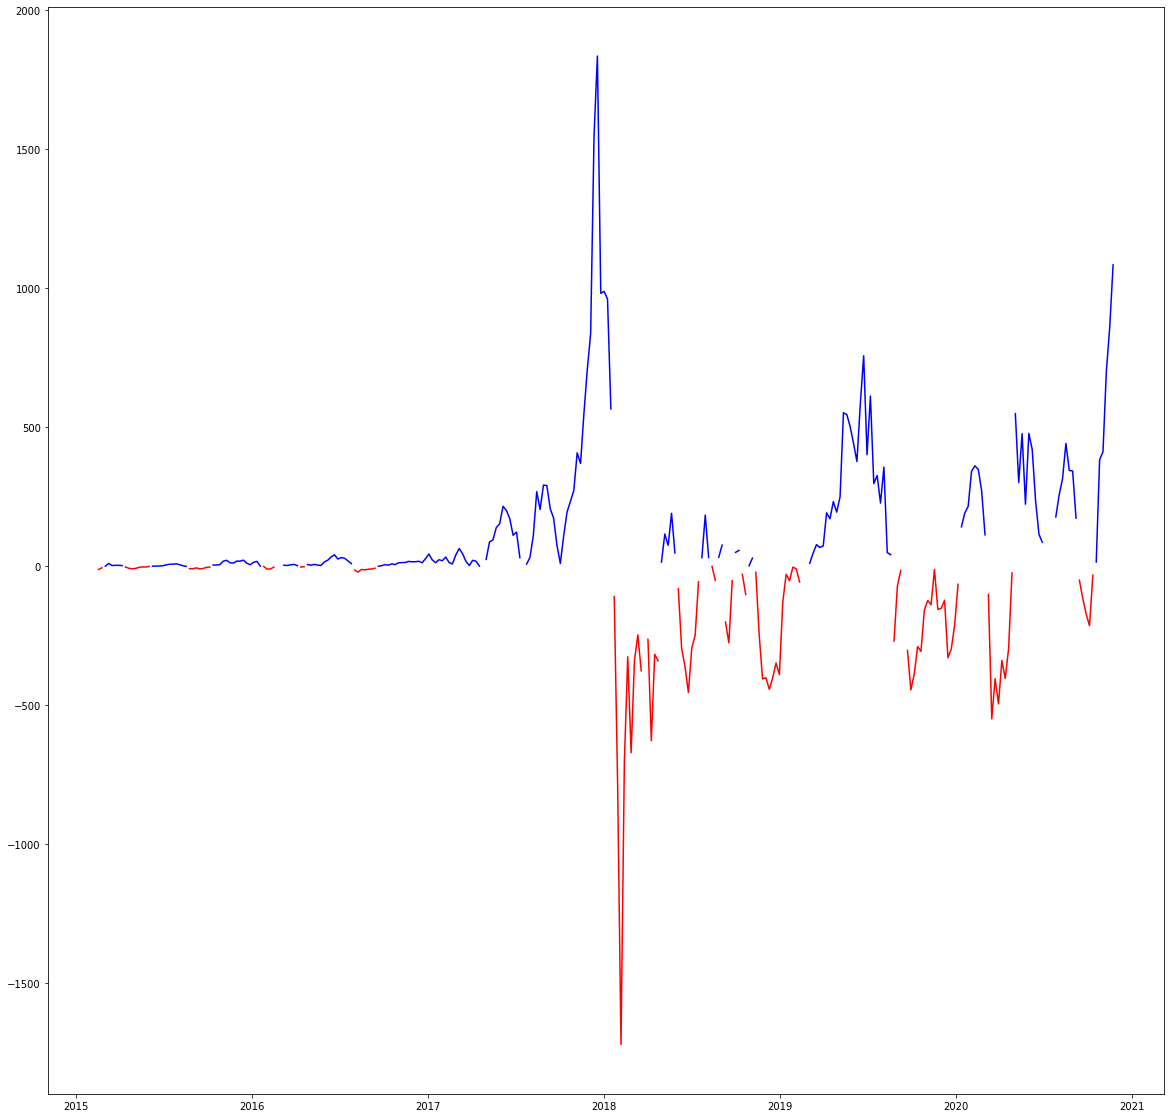

In [103]:
positive_rolling = np.ma.masked_where(btc_weeks_since_2015.Rolling_7_Week < 0, btc_weeks_since_2015.Rolling_7_Week)
negative_rolling = np.ma.masked_where(btc_weeks_since_2015.Rolling_7_Week >= 0, btc_weeks_since_2015.Rolling_7_Week)

fig, ax = plt.subplots(figsize=(20,20))
ax.plot(btc_weeks_since_2015['Date'], positive_rolling, color='blue')
ax.plot(btc_weeks_since_2015['Date'], negative_rolling, color='red')
plt.show()

#something in the sort index // conversion to a chart is inverted.  i know when the positive weeks were versus negative, but they were plotting upsidedown so to speak.  
#the only way to get it visually correct was to invert the mask and set positive rolling to less than 0 and vice versa for negative rolling


This chart here is probably the best visual representation i've put together for trend thus far.  The rate of change in the 7 week rolling average in combination with the inflection points gives a great visual summary for trending markets versus flat and or choppy markets.  Something does appear to be broken in the chart in the second half of 2019, as I have a red line looking like it's going backwards.  However, it was just a really big price bounce during what was otherwise a downtrend.

Just making note of it but I have not done any correlation studies or any sort of predicitive modeling.  Will get to that as well.

In [104]:
btc_recent = btc_recent.copy()
btc_recent['Rolling_100_Pct_Change'] = btc_recent.Rolling_100_day.pct_change(periods=1)
btc_recent.tail(20)

,Date,Price,Open,High,Low,Volume,DoD_Change,Year,Month,Day,Weekday,Month_End,Rolling_50_day,Rolling_100_day,Rolling_200_day,Rolling_100_Pct_Change
19,2020-11-05,15587.1,14145.6,15739.9,14099.7,227.49K,0.101904,2020,11,5,3,False,11798.364,11532.384,10361.4345,0.004073
18,2020-11-06,15577.9,15593.9,15955.2,15223.5,186.13K,-0.001026,2020,11,6,4,False,11891.096,11577.104,10405.1565,0.003878
17,2020-11-07,14828.4,15578.2,15754.4,14385.1,160.73K,-0.048131,2020,11,7,5,False,11969.004,11614.426,10445.0860,0.003224
16,2020-11-08,15483.7,14826.6,15648.3,14720.7,94.99K,0.044319,2020,11,8,6,False,12057.042,11655.929,10486.9400,0.003573
15,2020-11-09,15327.2,15483.3,15819.6,14816.9,165.04K,-0.010082,2020,11,9,0,False,12145.156,11691.170,10526.1335,0.003023
14,2020-11-10,15303.6,15328.0,15465.3,15096.5,93.36K,-0.001592,2020,11,10,1,False,12242.892,11733.538,10565.1325,0.003624
13,2020-11-11,15695.8,15303.1,15953.9,15281.0,119.07K,0.025661,2020,11,11,2,False,12346.178,11778.252,10605.9095,0.003811
12,2020-11-12,16294.7,15695.8,16342.7,15483.5,165.54K,0.038157,2020,11,12,3,False,12467.326,11829.352,10648.9885,0.004339
11,2020-11-13,16324.2,16293.0,16474.1,15973.4,113.75K,0.001915,2020,11,13,4,False,12579.022,11875.243,10691.7795,0.003879
10,2020-11-14,16071.0,16323.1,16328.2,15717.7,83.64K,-0.015444,2020,11,14,5,False,12686.666,11918.382,10733.4000,0.003633


In [105]:
btc_recent.drop(['Volume', 'Month_End', 'Month', 'Day'], axis =1, inplace=True)


In [106]:
btc_recent.tail()

,Date,Price,Open,High,Low,DoD_Change,Year,Weekday,Rolling_50_day,Rolling_100_day,Rolling_200_day,Rolling_100_Pct_Change
4,2020-11-20,18675.2,17805.5,18811.0,17758.4,0.048844,2020,4,13489.658,12265.483,10991.5820,0.005837
3,2020-11-21,18687.2,18673.8,18966.0,18397.5,0.000718,2020,5,13651.956,12334.646,11040.0130,0.005639
2,2020-11-22,18412.9,18689.3,18751.5,17644.6,-0.014789,2020,6,13809.330,12401.267,11086.3205,0.005401
1,2020-11-23,18379.6,18428.1,18756.8,18016.0,-0.002632,2020,0,13963.464,12466.610,11128.3195,0.005269
0,2020-11-24,19030.4,18394.6,19416.6,18074.8,0.034564,2020,1,14128.282,12537.924,11174.4405,0.005720


In [107]:
btc_recent['Bull'] = np.where(btc_recent['Rolling_100_Pct_Change'] > 0, 1, 0)

In [114]:
btc_recent.groupby('Year')['Bull'].sum()

Year
2016    221
2017    365
2018    101
2019    195
2020    252
Name: Bull, dtype: int64

In [116]:
btc_recent.groupby('Year')['Bull'].mean()

Year
2016    0.603825
2017    1.000000
2018    0.276712
2019    0.534247
2020    0.765957
Name: Bull, dtype: float64

<BarContainer object of 1790 artists>

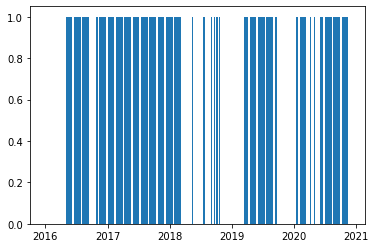

In [118]:
plt.bar(btc_recent['Date'], btc_recent['Bull'])

While not elegant by any means, the bar chart there is a nice visual representation for the density of the 'bull' market as I have identified.  Also, freaking nuts how bullish 2017 was, not a day with a negative slope on the 100 day average.

this notebook is getting pretty long, going to export btc_recent to csv and merge it in another jupyter notebook that has hourly btc price on coinbase already loaded

In [120]:
btc_recent.to_csv('btc_recent.csv')

In [127]:
btc_10_Pct = btc_recent.loc[btc_recent['DoD_Change']>.1]
btc_10_Pct.describe()

,Price,Open,High,Low,DoD_Change,Year,Weekday,Rolling_50_day,Rolling_100_day,Rolling_200_day,Rolling_100_Pct_Change,Bull
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,35.000000,38.000000,38.000000
mean,7832.944737,6939.650000,7990.350000,6832.136842,0.129530,2017.947368,2.552632,6983.755789,6264.593079,5723.036857,0.005358,0.789474
std,4864.243473,4301.771381,4963.678267,4279.714791,0.034777,1.272312,1.884465,3916.202096,3464.239961,2684.728752,0.006409,0.413155
min,524.200000,474.000000,531.800000,467.000000,0.100174,2016.000000,0.000000,447.488000,433.211000,495.249500,-0.006778,0.000000
25%,4141.575000,3733.800000,4203.175000,3733.350000,0.105934,2017.000000,1.000000,4048.701500,3691.191750,4043.484500,0.001319,1.000000
50%,7279.600000,6605.300000,7380.750000,6424.350000,0.114111,2018.000000,2.500000,7202.816000,6238.808500,5855.317500,0.004658,1.000000
75%,10636.175000,9585.175000,10900.250000,9556.350000,0.139052,2019.000000,4.000000,9060.468000,8844.739000,8144.783500,0.008451,1.000000
max,16954.800000,15180.100000,17399.200000,15024.600000,0.255586,2020.000000,6.000000,14724.870000,11779.076000,10361.434500,0.020223,1.000000
